In [8]:
import numpy as np
import pandas as pd
import csv
import numpy
import sys
from numpy import genfromtxt
import matplotlib.pyplot as plt
from matplotlib import pylab
from pylab import *
import numpy as np
from scipy.signal import butter,filtfilt
from scipy.fftpack import fft
from scipy.signal import find_peaks
from scipy import fftpack

import datetime as dt


### HELPERS

In [9]:
def movingaves(window, signal, N = 50):
    cumsum, moving_aves = [0], []
    for i, x in enumerate(signal, 1):
        cumsum.append(cumsum[i-1] + x)
        if i>=N:
            moving_ave = (cumsum[i] - cumsum[i-window])/window
            #can do stuff with moving_ave here
            moving_aves.append(moving_ave)
    DC = np.array(moving_aves)
    AC = np.array(signal[:len(DC)-1]) - DC[:len(DC)-1]
    return DC, AC

def butter_lowpass_filter(data, cutoff, fs, order):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    # Get the filter coefficients 
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

def butter_highpass_filter(data, cutoff, fs, order):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    # Get the filter coefficients 
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    y = filtfilt(b, a, data)
    return y

def butter_bandpass(lowcut, highcut, fs, order=2):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

def butter_bandpass_filter(data, lowcut, highcut, fs, order=2):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

def PPGtime(str):
    minute = int(str[3:5])
    second = float(str[6:])
    return 60*minute + second

### READ RAW DATA

In [10]:
def ReadData(file, format = 1):
    DATA = []
    
    with open("./000_Data/"+file, newline='') as csvfile:
        spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
        for row in spamreader:
            DATA.append(row)
            
    ATIME = []
    Ximu  = []
    Yimu  = []
    Zimu  = []
    IRled = []
    RRled = []
    GRled = []
    Temp  = []
    ECG   = []
    
    out1 = []
    out2 = []
    out3 = []
    out4 = []
    
    Mic = []
    
    if format == "04_14" or format == "03_03": 
        for i in range (0, len(DATA)):
            ATIME.append(float(DATA[i][0])/1000)
            Ximu.append( float(DATA[i][1]))
            Yimu.append( float(DATA[i][2]))
            Zimu.append( float(DATA[i][3]))
            IRled.append(float(DATA[i][4]))
            RRled.append(float(DATA[i][5]))
            Temp.append( float(DATA[i][6]))
            ECG.append(  float(DATA[i][7]))
        return ATIME, ECG, RRled, IRled
    
    if format == "06_16":
        for i in range (0, len(DATA)):
            ATIME.append(float(DATA[i][1])/1000)
            ECG.append(  float(DATA[i][2]))
            RRled.append(float(DATA[i][3]))
            IRled.append(float(DATA[i][4]))
            Temp.append( float(DATA[i][5]))
            
        return ATIME, ECG, RRled, IRled, Temp
   

    if format == "08_04":
        for i in range (0, len(DATA)):
            ATIME.append(float(DATA[i][1])/1000)
            ECG.append(  float(DATA[i][2]))
            RRled.append(float(DATA[i][3]))
            IRled.append(float(DATA[i][4]))
            Ximu.append( float(DATA[i][5]))
            Yimu.append( float(DATA[i][6]))
            Zimu.append( float(DATA[i][7]))
            Temp.append( float(DATA[i][8]))
        return ATIME, ECG, RRled, IRled, Ximu, Yimu, Zimu
    
    if format == "08_04_HW":
        for i in range (1, len(DATA)):
            ATIME.append(float(DATA[i][0]))
            out1.append(float(DATA[i][1]))
            out2.append(float(DATA[i][2]))
            out3.append(float(DATA[i][3]))
            out4.append(float(DATA[i][4]))
        return ATIME, out1, out2, out3, out4
    
    if format == "08_25":
        for i in range (0, len(DATA)):
            ATIME.append(float(DATA[i][1])/1000)
            ECG.append(  float(DATA[i][2]))
            RRled.append(float(DATA[i][3]))
            IRled.append(float(DATA[i][4]))
            Ximu.append( float(DATA[i][5]))
            Yimu.append( float(DATA[i][6]))
            Zimu.append( float(DATA[i][7]))
            Temp.append( float(DATA[i][8]))
        return ATIME, ECG, RRled, IRled, Ximu, Yimu, Zimu
    
    if format == "08_25_DW_ECG":
        for i in range (1, len(DATA)):
            ATIME.append(float(DATA[i][0]))
            out1.append(float(DATA[i][1]))
            out2.append(float(DATA[i][2]))
            out3.append(float(DATA[i][3]))
            out4.append(float(DATA[i][4]))
        return ATIME, out1, out2, out3, out4
    
    if format == "PPGx3":
        start = PPGtime(DATA[0][0])
        for i in range(0, len(DATA)):
            temp = PPGtime(DATA[i][0]) - start
            ATIME.append(temp)
            RRled.append(float(DATA[i][1]))
            IRled.append(float(DATA[i][2]))
            GRled.append(float(DATA[i][3]))
        return ATIME, RRled, IRled, GRled

    if format == "PPGx3_HW":
        start = float(DATA[5][0])
        for i in range(5, len(DATA)):
            temp = float(DATA[i][0]) - start
            ATIME.append(temp)
            RRled.append(float(DATA[i][1]))
            IRled.append(float(DATA[i][2]))
            GRled.append(float(DATA[i][3]))
        return ATIME, RRled, IRled, GRled

    if format == "IMU_HW":
        for i in range(5, len(DATA)):
            ATIME.append(float(DATA[i][0]))
            Ximu.append(float(DATA[i][1]))
            Yimu.append(float(DATA[i][2]))
            Zimu.append(float(DATA[i][3]))
        return ATIME, Ximu, Yimu, Zimu
    
    if format == "ECG_HW":
        for i in range(1, len(DATA)):
            ATIME.append(float(DATA[i][0]))
            ECG.append(float(DATA[i][1]))
        return ATIME, ECG
    
    if format == "08_25_Mic":
        for i in range(1, len(DATA)):
            ATIME.append(float(DATA[i][0])-float(DATA[1][0]))
            Mic.append(float(DATA[i][2]))
        return ATIME, Mic

### PPG/ECG PROCESSING

In [11]:
def PPG_Filter(ATIME, LED, Vitals, N = 50, HR_freq = 1.4, RR_freq = 0.6, highpass = 0, HR_prom = (10, None), RR_prom = (10, None)):
    t_data = ATIME.copy()
    difflist = diff(t_data)
    sampling_time = mean(difflist)
    jo = 60*(1/(sampling_time))
    
    # Filter requirements.
    T = sampling_time         # Sample Period
    fs = 1/T                  # sample rate, Hz
    cutoffred = 1             # desired cutoff frequency of the filter, Hz ,      slightly higher than actual 1.2 Hz
    cutoffir =  1             # desired cutoff frequency of the filter, Hz ,      slightly higher than actual 1.2 Hz
    nyq = 0.5 * fs            # Nyquist Frequency
    order = 2                 # sin wave can be approx represented as quadratic
    n = int(T * fs)           # total number of samples
    
    
    # Apply filter
    if Vitals == "HR":
        Freq, Prom = HR_freq, HR_prom
    if Vitals == "RR":
        Freq, Prom = RR_freq, RR_prom
    
    DC, AC = movingaves(N, LED)
    filtered = butter_lowpass_filter(AC, Freq, fs, order)
    
    if highpass != 0:
        filtered = butter_highpass_filter(filtered, highpass, fs, order)
    
    peaks, properties = find_peaks(filtered, prominence = Prom)
    
    return sampling_time, AC, filtered, peaks

def PPG_Plot_Signal(AC, ATIME, filtered, peaks, TFent, TNalo, yL = -10000000, yH = 10000000, plot = True, offset = 30, custom = False, custX = 0, custY = 0):
    FONT = 10
    
    x = np.arange(len(AC))
    xf = np.arange(len(filtered))
    
    if plot == True:
        
        fig = plt.figure(figsize = (12, 8))

        ax = fig.add_subplot(411)
        ax.plot(x*sampling_time+ATIME[0], AC, c="lightblue", label="Raw sensor data")
        ax.plot(xf*sampling_time+ATIME[0], filtered, c="black", label="Low-pass filtered data")
        ax.plot(peaks*sampling_time+ATIME[0], filtered[peaks], "x", markersize = 15, markeredgewidth=2, c="red", label="Detected peaks")
        plt.xticks(fontsize= FONT)
        plt.yticks(fontsize= FONT)
        plt.xlabel('Time (seconds)', fontsize = FONT)
        plt.ylabel('Signal', fontsize = FONT)
        plt.title("Fentanyl Injection",weight="bold", fontsize = FONT+3)
        if custom == True:
            ax.set_xlim(custX, custY)
        else:
            ax.set_xlim(TFent - offset, TFent + offset)
        ax.set_ylim(yL, yH)
        plt.grid()

        ax = fig.add_subplot(412)
        ax.plot(x*sampling_time+ATIME[0], AC, c="lightblue", label="Raw sensor data")
        ax.plot(xf*sampling_time+ATIME[0], filtered, c="black", label="Low-pass filtered data")
        ax.plot(peaks*sampling_time+ATIME[0], filtered[peaks], "x", markersize = 15, markeredgewidth=2, c="red", label="Detected peaks")
        plt.xticks(fontsize= FONT)
        plt.yticks(fontsize= FONT)
        plt.xlabel('Time (seconds)', fontsize = FONT)
        plt.ylabel('Signal', fontsize = FONT)
        plt.title("After Fentanyl Injection",weight="bold", fontsize = FONT+3)
        ax.set_xlim(TFent + offset, TFent + 2*offset)
        ax.set_ylim(yL, yH)
        plt.grid()

        ax = fig.add_subplot(413)
        ax.plot(x*sampling_time+ATIME[0], AC, c="lightblue", label="Raw sensor data")
        ax.plot(xf*sampling_time+ATIME[0], filtered, c="black", label="Low-pass filtered data")
        ax.plot(peaks*sampling_time+ATIME[0], filtered[peaks], "x", markersize = 15, markeredgewidth=2, c="red", label="Detected peaks")
        plt.xticks(fontsize= FONT)
        plt.yticks(fontsize= FONT)
        plt.xlabel('Time (seconds)', fontsize = FONT)
        plt.ylabel('Signal', fontsize = FONT)
        plt.title("Naloxone Delivery",weight="bold", fontsize = FONT+3)
        ax.set_xlim(TNalo - offset, TNalo + offset)
        ax.set_ylim(yL, yH)
        plt.grid()

        ax = fig.add_subplot(414)
        ax.plot(x*sampling_time+ATIME[0], AC, c="lightblue", label="Raw sensor data")
        ax.plot(xf*sampling_time+ATIME[0], filtered, c="black", label="Low-pass filtered data")
        ax.plot(peaks*sampling_time+ATIME[0], filtered[peaks], "x", markersize = 15, markeredgewidth=2, c="red", label="Detected peaks")
        plt.xticks(fontsize= FONT)
        plt.yticks(fontsize= FONT)
        plt.xlabel('Time (seconds)', fontsize = FONT)
        plt.ylabel('Signal', fontsize = FONT)
        plt.title("After Naloxone Delivery",weight="bold", fontsize = FONT+3)
        ax.set_xlim(TNalo + offset, TNalo + 2*offset)
        ax.set_ylim(yL, yH)
        plt.grid()

        plt.tight_layout()
    
    
    rawX = x*sampling_time+ATIME[0]
    rawY = AC
    filX = xf*sampling_time+ATIME[0]
    filY = filtered
    pksX = peaks*sampling_time+ATIME[0]
    pksY = filtered[peaks]
    
    return rawX, rawY, filX, filY, pksX, pksY
    
"""
def PPG_Plot_Values(ATIME, peaks, Vitals, TFent = 0, HR_window = 50, RR_window = 20, plot = True):
    t_data = ATIME.copy()
    difflist = diff(t_data)
    sampling_time = mean(difflist)
    jo = 60*(1/(sampling_time))
    
    if Vitals == "HR":
        window = HR_window
    if Vitals == "RR":
        window = RR_window

    #THIS CALCULATES THE TIME BETWEEN PEAKS
    bpmlist = []
    for i in range(1, len(peaks)):
        deltapeak = peaks[i] - peaks[i-1]
        bpm = jo/deltapeak
        bpmlist.append(bpm)

    #DO MOVING AVERAGE
    bpmlistmean = moving_average(bpmlist,window)
        
    fentanyl1  = np.where(np.array(t_data) >= TFent)[0][0]
    tF = fentanyl1*sampling_time
    
    x = peaks[:(len(peaks)-window+1)]*sampling_time
    x = [i - tF for i in x]
    y = bpmlistmean
    x.pop(-1)

    #For a moving average of n points, n/2 points are from the future, add n/2 to all timestamps
    offset = sampling_time * window/2
    x = [i + offset for i in x]
    
    if plot == True:
        plt.plot(x, y)
        plt.axvline(x = 0)
    
    return x, y
"""

def outliers(xx, yy):
    x = list(xx.copy())
    y = list(yy.copy())

    done = False
    while done == False:
    
        done = True
        for i in range (1, len(y)-20):
            if abs(y[i] -  y[i-1]) > 3:
                x.pop(i)
                y.pop(i)
                
                done = False
                break
            
    return x, y

In [12]:
def PPG_Plot_Values(ATIME, peaks, Vitals, TFent = 0, HR_window = 50, RR_window = 20, zeros = False, plot = True, timestep = 30):
    t_data = ATIME.copy()
    difflist = diff(t_data)
    sampling_time = mean(difflist)
    
    jo = 60*(1/(sampling_time))
    
    if Vitals == "HR":
        window = HR_window
    if Vitals == "RR":
        window = RR_window

    ##############################################################################
        
    #THIS CALCULATES THE TIME BETWEEN PEAKS
    bpmlist = []
    for i in range(1, len(peaks)):
        deltapeak = peaks[i] - peaks[i-1]
        bpm = jo/deltapeak
        bpmlist.append(bpm)
    
    #ADD BACK ZERO BPMS
    if zeros == True:
        
        #timestep = 30 # ADD A 0 BPM READING EVERY 5s
        popind = []
        
        for i in range(1, len(peaks)):
            
            deltapeak = peaks[i] - peaks[i-1]

            if deltapeak*sampling_time > timestep:   #### THRESHOLD, n seconds, >n means 0 BPM

                floats = (peaks[i-1]+timestep) - int(peaks[i-1]+timestep)
                    
                start = int(peaks[i-1])
                finish = int(peaks[i])
                part1 = list(peaks[0:i])
                part2 = list(peaks[i:])
                
                counter = 0
                for j in range (start, finish, int(timestep/sampling_time)):
                    bpmlist = bpmlist[0:i] + [0] + bpmlist[i:]
                    part1 = part1 + [(j + floats)]
                    counter += 1

                part1 = part1 + part2
                peaks = np.array(part1)
    
                popind.append(i+counter) #skip the next deltapeak
        
        
        #np.delete(peaks, popind)
        #np.delete(bpmlist, popind)
    
    ##############################################################################        
        
    #DO MOVING AVERAGE
    
    bpmlistmean = moving_average(bpmlist,window)
        
    fentanyl1  = np.where(np.array(t_data) >= TFent)[0][0]
    tF = fentanyl1*sampling_time
    
    x = peaks[:(len(peaks)-window+1)]*sampling_time
    x = [i - tF for i in x]
    y = bpmlistmean
    x.pop(-1)

    #For a moving average of n points, n/2 points are from the future, add n/2 to all timestamps
    offset = sampling_time * window/2
    x = [i + offset for i in x]
    
    if plot == True:
        plt.plot(x, y)
        plt.axvline(x = 0)
    
    return x, y

In [13]:
def PPG_Plot_Custom_Signal(AC, ATIME, filtered, peaks, yL = -10000000, yH = 10000000, peaksss = False, 
                           LEFT = 0, RIGHT = 0, x_offset = 0, title = "", dims = (12, 2)):
    FONT = 10
    
    x = np.arange(len(AC))
    xf = np.arange(len(filtered))
       
    fig = plt.figure(figsize = dims)

    ax = fig.add_subplot(111)
    
    xAC = (x*sampling_time+ATIME[0]).copy()
    xFI = (xf*sampling_time+ATIME[0]).copy()
    xPE = (peaks*sampling_time+ATIME[0]).copy()
    
    xAC = [i - x_offset for i in xAC]
    xFI = [i - x_offset for i in xFI]
    xPE = [i - x_offset for i in xPE]
    
    ax.plot(xAC, AC, c="lightblue", label="Raw sensor data")
    ax.plot(xFI, filtered, c="black", label="Low-pass filtered data")
    
    if peaksss == True:
        ax.plot(xPE, filtered[peaks], "x", markersize = 15, markeredgewidth=2, c="red", label="Detected peaks")
    
    plt.xticks(fontsize= FONT)
    plt.yticks(fontsize= FONT)
    plt.xlabel('Time [s]', fontsize = FONT)
    plt.ylabel('Signal [AU]', fontsize = FONT)
    plt.title(title,weight="bold", fontsize = FONT+3)

    ax.set_xlim(LEFT, RIGHT)
    ax.set_ylim(yL, yH)

    plt.grid()
    plt.tight_layout()
    
    retx = []
    rety = []
    
    for i in range (0, len(xFI)):
        if xFI[i] > LEFT and xFI[i] < RIGHT:
            retx.append(xFI[i])
            rety.append(filtered[i])
    
    return retx, rety

### IMU PROCESSING

# February 17, 2022 Terminal

#### Terminal 1

### Pig 2

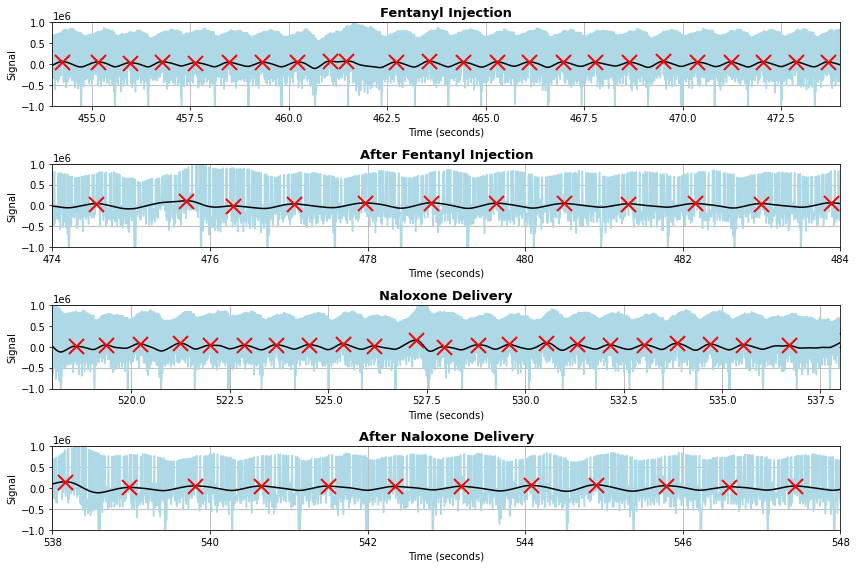

In [14]:
TFent_02_17_P3 = 464
TNalo_02_17_P3 = 528

plotty = 1

#ECG HR
Atime, ECG, RRled, IRled = ReadData("02_17_Pig2_Run2.txt", format = "03_03")
#sampling_time, AC, filtered, peaks = PPG_Filter(Atime, ECG, "HR", N = 50, HR_freq = 8.0, HR_prom = (300000, 10000000))

sampling_time, AC, filtered, peaks = PPG_Filter(Atime, ECG, "HR", N = 50, HR_freq = 1.4, HR_prom = (10000, 100000000))
rawX, rawY, filX, filY, pksX, pksY = PPG_Plot_Signal(AC, Atime, filtered, peaks, TFent_02_17_P3, TNalo_02_17_P3, 
                                                     plot = plotty, offset = 10, yL = -1000000, yH = 1000000)
x, y = PPG_Plot_Values(Atime, peaks, "HR", TFent = TFent_02_17_P3, HR_window = 50, RR_window = 20, plot = not plotty)

#plt.ylim(68,78)

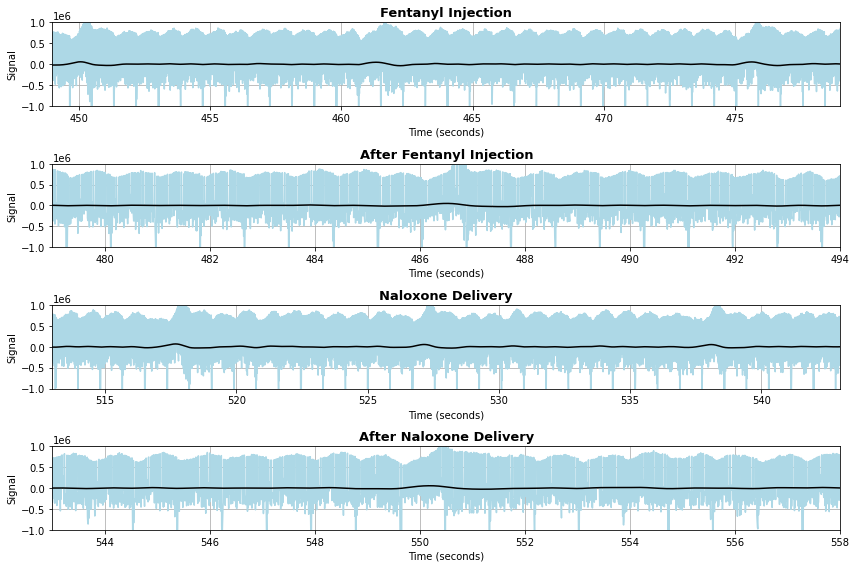

In [15]:
plotty = 1

#ECG HR
Atime, ECG, RRled, IRled = ReadData("02_17_Pig2_Run2.txt", format = "03_03")
sampling_time, AC, filtered, peaks = PPG_Filter(Atime, ECG, "RR", N = 50, HR_freq = 0.6, RR_prom = (300000, 10000000))
rawX, rawY, filX, filY, pksX, pksY = PPG_Plot_Signal(AC, Atime, filtered, peaks, TFent_02_17_P3, TNalo_02_17_P3, 
                                                     plot = plotty, offset = 15, yL = -1000000, yH = 1000000)
x, y = PPG_Plot_Values(Atime, peaks, "RR", TFent = TFent_02_17_P3, HR_window = 50, RR_window = 20, plot = not plotty)

# March 3, 2022 Terminal
#### Terminal 2

### PIG 1

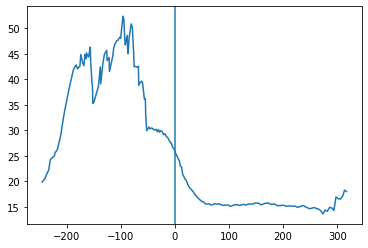

In [16]:
TFent_03_03_P1 = 401.9    #1st injection 401.9    2nd injection 758
TNalo_03_03_P1 = 882.413  #Motor pump 882.413     IV injection 1221 

plotty = 0

#PPG HR RED
Atime, ECG, RRled, IRled = ReadData("03_03_Pig1.txt", format = "03_03")
sampling_time, AC, filtered, peaks = PPG_Filter(Atime, RRled, "HR", N = 50, HR_freq = 2.0, HR_prom = (500, 10000))
rawX, rawY, filX, filY, pksX, pksY = PPG_Plot_Signal(AC, Atime, filtered, peaks, TFent_03_03_P1, TNalo_03_03_P1, 
                                                     plot = plotty, yL = -2800, yH = 1800)
x, y = PPG_Plot_Values(Atime, peaks, "HR", TFent = TFent_03_03_P1, HR_window = 20, RR_window = 10, plot = not plotty)

[-48.19006194153675, -46.354022966030406, -44.506061659514266, -42.35408091224871, -40.512080771237486, -38.640274802701775, -36.62540086204873, -34.5032259423076, -32.696992794325716, -30.533089716050387, -28.661283747514677, -26.77159428246431, -24.6017300386841, -22.700118242623933, -20.762739453534454, -18.55114705121999, -16.70318574470385, -14.676389473041002, -12.58402038082436, -10.670486253754422, -8.715223968150259, -6.521515062350478, -4.703359583358793, -2.5811846636176945, -0.46497090938148145, 1.4545243831933412, 3.719767275051833, 5.6452237331315125, 7.904505459485119, 9.824000752059941, 12.160777629977087, 14.08027292255191, 16.184564345778323, 18.366350920568333, 20.85811810161267, 22.926642531809772, 25.299186402756288, 27.7253807632468, 30.30060426135965, 32.83409960093821, 35.45105125758523, 38.21107088634961, 40.965129349609136, 43.53439168221707, 46.747459889353145, 49.72208147629363, 53.179557469130266, 56.20782954561475, 59.53415989734379, 63.70101458526245, 67.

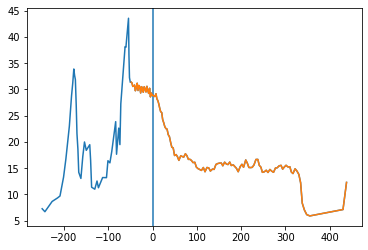

In [17]:
#PPG RR RED

plotty = 0

Atime, ECG, RRled, IRled = ReadData("03_03_Pig1.txt", format = "03_03")
sampling_time, AC, filtered, peaks = PPG_Filter(Atime, RRled, "RR", N = 50, RR_freq = 0.6, RR_prom = (200, 1000))
rawX, rawY, filX, filY, pksX, pksY = PPG_Plot_Signal(AC, Atime, filtered, peaks, TFent_03_03_P1, TNalo_03_03_P1, 
                                                     plot = plotty, yL = -2200, yH = 2200)
x, y = PPG_Plot_Values(Atime, peaks, "RR", TFent = TFent_03_03_P1, RR_window = 4, plot = not plotty)

plt.plot(x[43:], y[43:])

print(list(x[43:]))
print(list(y[43:]))

[-47.28992595029825, -45.46580930580168, -43.67745965433445, -41.4718284175249, -39.588100117979415, -37.79975046651219, -35.71334253980043, -33.71039093015715, -31.844546127126325, -29.674681883346114, -27.74326425976152, -25.948953442789406, -23.761205702494482, -21.782098754870777, -19.922215117344866, -17.6987003840206, -15.797088587960463, -13.734525323268276, -11.731573713624972, -9.853806579584404, -7.803165645901988, -5.734641215704887, -3.755534268081181, -1.6452816793498535, 2.301009884887815, 4.548369280231622, 6.521515062350442, 8.798680285218733, 10.742020239813098, 13.060913621215615, 15.045981734344206, 17.17411781959022, 19.326098566855773, 21.740370596336515, 23.886390178097212, 26.22912822151927, 28.643400251000013, 31.218623749112805, 33.77596375071091, 36.380993076348155, 39.06947871905391, 42.050061471499255, 44.488178162999596, 47.73701336316504, 57.07219854382391, 60.45814055060186, 64.66076223154984, 75.16433585116734, 78.49066620289638, 81.94814219573301, 85.25

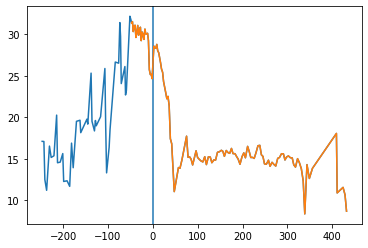

In [18]:
#PPG IR RED

plotty = 0

Atime, ECG, RRled, IRled = ReadData("03_03_Pig1.txt", format = "03_03")
sampling_time, AC, filtered, peaks = PPG_Filter(Atime, IRled, "RR", N = 50, RR_freq = 0.6, RR_prom = (150, 1000))
rawX, rawY, filX, filY, pksX, pksY = PPG_Plot_Signal(AC, Atime, filtered, peaks, TFent_03_03_P1, TNalo_03_03_P1, 
                                                     plot = plotty, yL = -2200, yH = 2200)
x, y = PPG_Plot_Values(Atime, peaks, "RR", TFent = TFent_03_03_P1, RR_window = 4, plot = not plotty)

plt.plot(x[43:], y[43:])

print(list(x[43:]))
print(list(y[43:]))

[320342.07588459936, 331373.0264611074, 336944.4506504831, 333391.6972234751, 335594.3126003062, 363175.1631470955, 406821.9595394888, 431226.6751554776, 414787.8223766242, 375226.8200456603, 347133.98940593563, 352003.13638539345, 393607.6969169685, 459270.50507089985, 525351.3488546417, 581970.6440667941, 643698.4357586834, 718461.2418458401, 787032.0646653962, 826469.6138944795, 829744.3350417954, 795451.3187519106, 715233.4545152045, 580250.6980855719, 409432.89085357945, 257403.92059087224, 154525.66971818343, 60537.40715508334, -68079.3329178086, -202592.81009297154, -281253.86477788474, -273735.53108919517, -187549.13461804055, -66910.91932543034, 16759.18650976895, 32010.30165381054, 26265.00284618487, 43381.22114596099, 52741.26712341324, 18921.103880757008, -20477.467507590984, -4769.324845511592, 59952.15872750231, 97435.31929094612, 50058.83215331608, -54458.39373861965, -143528.7413515519, -165276.44559732944, -108174.39044768058, -9967.038042098578, 55546.21344155329, 526

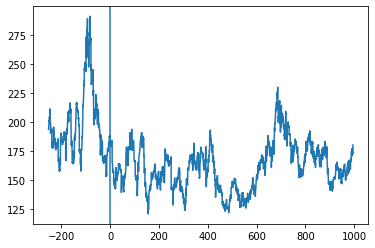

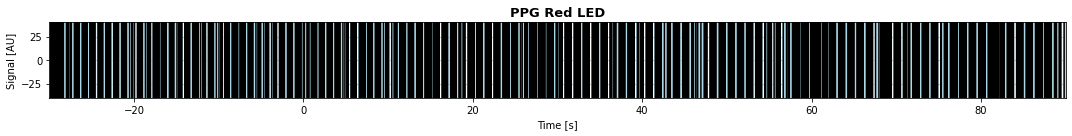

In [19]:
# ECG HR 

plotty = 0

Atime, ECG, RRled, IRled = ReadData("03_03_Pig1.txt", format = "03_03")
sampling_time, AC, filtered, peaks = PPG_Filter(Atime, ECG, "HR", N = 50, HR_freq = 20, HR_prom = (500000, None))
rawX, rawY, filX, filY, pksX, pksY = PPG_Plot_Signal(AC, Atime, filtered, peaks, TFent_03_03_P1, TNalo_03_03_P1, 
                                                     plot = plotty, yL = -2000000, yH = 2000000)
x, y = PPG_Plot_Values(Atime, peaks, "HR", TFent = TFent_03_03_P1, HR_window = 50, RR_window = 20, plot = not plotty)


xxx, yyy = PPG_Plot_Custom_Signal(AC, Atime, filtered, peaks, yL = -40, yH = 40, peaksss = False,
                           LEFT = -30, RIGHT = 90, x_offset = TFent_03_03_P1, title = "PPG Red LED", dims = (15, 2))

print(yyy)

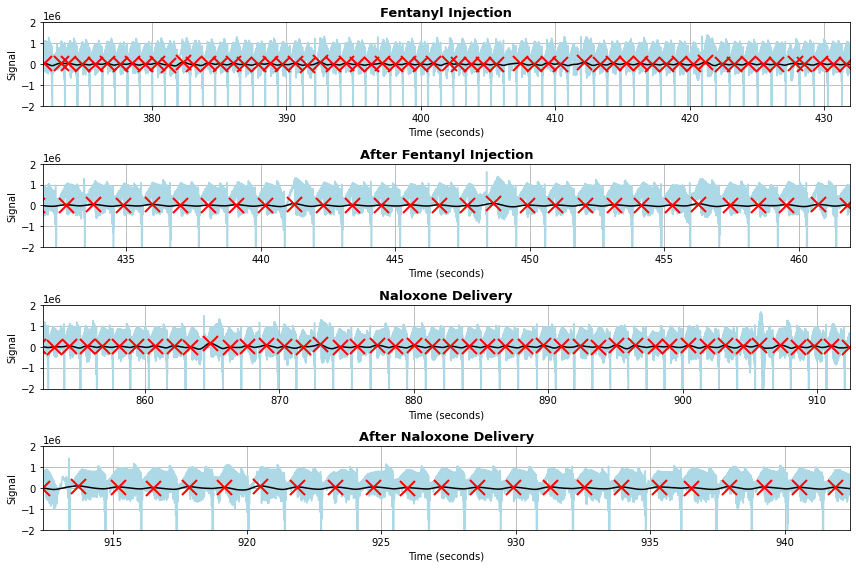

In [20]:
# ECG RR 

plotty = 1

Atime, ECG, RRled, IRled = ReadData("03_03_Pig1.txt", format = "03_03")
sampling_time, AC, filtered, peaks = PPG_Filter(Atime, ECG, "RR", N = 50, RR_freq = 0.6, HR_prom = (500000, None))
rawX, rawY, filX, filY, pksX, pksY = PPG_Plot_Signal(AC, Atime, filtered, peaks, TFent_03_03_P1, TNalo_03_03_P1, 
                                                     plot = plotty, yL = -2000000, yH = 2000000)
x, y = PPG_Plot_Values(Atime, peaks, "RR", TFent = TFent_03_03_P1, HR_window = 50, RR_window = 20, plot = not plotty)

### PIG 2

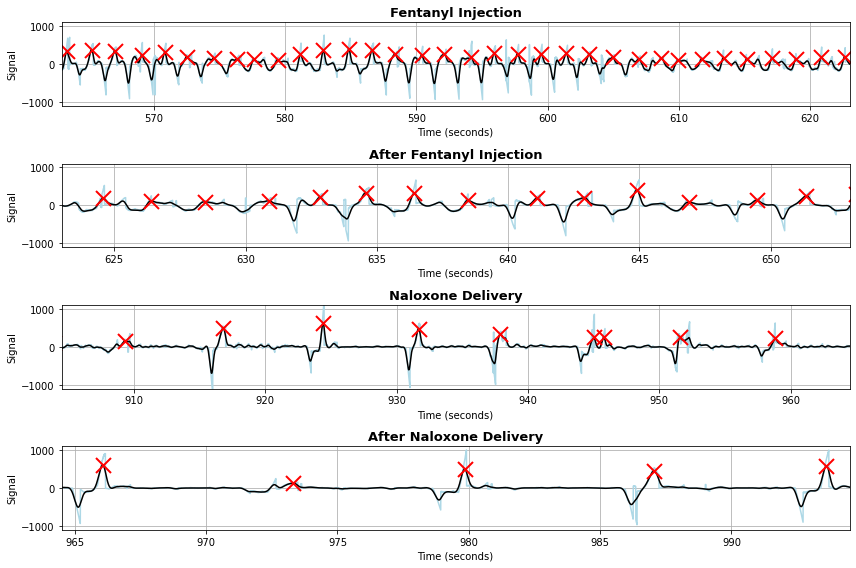

In [21]:
TFent_03_03_P2 = 593
TNalo_03_03_P2 = 934.5

plotty = 1

#PPG HR RED
Atime, ECG, RRled, IRled = ReadData("03_03_Pig2.txt", format = "03_03")
sampling_time, AC, filtered, peaks = PPG_Filter(Atime, RRled, "HR", N = 50, HR_freq = 2.0, HR_prom = (200, 10000))
rawX, rawY, filX, filY, pksX, pksY = PPG_Plot_Signal(AC, Atime, filtered, peaks, TFent_03_03_P2, TNalo_03_03_P2, 
                                                     plot = plotty, yL = -1100, yH = 1100)
x, y = PPG_Plot_Values(Atime, peaks, "HR", TFent = TFent_03_03_P2, HR_window = 50, RR_window = 20, plot = not plotty)

[-553.1272909877163, -551.9019993202461, -550.9952834863182, -547.2703968172088, -541.1561913965328, -538.6872286865804, -537.6334778525561, -530.4287628478315, -527.9414207628672, -526.017712844939, -523.8979582602157, -521.6924332587694, -519.6890813824557, -517.826638047901, -515.939688879997, -514.0649926287676, -512.1045259608154, -510.229829709586, -508.3673863750314, -506.4191726237538, -504.4893382474883, -502.5840097045722, -500.6357959532947, -498.78560553541473, -496.76387428408896, -494.8156605328114, -492.98997594828086, -491.08464740536476, -488.9097546956053, -486.88189698594215, -484.9091774013152, -483.10799865013405, -481.25168177391674, -479.2422034392657, -477.3062426046629, -475.24775260331296, -473.2444007269993, -471.1797842673121, -469.17643239099834, -467.301736139769, -465.4637986385638, -463.2092619704187, -461.43871551092434, -459.4966282179841, -457.42588529995953, -455.3183836319109, -453.4559402973562, -451.61187633781367, -449.81682404496985, -447.923748

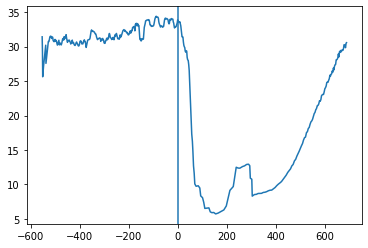

In [22]:
#PPG RR RED

plotty = 0

Atime, ECG, RRled, IRled = ReadData("03_03_Pig2.txt", format = "03_03")
sampling_time, AC, filtered, peaks = PPG_Filter(Atime, RRled, "RR", N = 50, RR_freq = 0.6, RR_prom = (100, 10000))
rawX, rawY, filX, filY, pksX, pksY = PPG_Plot_Signal(AC, Atime, filtered, peaks, TFent_03_03_P2, TNalo_03_03_P2, 
                                                     plot = plotty, yL = -1100, yH = 1100)
x, y = PPG_Plot_Values(Atime, peaks, "RR", TFent = TFent_03_03_P2, RR_window = 10, plot = not plotty)

print(list(x))
print(list(y))

[-521.6801803420947, -519.6707020074435, -517.8143851312263, -515.921309504985, -514.0404867954182, -512.0983995024781, -510.22370325124865, -508.3490070000193, -506.3946667904044, -504.4525794974642, -502.54725095454813, -500.59903720327054, -498.74884678539064, -496.75162136741426, -494.8156605328114, -492.9715965732688, -491.07239448869007, -488.84849011223173, -486.8757705276048, -484.90305094297787, -483.0651134417726, -481.23942885724205, -479.2360769809284, -477.25723093796404, -475.1926144782768, -473.20151551863785, -471.1736578089747, -469.17643239099834, -467.2894832230943, -465.44541926355174, -463.17250322039456, -461.39583030256284, -459.47824884297205, -457.40137946661014, -455.3245100902482, -453.46206675569357, -451.61187633781367, -449.78006529494576, -447.91149550205375, -445.9632817507762, -444.0702061245348, -442.11586591491994, -440.24729612202793, -438.2990823707504, -436.38762736949695, -434.188228826388, -432.15424465838754, -430.18152507376055, -428.4109786142

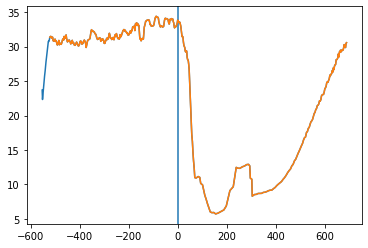

In [23]:
#PPG RR IR

plotty = 0

Atime, ECG, RRled, IRled = ReadData("03_03_Pig2.txt", format = "03_03")
sampling_time, AC, filtered, peaks = PPG_Filter(Atime, IRled, "RR", N = 50, RR_freq = 0.6, RR_prom = (100, 10000))
rawX, rawY, filX, filY, pksX, pksY = PPG_Plot_Signal(AC, Atime, filtered, peaks, TFent_03_03_P2, TNalo_03_03_P2, 
                                                     plot = plotty, yL = -1100, yH = 1100)
x, y = PPG_Plot_Values(Atime, peaks, "RR", TFent = TFent_03_03_P2, RR_window = 10, plot = not plotty)

plt.plot(x[10:], y[10:])

print(list(x[10:]))
print(list(y[10:]))

[-381.4823077501592, -380.52045379119505, -379.6198644156045, -378.83567774842356, -377.62263899762814, -377.1202694139654, -376.293197538423, -375.0862852459649, -374.5655362872901, -373.70783212006097, -372.8746337861813, -371.71060670208465, -371.1776048267351, -370.3444064928554, -369.4499435756022, -368.61674524172247, -367.7957998245175, -366.913589823939, -365.98236815666166, -365.2104344061554, -364.38948898895046, -363.5011525300346, -362.6679541961548, -361.84088232061254, -360.9341664866846, -360.05195648610606, -359.2616433605878, -358.0608575264671, -357.54010856779223, -356.7130366922499, -355.8798383583702, -354.99762835779165, -354.16443002391196, -352.4674010644658, -351.6587085639355, -350.75811918834495, -349.9004150211158, -349.0672166872361, -347.3763141861273, -345.66703231000645, -344.8460868928014, -343.13680501668057, -342.30973314113817, -341.41527022388493, -340.5636925149932, -339.7182412644388, -338.02733876332996, -336.32418334554643, -335.5093643866788, -

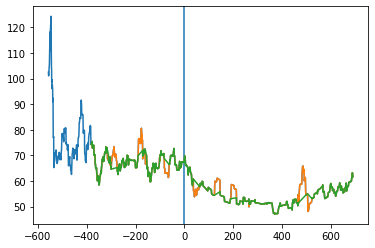

In [24]:
# ECG HR 

plotty = 0

Atime, ECG, RRled, IRled = ReadData("03_03_Pig2.txt", format = "03_03")
sampling_time, AC, filtered, peaks = PPG_Filter(Atime, ECG, "HR", N = 50, HR_freq = 3.0, HR_prom = (600000, 100000000))
rawX, rawY, filX, filY, pksX, pksY = PPG_Plot_Signal(AC, Atime, filtered, peaks, TFent_03_03_P2, TNalo_03_03_P2, 
                                                     plot = plotty, yL = -2000000, yH = 2000000)
x, y = PPG_Plot_Values(Atime, peaks, "HR", TFent = TFent_03_03_P2, HR_window = 20, RR_window = 20, plot = not plotty)

plt.plot(x[200:], y[200:])
xx, yy = outliers(x[200:], y[200:])
plt.plot(xx, yy)

print(list(xx))
print(list(yy))

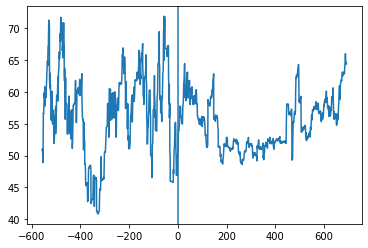

In [25]:
# ECG RR 
Atime, ECG, RRled, IRled = ReadData("03_03_Pig2.txt", format = "03_03")
sampling_time, AC, filtered, peaks = PPG_Filter(Atime, ECG, "RR", N = 50, RR_freq = 0.6, HR_prom = (500000, None))
rawX, rawY, filX, filY, pksX, pksY = PPG_Plot_Signal(AC, Atime, filtered, peaks, TFent_03_03_P2, TNalo_03_03_P2, 
                                                     plot = 0, yL = -2000000, yH = 2000000)
x, y = PPG_Plot_Values(Atime, peaks, "RR", TFent = TFent_03_03_P2, HR_window = 50, RR_window = 20, plot = True)

# April 14, 2022 Terminal
#### Terminal 3

### PIG 1

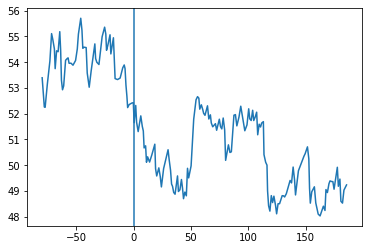

In [26]:
TFent_04_14_P1 = 87
TNalo_04_14_P1 = 195

plotty = 0

#PPG HR RED
Atime, ECG, RRled, IRled = ReadData("04_14_Pig1.txt", format = "04_14")
sampling_time, AC, filtered, peaks = PPG_Filter(Atime, RRled, "HR", N = 50, HR_freq = 2.0, HR_prom = (40, 10000000))
rawX, rawY, filX, filY, pksX, pksY = PPG_Plot_Signal(AC, Atime, filtered, peaks, TFent_04_14_P1, TNalo_04_14_P1, 
                                                     plot = plotty, yL = -250, yH = 250)
x, y = PPG_Plot_Values(Atime, peaks, "HR", TFent = TFent_04_14_P1, HR_window = 50, RR_window = 20, plot = not plotty)

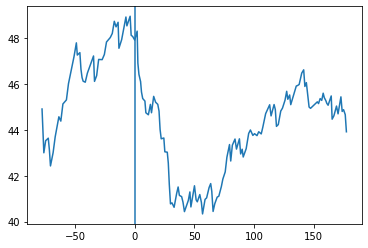

In [27]:
#PPG IR RED
Atime, ECG, RRled, IRled = ReadData("04_14_Pig1.txt", format = "04_14")
sampling_time, AC, filtered, peaks = PPG_Filter(Atime, IRled, "HR", N = 50, HR_freq = 2.0, HR_prom = (50, 10000000))
rawX, rawY, filX, filY, pksX, pksY = PPG_Plot_Signal(AC, Atime, filtered, peaks, TFent_04_14_P1, TNalo_04_14_P1, 
                                                     plot = plotty, yL = -250, yH = 250)
x, y = PPG_Plot_Values(Atime, peaks, "HR", TFent = TFent_04_14_P1, HR_window = 50, RR_window = 20, plot = not plotty)

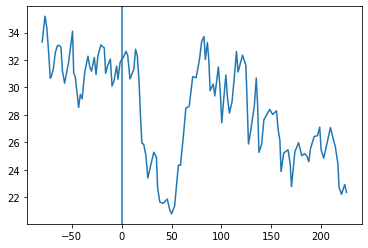

In [28]:
#PPG RR RED

plotty = 0

Atime, ECG, RRled, IRled = ReadData("04_14_Pig1.txt", format = "04_14")
sampling_time, AC, filtered, peaks = PPG_Filter(Atime, RRled, "RR", N = 50, RR_freq = 0.6, RR_prom = (10, 10000))
rawX, rawY, filX, filY, pksX, pksY = PPG_Plot_Signal(AC, Atime, filtered, peaks, TFent_04_14_P1, TNalo_04_14_P1, 
                                                     plot = plotty, yL = -200, yH = 200)
x, y = PPG_Plot_Values(Atime, peaks, "RR", TFent = TFent_04_14_P1, RR_window = 10, plot = not plotty)

#print(list(x))
#print(list(y))

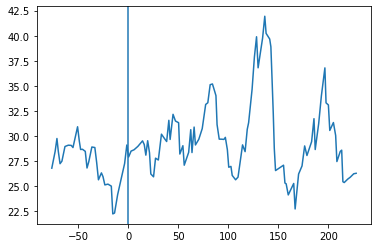

In [29]:
#PPG RR IR

plotty = 0

Atime, ECG, RRled, IRled = ReadData("04_14_Pig1.txt", format = "04_14")
sampling_time, AC, filtered, peaks = PPG_Filter(Atime, IRled, "RR", N = 50, RR_freq = 0.6, RR_prom = (10, 1000))
rawX, rawY, filX, filY, pksX, pksY = PPG_Plot_Signal(AC, Atime, filtered, peaks, TFent_04_14_P1, TNalo_04_14_P1, 
                                                     plot = plotty, yL = -200, yH = 200)
x, y = PPG_Plot_Values(Atime, peaks, "RR", TFent = TFent_04_14_P1, RR_window = 10, plot = not plotty)

#print(list(x))
#print(list(y))

[-78.83656529608633, -77.89840704186872, -76.96024878765112, -76.01583614507206, -75.09018666757736, -74.14577402499829, -73.23263332422648, -72.28196629328598, -71.35631681579127, -70.41815856157366, -69.48000030735606, -68.5606052182228, -67.62244696400519, -66.70305187487195, -65.75863923229288, -64.82048097807527, -63.88232272385766, -62.9379100812786, -62.01851499214535, -61.06784796120483, -60.14219848371013, -59.20404022949252, -58.25962758691347, -57.34023249778021, -56.395819855201154, -55.47017037770644, -54.525757735127385, -53.581345092548325, -52.64318683833072, -51.711282972474564, -50.78563349497985, -49.85372962912369, -48.90931698654464, -47.977413120688475, -47.03300047810942, -46.10735100061471, -45.156683969674205, -44.2310344921795, -43.292876237961885, -42.34846359538283, -41.41655972952667, -40.47840147530906, -39.54024322109146, -38.602084966873846, -37.657672324294786, -36.72576845843863, -35.78135581585957, -34.84945195000341, -33.90503930742435, -32.979389829

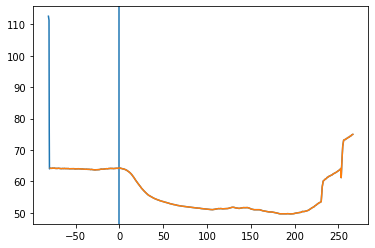

In [30]:
#ECG HR

plotty = 0
Atime, ECGG, RRled, IRled = ReadData("04_14_Pig1.txt", format = "04_14")

ECG = [-1*i for i in ECGG]

#sampling_time, AC, filtered, peaks = PPG_Filter(Atime, ECG, "HR", N = 50, HR_freq = 2.0, HR_prom = (100000, None))
sampling_time, AC, filtered, peaks = PPG_Filter(Atime, ECG, "HR", N = 50, HR_freq = 8.0, HR_prom = (500000, 10000000))
rawX, rawY, filX, filY, pksX, pksY = PPG_Plot_Signal(AC, Atime, filtered, peaks, TFent_04_14_P1, TNalo_04_14_P1, 
                                                     plot = plotty, offset = 15, yL = -1000000, yH = 1000000, 
                                                     custom = True, custX = TFent_04_14_P1 + 110, custY = TFent_04_14_P1 + 150)

x, y = PPG_Plot_Values(Atime, peaks, "HR", TFent = TFent_04_14_P1, HR_window = 20, RR_window = 20, plot = not plotty)

plt.plot(x[5:], y[5:])
print(list(x[5:]))
print(list(y[5:]))

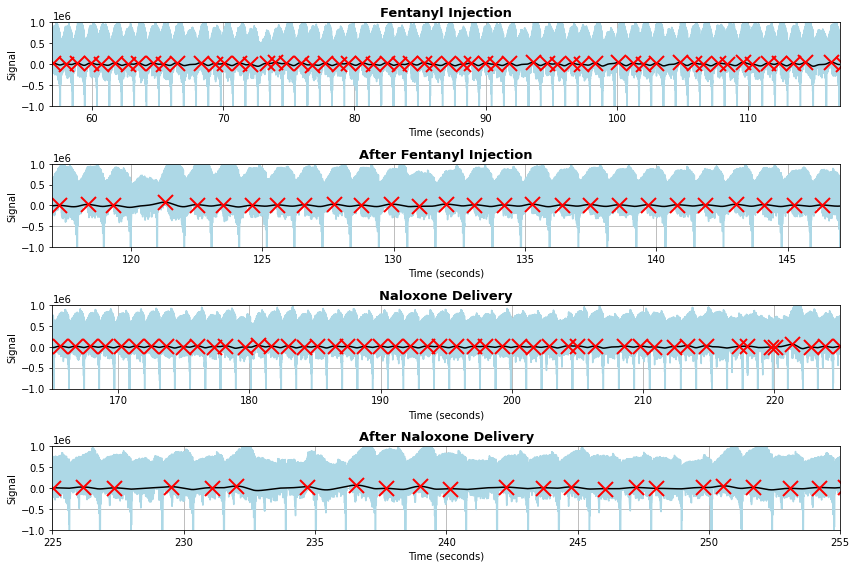

In [31]:
#ECG RR
Atime, ECG, RRled, IRled = ReadData("04_14_Pig1.txt", format = "04_14")
sampling_time, AC, filtered, peaks = PPG_Filter(Atime, ECG, "RR", N = 50, RR_freq = 0.6, HR_prom = (40, 1000))
rawX, rawY, filX, filY, pksX, pksY = PPG_Plot_Signal(AC, Atime, filtered, peaks, TFent_04_14_P1, TNalo_04_14_P1, 
                                                     plot = 1, yL = -1000000, yH = 1000000)
#x, y = PPG_Plot_Values(Atime, peaks, "RR", TFent = TFent_04_14_P1, HR_window = 50, RR_window = 20, plot = True)

### PIG 2

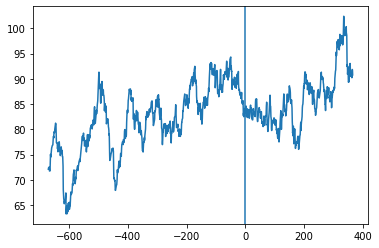

In [32]:
TFent_04_14_P2 = 780
TNalo_04_14_P2 = 966

plotty = 0

#PPG HR RED
Atime, ECG, RRled, IRled = ReadData("04_14_Pig2.txt", format = "04_14")
sampling_time, AC, filtered, peaks = PPG_Filter(Atime, RRled, "HR", N = 50, HR_freq = 2.0, HR_prom = (1, 25))
rawX, rawY, filX, filY, pksX, pksY = PPG_Plot_Signal(AC, Atime, filtered, peaks, TFent_04_14_P2, TNalo_04_14_P2, 
                                                     plot = plotty, yL = -10, yH = 10)
x, y = PPG_Plot_Values(Atime, peaks, "HR", TFent = TFent_04_14_P2, HR_window = 50, RR_window = 20, plot = not plotty)

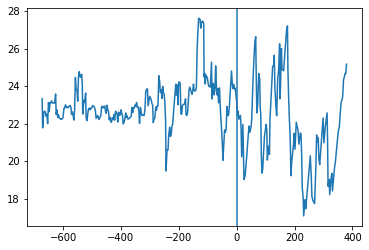

In [33]:
#PPG RR RED
Atime, ECG, RRled, IRled = ReadData("04_14_Pig2.txt", format = "04_14")
sampling_time, AC, filtered, peaks = PPG_Filter(Atime, RRled, "RR", N = 50, RR_freq = 0.6, RR_prom = (2, 1000))
rawX, rawY, filX, filY, pksX, pksY = PPG_Plot_Signal(AC, Atime, filtered, peaks, TFent_04_14_P2, TNalo_04_14_P2, 
                                                     plot = 0, yL = -20, yH = 20)
x, y = PPG_Plot_Values(Atime, peaks, "RR", TFent = TFent_04_14_P2, RR_window = 10, plot = True)

#print(list(x))
#print(list(y))

[-671.2388750796724, -670.527123025735, -669.8090722810548, -669.0910215363746, -668.3603734102087, -667.6234265933001, -666.9116745393626, -666.1873251039395, -665.4692743592593, -664.0079781069277, -663.2773299807618, -662.5655779268244, -661.8286311099157, -661.1168790559783, -660.3925296205553, -659.6681801851322, -658.9564281311948, -658.2068839328006, -657.4951318788632, -656.7644837526973, -656.0464330080171, -655.3283822633368, -654.6040328279138, -653.8733847017479, -653.1553339570677, -652.4372832123875, -651.7129337769644, -650.9885843415415, -650.2579362153756, -649.5398854706954, -648.8155360352723, -648.0911865998493, -647.3605384736834, -646.6424877290032, -645.9118396028373, -645.1811914766715, -644.4757381134768, -643.7450899873111, -643.0144418611452, -642.296391116465, -641.5783403717847, -640.8476922456189, -640.1296415009386, -639.3989933747728, -638.6746439393497, -637.9502945039268, -637.2259450685037, -636.4952969423379, -635.764648816172, -635.0402993807489, -6

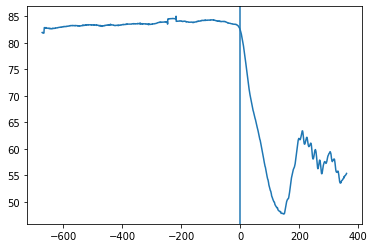

In [34]:
#ECG RR

plotty = 0

Atime, ECG, RRled, IRled = ReadData("04_14_Pig2.txt", format = "04_14")
sampling_time, AC, filtered, peaks = PPG_Filter(Atime, ECG, "HR", N = 50, HR_freq = 2.0, HR_prom = (500000, None))
rawX, rawY, filX, filY, pksX, pksY = PPG_Plot_Signal(AC, Atime, filtered, peaks, TFent_04_14_P2, TNalo_04_14_P2, 
                                                     plot = plotty, yL = -1000000, yH = 1000000)
x, y = PPG_Plot_Values(Atime, peaks, "HR", TFent = TFent_04_14_P2, HR_window = 40, RR_window = 20, plot = not plotty)

print(list(x))
print(list(y))


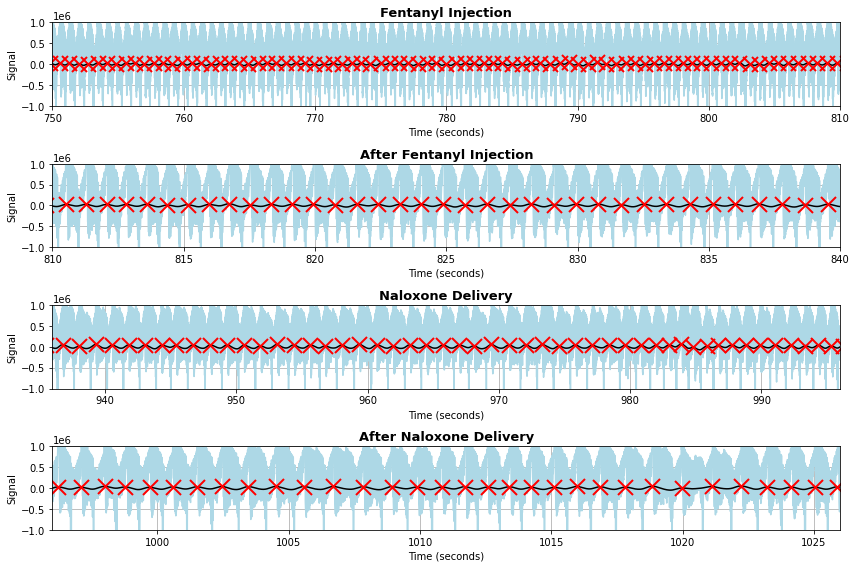

In [35]:
#ECG RR
Atime, ECG, RRled, IRled = ReadData("04_14_Pig2.txt", format = "04_14")
sampling_time, AC, filtered, peaks = PPG_Filter(Atime, ECG, "RR", N = 50, HR_freq = 2.0, HR_prom = (40, 1000))
rawX, rawY, filX, filY, pksX, pksY = PPG_Plot_Signal(AC, Atime, filtered, peaks, TFent_04_14_P2, TNalo_04_14_P2, 
                                                     plot = 1, yL = -1000000, yH = 1000000)
#x, y = PPG_Plot_Values(Atime, peaks, "RR", TFent = TFent_04_14_P2, HR_window = 50, RR_window = 20, plot = True)

# June 16, 2022 Terminal

### PIG 1

'\nHx1, Hy1 = PPG_Plot_Custom_Signal(AC, Atime, filtered, peaks, yL = -40, yH = 40, peaksss = False,\n                           LEFT = -40, RIGHT = -10, x_offset = TFent_06_16_P1, dims = (5, 2))\nHx2, Hy2 = PPG_Plot_Custom_Signal(AC, Atime, filtered, peaks, yL = -40, yH = 40, peaksss = False,\n                           LEFT = 90, RIGHT = 120, x_offset = TFent_06_16_P1, dims = (5, 2))\nHx3, Hy3 = PPG_Plot_Custom_Signal(AC, Atime, filtered, peaks, yL = -40, yH = 40, peaksss = False,\n                           LEFT = 150, RIGHT = 180, x_offset = TNalo_06_16_P1, dims = (5, 2))\n\nprint(Hy1)\n'

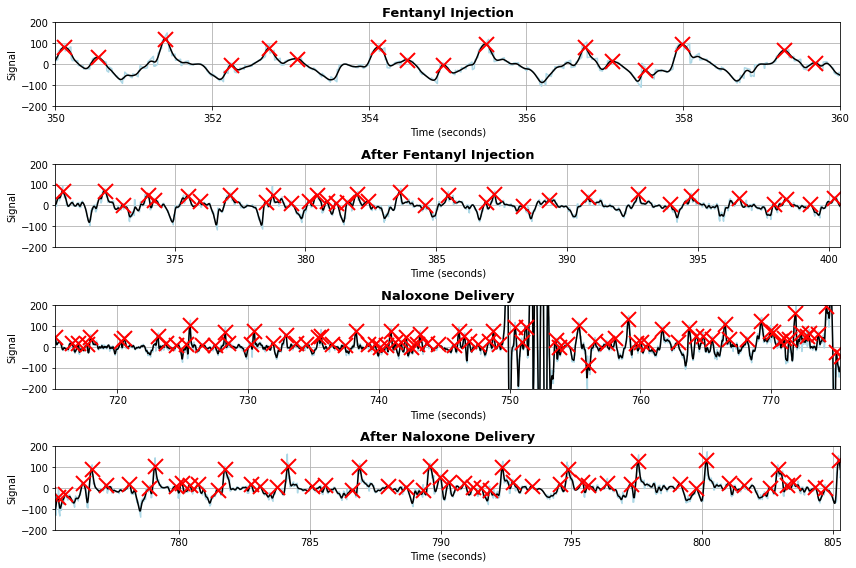

In [36]:
TFent_06_16_P1 = 340.442
TNalo_06_16_P1 = 745.279

plot_set = True

#PPG HR RED
Atime, ECG, RRled, IRled, Temp = ReadData("06_16_Pig1.txt", format = "06_16")
sampling_time, AC, filtered, peaks = PPG_Filter(Atime, RRled, "HR", N = 50, HR_freq = 6.0, HR_prom = (20, None))
rawX, rawY, filX, filY, pksX, pksY = PPG_Plot_Signal(AC, Atime, filtered, peaks, TFent_06_16_P1, TNalo_06_16_P1, 
                                                     plot = plot_set, yL = -200, yH = 200, custom = True, 
                                                     custX = 350, custY = 360)
x, y = PPG_Plot_Values(Atime, peaks, "HR", TFent = TFent_06_16_P1, HR_window = 50, RR_window = 50, plot = plot_set)


"""
Hx1, Hy1 = PPG_Plot_Custom_Signal(AC, Atime, filtered, peaks, yL = -40, yH = 40, peaksss = False,
                           LEFT = -40, RIGHT = -10, x_offset = TFent_06_16_P1, dims = (5, 2))
Hx2, Hy2 = PPG_Plot_Custom_Signal(AC, Atime, filtered, peaks, yL = -40, yH = 40, peaksss = False,
                           LEFT = 90, RIGHT = 120, x_offset = TFent_06_16_P1, dims = (5, 2))
Hx3, Hy3 = PPG_Plot_Custom_Signal(AC, Atime, filtered, peaks, yL = -40, yH = 40, peaksss = False,
                           LEFT = 150, RIGHT = 180, x_offset = TNalo_06_16_P1, dims = (5, 2))

print(Hy1)
"""

[-75.56046150342212, -74.0086592565112, -72.32287708318418, -70.5237129694154, -68.63201043303008, -66.66662865017659, -64.64332681284637, -62.57534554872898, -60.47457415702333, -58.352739570554064, -56.222611064127506, -54.0984363844792, -51.99399175404959, -49.91885434127074, -47.87589618673044, -45.860882994922804, -43.86278314262161, -41.8640649289179, -39.84098728017018, -37.763892238394334, -35.59751053564945, -33.30129438818793, -30.829794325586512, -28.13360835407917, -25.161953109590797, -21.866401621486, -18.20386986217775, -14.138567987927978, -9.644072334252893, -4.705885102322552, 0.675703218861825, 6.482439441349127, 12.67457068226069, 19.187005869261895, 25.925272952626557, 32.76132972025745, 39.52927447367492, 46.02645468486315, 52.03104949932703, 57.33115863049965, 61.744004200435704, 65.11965638521356, 67.34007517894194, 68.31927427737183, 68.00446658640885, 66.37740235693542, 63.455706954670376, 59.294633260788615, 53.98944917464616, 47.67850503318316, 40.5417131840

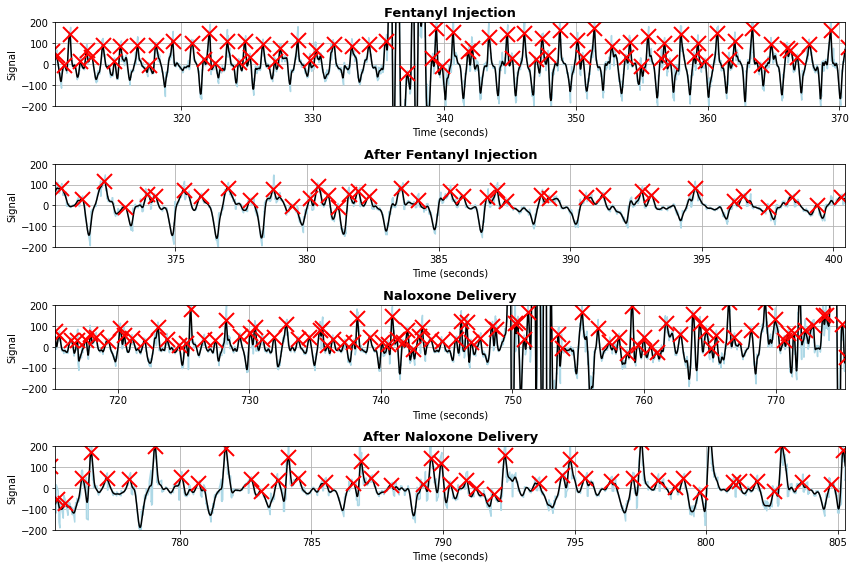

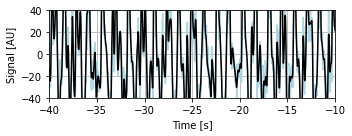

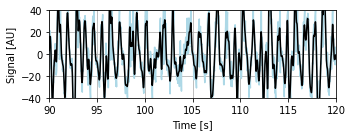

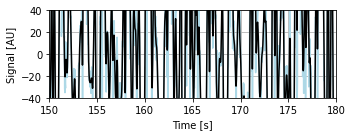

In [37]:
plot_set = True

#PPG HR IR
Atime, ECG, RRled, IRled, Temp = ReadData("06_16_Pig1.txt", format = "06_16")
sampling_time, AC, filtered, peaks = PPG_Filter(Atime, IRled, "HR", N = 50, HR_freq = 4.0, HR_prom = (20, 100000))
rawX, rawY, filX, filY, pksX, pksY = PPG_Plot_Signal(AC, Atime, filtered, peaks, TFent_06_16_P1, TNalo_06_16_P1, 
                                                     plot = plot_set, yL = -200, yH = 200)
x, y = PPG_Plot_Values(Atime, peaks, "HR", TFent = TFent_06_16_P1, HR_window = 50, RR_window = 20, plot = not plot_set)

Hx1, Hy1 = PPG_Plot_Custom_Signal(AC, Atime, filtered, peaks, yL = -40, yH = 40, peaksss = False,
                           LEFT = -40, RIGHT = -10, x_offset = TFent_06_16_P1, dims = (5, 2))
Hx2, Hy2 = PPG_Plot_Custom_Signal(AC, Atime, filtered, peaks, yL = -40, yH = 40, peaksss = False,
                           LEFT = 90, RIGHT = 120, x_offset = TFent_06_16_P1, dims = (5, 2))
Hx3, Hy3 = PPG_Plot_Custom_Signal(AC, Atime, filtered, peaks, yL = -40, yH = 40, peaksss = False,
                           LEFT = 150, RIGHT = 180, x_offset = TNalo_06_16_P1, dims = (5, 2))

print(Hy3)

'\nHx1, Hy1 = PPG_Plot_Custom_Signal(AC, Atime, filtered, peaks, yL = -40, yH = 40, peaksss = False,\n                           LEFT = -40, RIGHT = -10, x_offset = TFent_06_16_P1, dims = (5, 2))\nHx2, Hy2 = PPG_Plot_Custom_Signal(AC, Atime, filtered, peaks, yL = -40, yH = 40, peaksss = False,\n                           LEFT = 90, RIGHT = 120, x_offset = TFent_06_16_P1, dims = (5, 2))\nHx3, Hy3 = PPG_Plot_Custom_Signal(AC, Atime, filtered, peaks, yL = -40, yH = 40, peaksss = False,\n                           LEFT = 150, RIGHT = 180, x_offset = TNalo_06_16_P1, dims = (5, 2))\n\nprint(Hy3)\n'

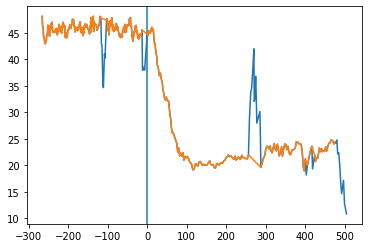

In [38]:
#PPG RR IR
Atime, ECG, RRled, IRled, Temp = ReadData("06_16_Pig1.txt", format = "06_16")
sampling_time, AC, filtered, peaks = PPG_Filter(Atime, IRled, "RR", N = 50, RR_freq = 0.6, RR_prom = (10, 100))
rawX, rawY, filX, filY, pksX, pksY = PPG_Plot_Signal(AC, Atime, filtered, peaks, TFent_06_16_P1, TNalo_06_16_P1, 
                                                     plot = 0, yL = -200, yH = 200, custom = True, 
                                                     custX = TFent_06_16_P1 + 260, custY = TFent_06_16_P1  + 320)
x, y = PPG_Plot_Values(Atime, peaks, "RR", TFent = TFent_06_16_P1, RR_window = 5, plot = 1)

xx, yy = outliers(x, y)
plt.plot(xx[:-10], yy[:-10])

#print(xx[:-10])
#print(yy[:-10])

"""
Hx1, Hy1 = PPG_Plot_Custom_Signal(AC, Atime, filtered, peaks, yL = -40, yH = 40, peaksss = False,
                           LEFT = -40, RIGHT = -10, x_offset = TFent_06_16_P1, dims = (5, 2))
Hx2, Hy2 = PPG_Plot_Custom_Signal(AC, Atime, filtered, peaks, yL = -40, yH = 40, peaksss = False,
                           LEFT = 90, RIGHT = 120, x_offset = TFent_06_16_P1, dims = (5, 2))
Hx3, Hy3 = PPG_Plot_Custom_Signal(AC, Atime, filtered, peaks, yL = -40, yH = 40, peaksss = False,
                           LEFT = 150, RIGHT = 180, x_offset = TNalo_06_16_P1, dims = (5, 2))

print(Hy3)
"""

[-14.403458690161358, -14.611045532273135, -14.813367938040319, -15.010509048911961, -15.202560232919694, -15.38961869787023, -15.571785897979153, -15.749167172170162, -15.921871796515488, -16.09001303782827, -16.253708208380573, -16.413078571222705, -16.568248788760712, -16.71934604609726, -16.866499438452422, -17.009839785772567, -17.149499592464874, -17.285613008049793, -17.418315788699566, -17.54774525963052, -17.67404027831644, -17.797341198489917, -17.917789834898326, -18.03552939868115, -18.150704342533775, -18.26346014391668, -18.373943147575904, -18.482300504964, -18.588680156347394, -18.693230821853277, -18.796102005935406, -18.897444045623345, -18.997408224190742, -19.096146928534854, -19.193813817723488, -19.290563991836898, -19.38655416106759, -19.481942217266464, -19.576885004523337, -19.67153486304077, -19.766037321709018, -19.86053055277157, -19.95514445329445, -20.049996817832064, -20.145187507649, -20.24079443066684, -20.336872333820676, -20.433452539235567, -20.53054

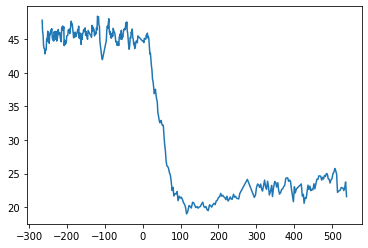

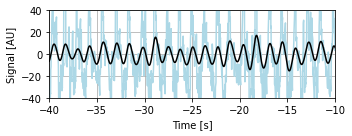

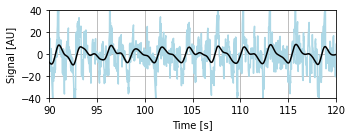

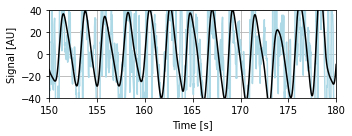

In [39]:
#PPG RR RED
Atime, ECG, RRled, IRled, Temp = ReadData("06_16_Pig1.txt", format = "06_16")
sampling_time, AC, filtered, peaks = PPG_Filter(Atime, RRled, "RR", N = 50, RR_freq = 0.6, RR_prom = (5, 80))
rawX, rawY, filX, filY, pksX, pksY = PPG_Plot_Signal(AC, Atime, filtered, peaks, TFent_06_16_P1, TNalo_06_16_P1, 
                                                     plot = 0, yL = -200, yH = 200, custom = True, 
                                                     custX = TFent_06_16_P1 + 260, custY = TFent_06_16_P1  + 320)
x, y = PPG_Plot_Values(Atime, peaks, "RR", TFent = TFent_06_16_P1, RR_window = 5, plot = 0)

xx, yy = outliers(x, y)
plt.plot(xx[:-10], yy[:-10])

#print(xx[:-10])
#print(yy[:-10])

Hx1, Hy1 = PPG_Plot_Custom_Signal(AC, Atime, filtered, peaks, yL = -40, yH = 40, peaksss = False,
                           LEFT = -40, RIGHT = -10, x_offset = TFent_06_16_P1, dims = (5, 2))
Hx2, Hy2 = PPG_Plot_Custom_Signal(AC, Atime, filtered, peaks, yL = -40, yH = 40, peaksss = False,
                           LEFT = 90, RIGHT = 120, x_offset = TFent_06_16_P1, dims = (5, 2))
Hx3, Hy3 = PPG_Plot_Custom_Signal(AC, Atime, filtered, peaks, yL = -40, yH = 40, peaksss = False,
                           LEFT = 150, RIGHT = 180, x_offset = TNalo_06_16_P1, dims = (5, 2))

print(Hy3)

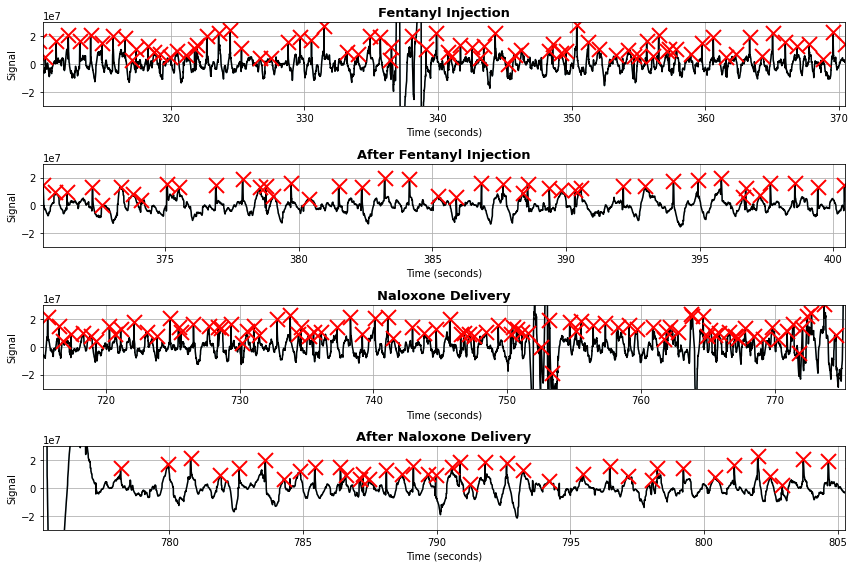

In [40]:
#ECG HR
plotty = 1

Atime, ECG, RRled, IRled, Temp = ReadData("06_16_Pig1.txt", format = "06_16")
sampling_time, AC, filtered, peaks = PPG_Filter(Atime, ECG, "HR", N = 50, HR_freq = 80.0, highpass = 0.0, HR_prom = (9000000, None))
rawX, rawY, filX, filY, pksX, pksY = PPG_Plot_Signal(AC, Atime, filtered, peaks, TFent_06_16_P1, TNalo_06_16_P1, 
                                                     plot = plotty, yL = -30000000, yH = 30000000)
x, y = PPG_Plot_Values(Atime, peaks, "HR", TFent = TFent_06_16_P1, HR_window = 50, plot = not plotty)


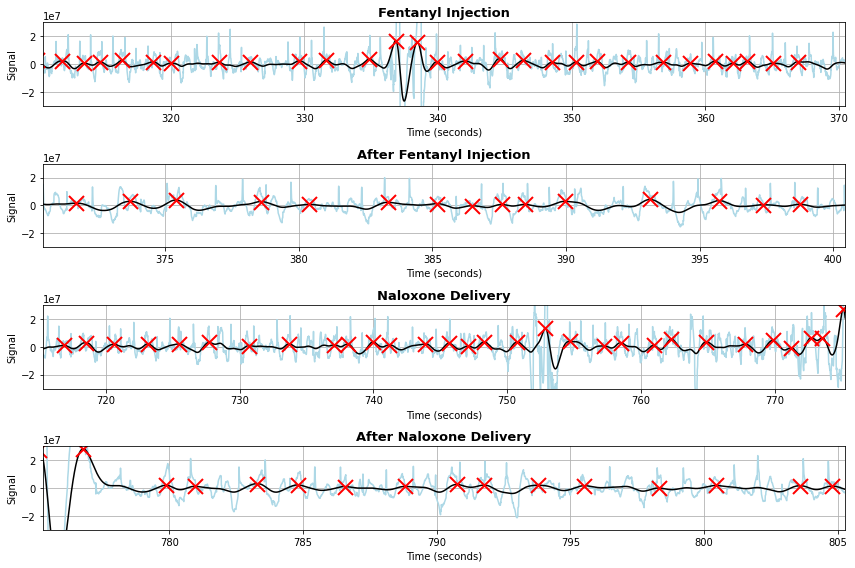

In [41]:
#ECG RR
Atime, ECG, RRled, IRled, Temp = ReadData("06_16_Pig1.txt", format = "06_16")
sampling_time, AC, filtered, peaks = PPG_Filter(Atime, ECG, "RR", N = 50, RR_freq = 0.6, RR_prom = (1000000, None))
rawX, rawY, filX, filY, pksX, pksY = PPG_Plot_Signal(AC, Atime, filtered, peaks, TFent_06_16_P1, TNalo_06_16_P1, 
                                                     plot = 1, yL = -30000000, yH = 30000000)
#x, y = PPG_Plot_Values(Atime, peaks, "RR", TFent = TFent_06_16_P1, RR_window = 20, plot = True)

### PIG 2

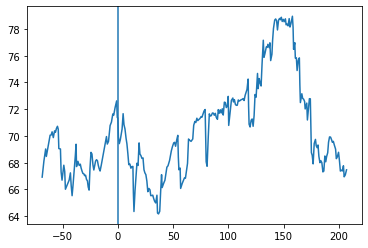

In [42]:
TFent_06_16_P2 = 191.845
TNalo_06_16_P2 = 352.618

plotty = 0

#PPG HR RED
Atime, ECG, RRled, IRled, Temp = ReadData("06_16_Pig2.txt", format = "06_16")
sampling_time, AC, filtered, peaks = PPG_Filter(Atime, RRled, "HR", N = 50, HR_freq = 2.0, HR_prom = (5, 1000))
rawX, rawY, filX, filY, pksX, pksY = PPG_Plot_Signal(AC, Atime, filtered, peaks, TFent_06_16_P2, TNalo_06_16_P2, 
                                                     plot = plotty, yL = -50, yH = 50)
x, y = PPG_Plot_Values(Atime, peaks, "HR", TFent = TFent_06_16_P2, HR_window = 40, RR_window = 20, plot = not plotty)

[-68.55364943845132, -67.0272458807448, -66.10321614083051, -65.36633166469633, -64.73471639943845, -49.17241805822375, -48.10802937047438, -47.400386341805834, -45.88567936308557, -44.07855790970889, -42.979079485000746, -42.25973987734596, -41.481917374759874, -40.65146026673564, -39.89118263262895, -38.370627364415554, -37.47583907196691, -36.6921682798877, -36.1365807780405, -35.019557484852974, -34.14231406088371, -33.36449155829763, -32.54573102925965, -31.738667079207925, -30.90820997118369, -30.118690889611354, -29.28238549209399, -28.428535226097242, -27.574684960100495, -26.890435089404466, -26.059977981380232, -25.323093505246053, -23.597848104773167, -22.574397443475693, -21.831664677848384, -21.112325070193588, -20.62691704226393, -19.33444506428255, -18.53322940372396, -16.936646372099904, -16.135430711541307, -15.193856103147635, -13.608969650509831, -12.445160041377274, -11.573764906901143, -10.292989507906018, -9.637981084675634, -8.848462003103297, -7.965370289640905,

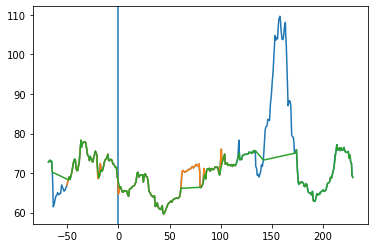

In [43]:
plotty = 0

#PPG HR IR
Atime, ECG, RRled, IRled, Temp = ReadData("06_16_Pig2.txt", format = "06_16")
sampling_time, AC, filtered, peaks = PPG_Filter(Atime, IRled, "HR", N = 50, HR_freq = 2.0, HR_prom = (5, 1000))
rawX, rawY, filX, filY, pksX, pksY = PPG_Plot_Signal(AC, Atime, filtered, peaks, TFent_06_16_P2, TNalo_06_16_P2, 
                                                     plot = plotty, yL = -50, yH = 50)
x, y = PPG_Plot_Values(Atime, peaks, "HR", TFent = TFent_06_16_P2, HR_window = 20, RR_window = 20, plot = not plotty)

plt.plot(x[20:200], y[20:200])

xx, yy = outliers(x, y)
plt.plot(xx,yy)

#print(list(x[20:200]))
#print(list(y[20:200]))

print(list(xx))
print(list(yy))

[-67.29041890793559, -65.41311798064136, -62.92174665656865, -59.55313190852668, -54.00310517954781, -49.23090095315502, -47.61092476355845, -45.92661738953746, -43.07850040638393, -38.38232394340181, -33.136408268065615, -30.11284260011823, -27.639016144524906, -25.323093505246053, -22.539307706516926, -19.223327563913113, -15.000862549874393, -11.544523459435498, -10.14678227057781, -4.655238436530221, -0.2280832902320161, 2.1170807965124876, 6.386332126496233, 12.556277541746715, 15.515512025269691, 19.018637431653605, 20.702944805674594, 25.247065741835375, 30.732761286389835, 37.78579841510271, 44.41775870031034, 48.33026437121324, 51.2427125387912, 63.93350073887985, 73.30830879636471, 87.24478265848973, 98.22202203709176, 104.11709784616522, 115.1235786722329, 116.68507196689819, 122.43394053864341, 133.99016057706518, 140.73908665213537, 144.3299364009162, 156.41835078321265, 161.8163219853702, 164.19072751958032, 166.02709042042264, 169.50682266883405, 171.2847026747451, 172.9

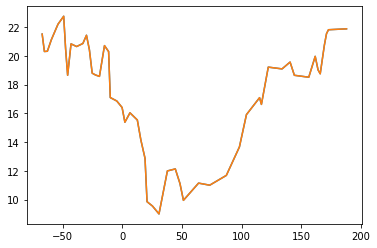

In [44]:
#PPG RR IR

plotty = 0

Atime, ECG, RRled, IRled, Temp = ReadData("06_16_Pig2.txt", format = "06_16")
sampling_time, AC, filtered, peaks = PPG_Filter(Atime, IRled, "RR", N = 50, RR_freq = 0.6, RR_prom = (5, 100))
rawX, rawY, filX, filY, pksX, pksY = PPG_Plot_Signal(AC, Atime, filtered, peaks, TFent_06_16_P2, TNalo_06_16_P2, 
                                                     plot = plotty, yL = -100, yH = 100)

x, y = PPG_Plot_Values(Atime, peaks, "RR", TFent = TFent_06_16_P2, RR_window = 10, plot = 0)
x2, y2 = PPG_Plot_Values(Atime, peaks, "RR", zeros = True, TFent = TFent_06_16_P2, RR_window = 10, plot = 0)

#print(list(x))
#print(list(y))

#ADD CODE: IF MORE THAN 12 SECONDS WITHOUT PEAK, SET TO 0

plt.plot(x, y)
plt.plot(x2, y2)

print(list(x2))
print(list(y2))

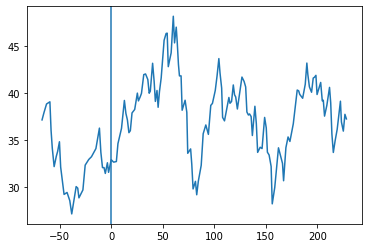

In [45]:
#PPG RR RED

plotty = False

Atime, ECG, RRled, IRled, Temp = ReadData("06_16_Pig2.txt", format = "06_16")
sampling_time, AC, filtered, peaks = PPG_Filter(Atime, RRled, "RR", N = 50, RR_freq = 0.6, RR_prom = (1, 1000))
rawX, rawY, filX, filY, pksX, pksY = PPG_Plot_Signal(AC, Atime, filtered, peaks, TFent_06_16_P2, TNalo_06_16_P2, 
                                                     plot = plotty, yL = -50, yH = 50)
x, y = PPG_Plot_Values(Atime, peaks, "RR", TFent = TFent_06_16_P2, RR_window = 10, plot = not plotty)

#print(list(x))
#print(list(y))

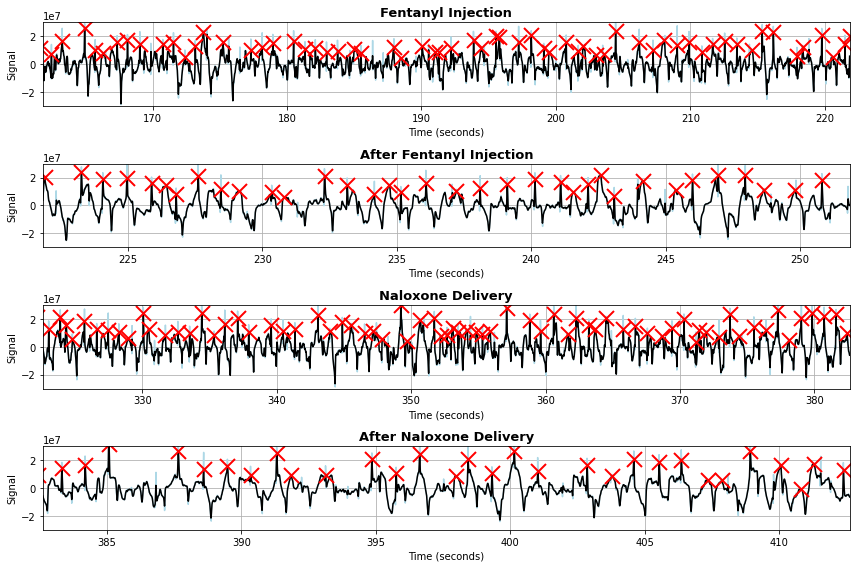

In [46]:
#ECG HR
Atime, ECG, RRled, IRled, Temp = ReadData("06_16_Pig2.txt", format = "06_16")
sampling_time, AC, filtered, peaks = PPG_Filter(Atime, ECG, "HR", N = 50, HR_freq = 20.0, HR_prom = (15000000, None))
rawX, rawY, filX, filY, pksX, pksY = PPG_Plot_Signal(AC, Atime, filtered, peaks, TFent_06_16_P2, TNalo_06_16_P2, 
                                                     plot = 1, yL = -30000000, yH = 30000000)
#x, y = PPG_Plot_Values(Atime, peaks, "HR", TFent = TFent_06_16_P1, HR_window = 50, plot = True)

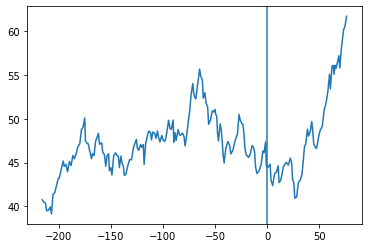

In [47]:
#ECG RR
Atime, ECG, RRled, IRled, Temp = ReadData("06_16_Pig2.txt", format = "06_16")
sampling_time, AC, filtered, peaks = PPG_Filter(Atime, ECG, "RR", N = 50, RR_freq = 0.9, RR_prom = (1000000, None))
rawX, rawY, filX, filY, pksX, pksY = PPG_Plot_Signal(AC, Atime, filtered, peaks, TFent_06_16_P2, TNalo_06_16_P2, 
                                                     plot = 0, yL = -30000000, yH = 30000000)
x, y = PPG_Plot_Values(Atime, peaks, "RR", TFent = TFent_06_16_P1, RR_window = 20, plot = True)

### PPG Covered/Uncovered

[29.354505300481364, 29.354505300481364, 29.354505300481364, 99.80531802163664, 41.58554917568193, 31.18916188176145, 99.80531802163664, 83.17109835136387, 31.18916188176145, 24.95132950540916, 29.354505300481364, 35.6447564362988, 29.354505300481364, 33.26843934054555, 41.58554917568193, 99.80531802163664, 41.58554917568193, 41.58554917568193, 124.7566475270458, 83.17109835136387, 45.36605364619847, 38.38666077755256, 55.44739890090924, 62.3783237635229, 71.2895128725976, 83.17109835136387, 35.6447564362988, 83.17109835136387, 38.38666077755256, 124.7566475270458, 35.6447564362988, 29.354505300481364, 35.6447564362988, 124.7566475270458, 166.34219670272773, 45.36605364619847, 166.34219670272773, 124.7566475270458, 41.58554917568193, 99.80531802163664, 38.38666077755256, 26.264557374114904, 35.6447564362988, 99.80531802163664, 45.36605364619847, 83.17109835136387, 35.6447564362988, 27.72369945045462, 35.6447564362988, 99.80531802163664, 38.38666077755256, 124.7566475270458, 35.64475643

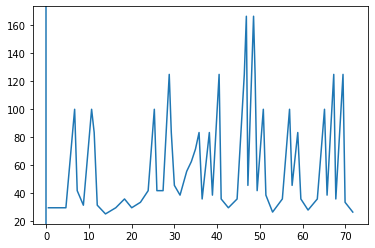

In [48]:
#COVERED HR RED

FENT = 0
NALO = 0

plotty = 0

Atime, RRled, IRled, GRled = ReadData("06_16_PPG_Covered.txt", format = "PPGx3")
sampling_time, AC, filtered, peaks = PPG_Filter(Atime, RRled, "HR", N = 50, 
                                                HR_freq = 2.0, HR_prom = (10, None))
rawX, rawY, filX, filY, pksX, pksY = PPG_Plot_Signal(AC, Atime, filtered, peaks, FENT, NALO, 
                                                     plot = plotty, yL = -1000, yH = 1000)
x, y = PPG_Plot_Values(Atime, peaks, "HR", TFent = FENT, HR_window = 1, plot = not plotty)

#print(list(x))
print(list(y))

[27.72369945045462, 29.354505300481364, 31.18916188176145, 45.36605364619847, 71.2895128725976, 45.36605364619847, 99.80531802163664, 55.44739890090924, 33.26843934054555, 23.763170957532534, 26.264557374114904, 29.354505300481364, 35.6447564362988, 83.17109835136387, 62.3783237635229, 45.36605364619847, 55.44739890090924, 71.2895128725976, 166.34219670272773, 41.58554917568193, 124.7566475270458, 71.2895128725976, 55.44739890090924, 35.6447564362988, 55.44739890090924, 41.58554917568193, 26.264557374114904, 27.72369945045462, 27.72369945045462, 71.2895128725976, 49.90265901081832, 38.38666077755256, 124.7566475270458, 49.90265901081832, 62.3783237635229, 29.354505300481364, 27.72369945045462, 71.2895128725976, 49.90265901081832, 55.44739890090924, 62.3783237635229, 29.354505300481364, 83.17109835136387, 45.36605364619847, 26.264557374114904, 83.17109835136387, 55.44739890090924, 27.72369945045462, 27.72369945045462, 27.72369945045462, 83.17109835136387, 45.36605364619847]


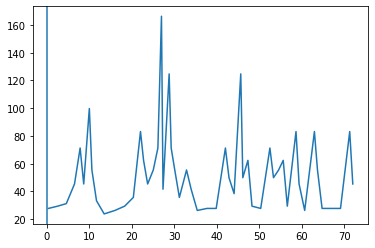

In [49]:
#COVERED HR IR

FENT = 0
NALO = 0

plotty = 0

Atime, RRled, IRled, GRled = ReadData("06_16_PPG_Covered.txt", format = "PPGx3")
sampling_time, AC, filtered, peaks = PPG_Filter(Atime, IRled, "HR", N = 50, 
                                                HR_freq = 2.0, HR_prom = (10, None))
rawX, rawY, filX, filY, pksX, pksY = PPG_Plot_Signal(AC, Atime, filtered, peaks, FENT, NALO, 
                                                     plot = plotty, yL = -1000, yH = 1000)
x, y = PPG_Plot_Values(Atime, peaks, "HR", TFent = FENT, HR_window = 1, plot = not plotty)

#print(list(x))
print(list(y))


[99.80531802163664, 83.17109835136387, 83.17109835136387, 83.17109835136387, 71.2895128725976, 99.80531802163664, 38.38666077755256, 15.594580940880725, 38.38666077755256, 18.48246630030308, 62.3783237635229, 38.38666077755256, 62.3783237635229, 124.7566475270458, 71.2895128725976, 38.38666077755256, 83.17109835136387, 71.2895128725976, 27.72369945045462, 29.354505300481364, 33.26843934054555, 45.36605364619847, 62.3783237635229, 35.6447564362988, 23.763170957532534, 83.17109835136387, 38.38666077755256, 83.17109835136387, 41.58554917568193, 71.2895128725976, 55.44739890090924, 49.90265901081832, 71.2895128725976, 45.36605364619847, 71.2895128725976, 41.58554917568193, 83.17109835136387, 83.17109835136387, 49.90265901081832, 62.3783237635229, 49.90265901081832, 55.44739890090924, 62.3783237635229, 45.36605364619847, 83.17109835136387, 83.17109835136387, 45.36605364619847, 62.3783237635229, 62.3783237635229, 49.90265901081832, 62.3783237635229, 29.354505300481364, 83.17109835136387, 41.

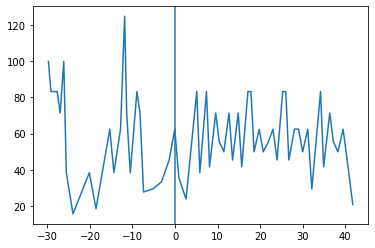

In [50]:
#COVERED HR GR

FENT = 30
NALO = 0

plotty = 0

Atime, RRled, IRled, GRled = ReadData("06_16_PPG_Covered.txt", format = "PPGx3")
sampling_time, AC, filtered, peaks = PPG_Filter(Atime, GRled, "HR", N = 50, 
                                                HR_freq = 1.5, HR_prom = (0, 100))
rawX, rawY, filX, filY, pksX, pksY = PPG_Plot_Signal(AC, Atime, filtered, peaks, FENT, NALO, 
                                                     plot = plotty, yL = -100, yH = 100)
x, y = PPG_Plot_Values(Atime, peaks, "HR", TFent = FENT, HR_window = 1, plot = not plotty)

#print(list(x))
print(list(y))

[29.354505300481364, 27.72369945045462, 16.097631938973652, 20.792774587840967, 23.763170957532534, 26.264557374114904, 29.354505300481364, 15.122017882066158, 18.48246630030308, 16.097631938973652, 27.72369945045462, 22.683026823099237, 27.72369945045462, 26.264557374114904, 27.72369945045462, 27.72369945045462, 29.354505300481364, 29.354505300481364, 31.18916188176145, 26.264557374114904, 29.354505300481364, 27.72369945045462, 31.18916188176145, 29.354505300481364, 29.354505300481364, 29.354505300481364, 27.72369945045462, 29.354505300481364, 29.354505300481364, 27.72369945045462, 29.354505300481364]


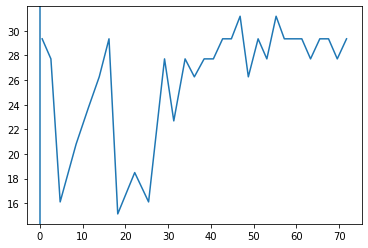

In [51]:
#COVERED RR RED

FENT = 0
NALO = 0

plotty = 0

Atime, RRled, IRled, GRled = ReadData("06_16_PPG_Covered.txt", format = "PPGx3")
sampling_time, AC, filtered, peaks = PPG_Filter(Atime, RRled, "RR", N = 50, 
                                                RR_freq = 0.6, RR_prom = (10, None))
rawX, rawY, filX, filY, pksX, pksY = PPG_Plot_Signal(AC, Atime, filtered, peaks, FENT, NALO, 
                                                     plot = plotty, yL = -2000, yH = 2000)
x, y = PPG_Plot_Values(Atime, peaks, "RR", TFent = FENT, RR_window = 1, plot = not plotty)

#print(list(x))
print(list(y))

[29.354505300481364, 27.72369945045462, 33.26843934054555, 31.18916188176145, 17.8223782181494, 13.86184972522731, 27.72369945045462, 29.354505300481364, 27.72369945045462, 6.8359806864134685, 23.763170957532534, 35.6447564362988, 27.72369945045462, 27.72369945045462, 29.354505300481364, 27.72369945045462, 29.354505300481364, 29.354505300481364, 26.264557374114904, 27.72369945045462, 27.72369945045462, 29.354505300481364, 31.18916188176145, 27.72369945045462, 29.354505300481364, 27.72369945045462, 29.354505300481364, 29.354505300481364, 27.72369945045462, 29.354505300481364]


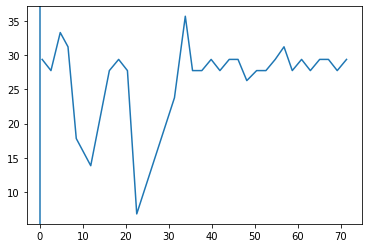

In [52]:
#COVERED RR IR

FENT = 0
NALO = 0

plotty = 0

Atime, RRled, IRled, GRled = ReadData("06_16_PPG_Covered.txt", format = "PPGx3")
sampling_time, AC, filtered, peaks = PPG_Filter(Atime, IRled, "RR", N = 50, 
                                                RR_freq = 0.6, RR_prom = (10, None))
rawX, rawY, filX, filY, pksX, pksY = PPG_Plot_Signal(AC, Atime, filtered, peaks, FENT, NALO, 
                                                     plot = plotty, yL = -2000, yH = 2000)
x, y = PPG_Plot_Values(Atime, peaks, "RR", TFent = FENT, RR_window = 1, plot = not plotty)

#print(list(x))
print(list(y))

[31.18916188176145, 29.354505300481364, 14.677252650240682, 15.122017882066158, 24.95132950540916, 10.1842161246568, 7.4481580613161675, 45.36605364619847, 16.634219670272774, 16.097631938973652, 29.354505300481364, 27.72369945045462, 29.354505300481364, 27.72369945045462, 29.354505300481364, 31.18916188176145, 27.72369945045462, 29.354505300481364, 27.72369945045462, 29.354505300481364, 31.18916188176145, 29.354505300481364, 27.72369945045462, 29.354505300481364, 29.354505300481364, 27.72369945045462, 29.354505300481364, 29.354505300481364]


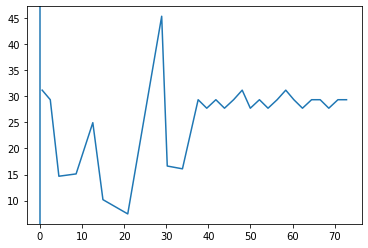

In [53]:
#COVERED RR GR

FENT = 0
NALO = 0

plotty = 0

Atime, RRled, IRled, GRled = ReadData("06_16_PPG_Covered.txt", format = "PPGx3")
sampling_time, AC, filtered, peaks = PPG_Filter(Atime, GRled, "RR", N = 50, 
                                                RR_freq = 0.6, RR_prom = (10, None))
rawX, rawY, filX, filY, pksX, pksY = PPG_Plot_Signal(AC, Atime, filtered, peaks, FENT, NALO, 
                                                     plot = plotty, yL = -300, yH = 300)
x, y = PPG_Plot_Values(Atime, peaks, "RR", TFent = FENT, RR_window = 1, plot = not plotty)

#print(list(x))
print(list(y))

[71.25727989037347, 71.25727989037347, 45.34554174841948, 71.25727989037347, 83.13349320543571, 83.13349320543571, 83.13349320543571, 71.25727989037347, 41.566746602717856, 83.13349320543571, 62.350119904076784, 41.566746602717856, 83.13349320543571, 83.13349320543571, 45.34554174841948, 71.25727989037347, 83.13349320543571, 83.13349320543571, 71.25727989037347, 71.25727989037347, 99.76019184652286, 83.13349320543571, 71.25727989037347, 83.13349320543571, 83.13349320543571, 83.13349320543571, 83.13349320543571, 71.25727989037347, 99.76019184652286, 71.25727989037347, 62.350119904076784, 45.34554174841948, 83.13349320543571, 83.13349320543571, 41.566746602717856, 71.25727989037347, 45.34554174841948, 62.350119904076784, 62.350119904076784, 49.88009592326143, 71.25727989037347, 83.13349320543571, 83.13349320543571, 83.13349320543571, 83.13349320543571, 41.566746602717856, 27.711164401811903, 62.350119904076784, 71.25727989037347, 83.13349320543571, 99.76019184652286, 71.25727989037347, 8

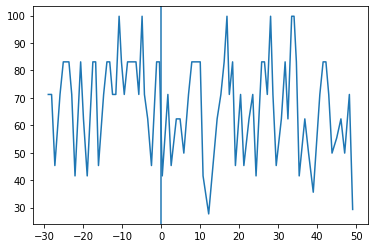

In [54]:
#UNCOVERED HR RED

FENT = 30
NALO = 0

plotty = 0

Atime, RRled, IRled, GRled = ReadData("06_16_PPG_Uncovered.txt", format = "PPGx3")
sampling_time, AC, filtered, peaks = PPG_Filter(Atime, RRled, "HR", N = 50, 
                                                HR_freq = 1.5, HR_prom = (1, None))
rawX, rawY, filX, filY, pksX, pksY = PPG_Plot_Signal(AC, Atime, filtered, peaks, FENT, NALO, 
                                                     plot = plotty, yL = -40, yH = 40)
x, y = PPG_Plot_Values(Atime, peaks, "HR", TFent = FENT, HR_window = 1, plot = not plotty)

#print(list(x))
print(list(y))

[45.34554174841948, 99.76019184652286, 71.25727989037347, 83.13349320543571, 83.13349320543571, 83.13349320543571, 71.25727989037347, 38.36930455635495, 83.13349320543571, 83.13349320543571, 71.25727989037347, 99.76019184652286, 71.25727989037347, 83.13349320543571, 99.76019184652286, 71.25727989037347, 83.13349320543571, 62.350119904076784, 124.70023980815357, 71.25727989037347, 71.25727989037347, 83.13349320543571, 99.76019184652286, 71.25727989037347, 83.13349320543571, 83.13349320543571, 83.13349320543571, 71.25727989037347, 71.25727989037347, 99.76019184652286, 71.25727989037347, 83.13349320543571, 83.13349320543571, 99.76019184652286, 62.350119904076784, 99.76019184652286, 71.25727989037347, 83.13349320543571, 83.13349320543571, 71.25727989037347, 83.13349320543571, 83.13349320543571, 83.13349320543571, 71.25727989037347, 99.76019184652286, 71.25727989037347, 83.13349320543571, 41.566746602717856, 83.13349320543571, 71.25727989037347, 83.13349320543571, 83.13349320543571, 71.2572

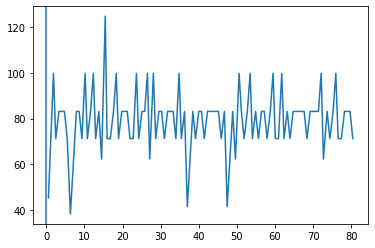

In [55]:
#UNCOVERED HR IR

FENT = 0
NALO = 0

plotty = 0

Atime, RRled, IRled, GRled = ReadData("06_16_PPG_Uncovered.txt", format = "PPGx3")
sampling_time, AC, filtered, peaks = PPG_Filter(Atime, IRled, "HR", N = 50, 
                                                HR_freq = 1.5, HR_prom = (1, None))
rawX, rawY, filX, filY, pksX, pksY = PPG_Plot_Signal(AC, Atime, filtered, peaks, FENT, NALO, 
                                                     plot = plotty, yL = -30, yH = 30)
x, y = PPG_Plot_Values(Atime, peaks, "HR", TFent = FENT, HR_window = 1, plot = not plotty)

#print(list(x))
print(list(y))

[71.25727989037347, 83.13349320543571, 83.13349320543571, 83.13349320543571, 71.25727989037347, 83.13349320543571, 83.13349320543571, 71.25727989037347, 99.76019184652286, 71.25727989037347, 83.13349320543571, 83.13349320543571, 83.13349320543571, 83.13349320543571, 71.25727989037347, 83.13349320543571, 83.13349320543571, 83.13349320543571, 71.25727989037347, 83.13349320543571, 83.13349320543571, 83.13349320543571, 83.13349320543571, 83.13349320543571, 71.25727989037347, 83.13349320543571, 83.13349320543571, 71.25727989037347, 83.13349320543571, 83.13349320543571, 83.13349320543571, 83.13349320543571, 71.25727989037347, 83.13349320543571, 83.13349320543571, 83.13349320543571, 83.13349320543571, 71.25727989037347, 83.13349320543571, 83.13349320543571, 71.25727989037347, 83.13349320543571, 83.13349320543571, 83.13349320543571, 83.13349320543571, 71.25727989037347, 83.13349320543571, 83.13349320543571, 83.13349320543571, 83.13349320543571, 71.25727989037347, 83.13349320543571, 83.13349320

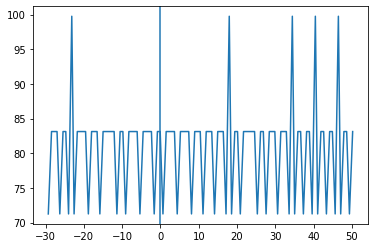

In [56]:
#UNCOVERED HR GR

FENT = 30
NALO = 0

plotty = 0

Atime, RRled, IRled, GRled = ReadData("06_16_PPG_Uncovered.txt", format = "PPGx3")
sampling_time, AC, filtered, peaks = PPG_Filter(Atime, GRled, "HR", N = 50, 
                                                HR_freq = 1.5, HR_prom = (5, 1000))
rawX, rawY, filX, filY, pksX, pksY = PPG_Plot_Signal(AC, Atime, filtered, peaks, FENT, NALO, 
                                                     plot = plotty, yL = -20, yH = 20)
x, y = PPG_Plot_Values(Atime, peaks, "HR", TFent = FENT, HR_window = 1, plot = not plotty)

#print(list(x))
print(list(y))

[29.341232896036132, 24.940047961630714, 31.175059952038392, 31.175059952038392, 29.341232896036132, 27.711164401811903, 71.25727989037347, 45.34554174841948, 27.711164401811903, 35.628639945186734, 26.252682064874435, 29.341232896036132, 29.341232896036132, 31.175059952038392, 27.711164401811903, 29.341232896036132, 29.341232896036132, 31.175059952038392, 27.711164401811903, 29.341232896036132, 27.711164401811903, 29.341232896036132, 29.341232896036132, 27.711164401811903, 29.341232896036132, 31.175059952038392, 29.341232896036132, 31.175059952038392, 26.252682064874435, 31.175059952038392, 29.341232896036132, 27.711164401811903, 29.341232896036132, 31.175059952038392, 26.252682064874435, 31.175059952038392, 27.711164401811903, 27.711164401811903, 33.253397282174284]


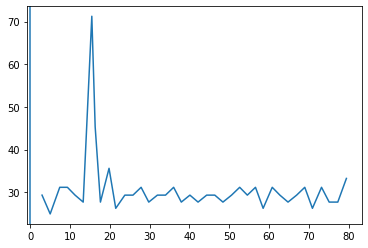

In [57]:
#UNCOVERED RR RED

FENT = 0
NALO = 0

plotty = 0

Atime, RRled, IRled, GRled = ReadData("06_16_PPG_Uncovered.txt", format = "PPGx3")
sampling_time, AC, filtered, peaks = PPG_Filter(Atime, RRled, "RR", N = 50, 
                                                RR_freq = 0.6, RR_prom = (0, 1500))
rawX, rawY, filX, filY, pksX, pksY = PPG_Plot_Signal(AC, Atime, filtered, peaks, FENT, NALO, 
                                                     plot = plotty, yL = -20, yH = 20)
x, y = PPG_Plot_Values(Atime, peaks, "RR", TFent = FENT, RR_window = 1, plot = not plotty)

#print(list(x))
print(list(y))

[13.126341032437217, 99.76019184652286, 38.36930455635495, 38.36930455635495, 29.341232896036132, 41.566746602717856, 23.75242663012449, 29.341232896036132, 26.252682064874435, 27.711164401811903, 35.628639945186734, 27.711164401811903, 24.940047961630714, 29.341232896036132, 33.253397282174284, 49.88009592326143, 22.67277087420974, 22.67277087420974, 62.350119904076784, 99.76019184652286, 99.76019184652286, 38.36930455635495, 27.711164401811903, 38.36930455635495, 35.628639945186734, 49.88009592326143, 38.36930455635495, 29.341232896036132, 24.940047961630714, 55.422328803623806, 124.70023980815357, 26.252682064874435, 35.628639945186734, 29.341232896036132, 83.13349320543571, 71.25727989037347, 83.13349320543571, 38.36930455635495, 27.711164401811903, 49.88009592326143, 33.253397282174284, 62.350119904076784, 21.68699822750497, 38.36930455635495, 41.566746602717856]


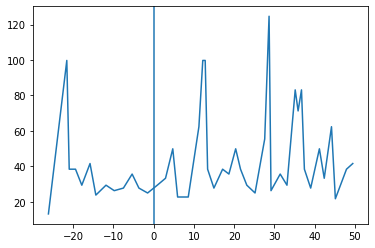

In [58]:
#UNCOVERED RR IR

FENT = 30
NALO = 0

plotty = 0

Atime, RRled, IRled, GRled = ReadData("06_16_PPG_Uncovered.txt", format = "PPGx3")
sampling_time, AC, filtered, peaks = PPG_Filter(Atime, IRled, "RR", N = 50, 
                                                RR_freq = 0.6, RR_prom = (0, None))
rawX, rawY, filX, filY, pksX, pksY = PPG_Plot_Signal(AC, Atime, filtered, peaks, FENT, NALO, 
                                                     plot = plotty, yL = -25, yH = 25)
x, y = PPG_Plot_Values(Atime, peaks, "RR", TFent = FENT, RR_window = 1, plot = not plotty)

#print(list(x))
#print(list(y))

print(list(y))

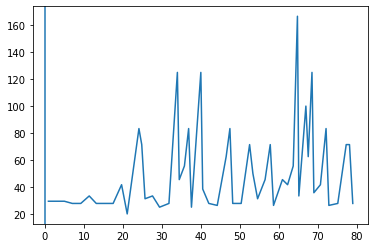

In [59]:
#UNCOVERED RR GR

FENT = 0
NALO = 0

plotty = 0

Atime, RRled, IRled, GRled = ReadData("06_16_PPG_Uncovered.txt", format = "PPGx3")
sampling_time, AC, filtered, peaks = PPG_Filter(Atime, GRled, "RR", N = 50, 
                                                RR_freq = 0.6, RR_prom = (0, 1000))
rawX, rawY, filX, filY, pksX, pksY = PPG_Plot_Signal(AC, Atime, filtered, peaks, FENT, NALO, 
                                                     plot = plotty, yL = -20, yH = 20)
x, y = PPG_Plot_Values(Atime, peaks, "RR", TFent = FENT, RR_window = 1, plot = not plotty)

#print(list(x))
#print(list(y))

# August 4, 2022 Terminal

### Pig 1 (Implant - Ali, Terminal)

[90.00938240502524, 90.02448625079353, 90.03959009656182, 90.05469394233012, 90.06979778809853, 90.08490163386682, 90.10000547963512, 90.11510932540341, 90.1302131711717, 90.14531701694011, 90.1604208627084, 90.1755247084767, 90.190628554245, 90.20573240001329, 90.2208362457817, 90.23594009154999, 90.25104393731829, 90.26614778308658, 90.28125162885499, 90.29635547462328, 90.31145932039158, 90.32656316615987, 90.34166701192817, 90.35677085769657, 90.37187470346487, 90.38697854923316, 90.40208239500146, 90.41718624076975, 90.43229008653816, 90.44739393230645, 90.46249777807475, 90.47760162384304, 90.49270546961134, 90.50780931537975, 90.52291316114804, 90.53801700691633, 90.55312085268463, 90.56822469845304, 90.58332854422133, 90.59843238998963, 90.61353623575792, 90.62864008152621, 90.64374392729462, 90.65884777306292, 90.67395161883121, 90.6890554645995, 90.7041593103678, 90.71926315613621, 90.7343670019045, 90.7494708476728, 90.76457469344109, 90.77967853920939, 90.7947823849778, 90.

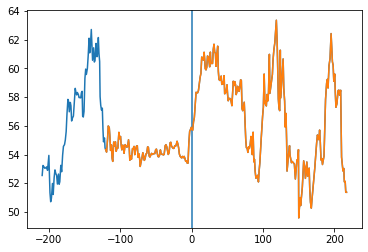

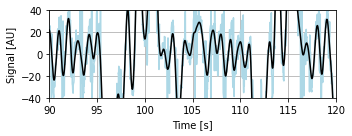

In [60]:
TFent_08_04_P1 = 249.594
TNalo_08_04_P1 = 405.923

plotty = 0

#PPG HR RED
Atime, ECG, RRled, IRled, Ximu, Yimu, Zimu = ReadData("08_04_Pig1_AI.txt", format = "08_04")
sampling_time, AC, filtered, peaks = PPG_Filter(Atime, RRled, "HR", N = 50, HR_freq = 1.4, HR_prom = (2, None))
rawX, rawY, filX, filY, pksX, pksY = PPG_Plot_Signal(AC, Atime, filtered, peaks, TFent_08_04_P1, TNalo_08_04_P1, 
                                                     plot = plotty, yL = -400, yH = 400)
x, y = PPG_Plot_Values(Atime, peaks, "HR", TFent = TFent_08_04_P1, HR_window = 20, RR_window = 20, plot = not plotty)

plt.plot(x[80:], y[80:])

#print(list(x[80:]))
#print(list(y[80:]))

Hx2, Hy2 = PPG_Plot_Custom_Signal(AC, Atime, filtered, peaks, yL = -40, yH = 40, peaksss = False,
                           LEFT = 90, RIGHT = 120, x_offset = TFent_06_16_P1, dims = (5, 2))
print(Hx2)

[43.72526932553612, 44.1523966912857, 44.289178277608606, 44.12760468518725, 43.661331575785105, 42.88529055588768, 41.79440690157552, 40.3822396393796, 38.641011432491084, 36.56293625940252, 34.14179714645128, 31.3748227690533, 28.264984852278605, 24.8229517346987, 21.06844846998413, 17.029994231643748, 12.741711740175365, 8.241565477105523, 3.5751107919329312, -1.2003654254483194, -6.0153513972758486, -10.789903405223077, -15.439211792056707, -19.88222334728225, -24.04722454154532, -27.87268709418793, -31.30679886097746, -34.307739002064295, -36.84450833391613, -38.89748316692744, -40.45848717103621, -41.53081092184549, -42.12865121789868, -42.27446165954411, -41.99495601065838, -41.3187820751606, -40.276505299252754, -38.90095695061261, -37.22673134389458, -35.28923248577142, -33.124300011620065, -30.768140884014684, -28.256009278533018, -25.619857407787165, -22.887030083748186, -20.080555019644198, -17.22002944602068, -14.322587547068114, -11.403859757983541, -8.478759732233243, -5

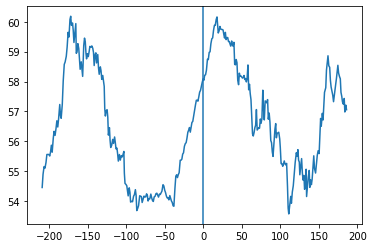

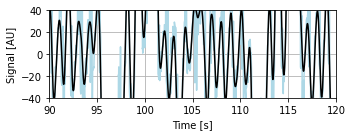

In [61]:
plotty = 0

#PPG HR IR
Atime, ECG, RRled, IRled, Ximu, Yimu, Zimu = ReadData("08_04_Pig1_AI.txt", format = "08_04")
sampling_time, AC, filtered, peaks = PPG_Filter(Atime, IRled, "HR", N = 50, HR_freq = 1.4, HR_prom = (1, None))
rawX, rawY, filX, filY, pksX, pksY = PPG_Plot_Signal(AC, Atime, filtered, peaks, TFent_08_04_P1, TNalo_08_04_P1, 
                                                     plot = plotty, yL = -400, yH = 400)
x, y = PPG_Plot_Values(Atime, peaks, "HR", TFent = TFent_08_04_P1, HR_window = 50, RR_window = 20, plot = not plotty)

#print(list(x[80:]))
#print(list(y[80:]))

Hx2, Hy2 = PPG_Plot_Custom_Signal(AC, Atime, filtered, peaks, yL = -40, yH = 40, peaksss = False,
                           LEFT = 90, RIGHT = 120, x_offset = TFent_06_16_P1, dims = (5, 2))
print(Hy2)

[90.00938240502524, 90.02448625079353, 90.03959009656182, 90.05469394233012, 90.06979778809853, 90.08490163386682, 90.10000547963512, 90.11510932540341, 90.1302131711717, 90.14531701694011, 90.1604208627084, 90.1755247084767, 90.190628554245, 90.20573240001329, 90.2208362457817, 90.23594009154999, 90.25104393731829, 90.26614778308658, 90.28125162885499, 90.29635547462328, 90.31145932039158, 90.32656316615987, 90.34166701192817, 90.35677085769657, 90.37187470346487, 90.38697854923316, 90.40208239500146, 90.41718624076975, 90.43229008653816, 90.44739393230645, 90.46249777807475, 90.47760162384304, 90.49270546961134, 90.50780931537975, 90.52291316114804, 90.53801700691633, 90.55312085268463, 90.56822469845304, 90.58332854422133, 90.59843238998963, 90.61353623575792, 90.62864008152621, 90.64374392729462, 90.65884777306292, 90.67395161883121, 90.6890554645995, 90.7041593103678, 90.71926315613621, 90.7343670019045, 90.7494708476728, 90.76457469344109, 90.77967853920939, 90.7947823849778, 90.

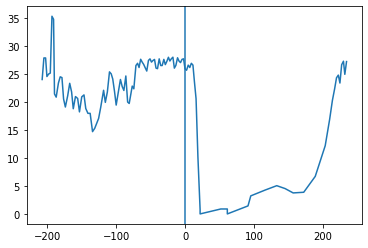

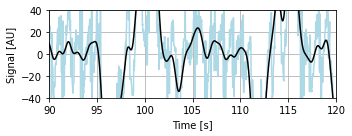

In [62]:
#PPG RR RED

plotty = 0

Atime, ECG, RRled, IRled, Ximu, Yimu, Zimu = ReadData("08_04_Pig1_AI.txt", format = "08_04")
sampling_time, AC, filtered, peaks = PPG_Filter(Atime, RRled, "RR", N = 50, RR_freq = 0.6, RR_prom = (100, None))
rawX, rawY, filX, filY, pksX, pksY = PPG_Plot_Signal(AC, Atime, filtered, peaks, TFent_08_04_P1, TNalo_08_04_P1, 
                                                     plot = plotty, yL = -400, yH = 400)
x, y = PPG_Plot_Values(Atime, peaks, "RR", 
                       zeros = True, timestep = 30, 
                       TFent = TFent_08_04_P1, RR_window = 2, plot = not plotty)

Hx2, Hy2 = PPG_Plot_Custom_Signal(AC, Atime, filtered, peaks, yL = -40, yH = 40, peaksss = False,
                           LEFT = 90, RIGHT = 120, x_offset = TFent_06_16_P1, dims = (5, 2))
print(Hx2)

[16.971666752753315, 16.432355140018764, 15.855002123045896, 15.23954513704421, 14.586275367623243, 13.895829427664513, 13.1691482430493, 12.40743046136423, 11.612129582586508, 10.784991642219605, 9.928098178992437, 9.043916033833726, 8.135357996195884, 7.205828581926493, 6.25924657223623, 5.300009840965608, 4.332858810838, 3.362785053648218, 2.3951223903945364, 1.4356489775466015, 0.49056521930145963, -0.43360625320918184, -1.3302477959859023, -2.192976352961993, -3.015870008403267, -3.793533706128778, -4.521118373185751, -5.194361983740386, -5.809645721363625, -6.364036924504868, -6.855311631529757, -7.28197097540637, -7.643233641005545, -7.938953784704707, -8.169489456779019, -8.335623063592157, -8.438555596444093, -8.479909612407164, -8.461700466859721, -8.38628956605868, -8.25635455548942, -8.074867606202247, -7.845029852715565, -7.570169804419454, -7.253675649652228, -6.898980280441157, -6.509565736174077, -6.0889699694739114, -5.640793122130375, -5.168697946504926, -4.6764008882

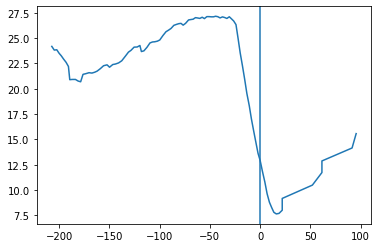

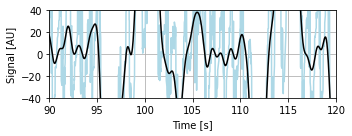

In [63]:
#PPG RR IR

plotty = 0

Atime, ECG, RRled, IRled, Ximu, Yimu, Zimu = ReadData("08_04_Pig1_AI.txt", format = "08_04")
sampling_time, AC, filtered, peaks = PPG_Filter(Atime, IRled, "RR", N = 50, RR_freq = 0.6, RR_prom = (100, None))
rawX, rawY, filX, filY, pksX, pksY = PPG_Plot_Signal(AC, Atime, filtered, peaks, TFent_08_04_P1, TNalo_08_04_P1, 
                                                     plot = plotty, yL = -400, yH = 400)
x, y = PPG_Plot_Values(Atime, peaks, "HR", TFent = TFent_08_04_P1, 
                       zeros = True, timestep = 30, HR_window = 20, RR_window = 2, plot = not plotty)

Hx2, Hy2 = PPG_Plot_Custom_Signal(AC, Atime, filtered, peaks, yL = -40, yH = 40, peaksss = False,
                           LEFT = 90, RIGHT = 120, x_offset = TFent_06_16_P1, dims = (5, 2))
print(Hy2)

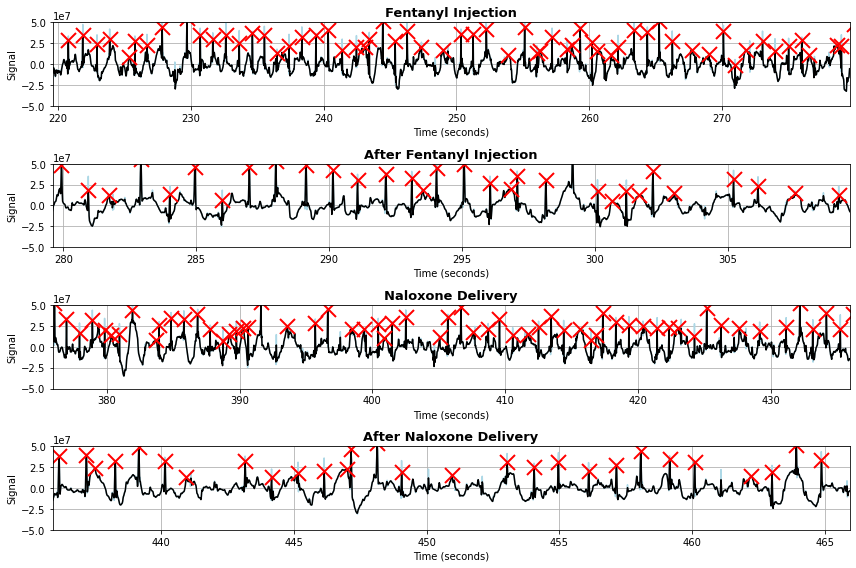

In [64]:
plotty = 1

#ECG HR
Atime, ECG, RRled, IRled, Ximu, Yimu, Zimu = ReadData("08_04_Pig1_AI.txt", format = "08_04")
sampling_time, AC, filtered, peaks = PPG_Filter(Atime, ECG, "HR", N = 50, HR_freq = 20.0, HR_prom = (20000000, None))
rawX, rawY, filX, filY, pksX, pksY = PPG_Plot_Signal(AC, Atime, filtered, peaks, TFent_08_04_P1, TNalo_08_04_P1, 
                                                     plot = plotty, yL = -50000000, yH = 50000000)
x, y = PPG_Plot_Values(Atime, peaks, "HR", TFent = TFent_08_04_P1, HR_window = 20, RR_window = 20, plot = not plotty)

#NOT GOOD

[25.94548195084862, 25.680748013305617, 25.743603997349027, 30.04284446438769, 29.51705445149262, 27.98627578996843, 27.52942065203708, 27.06703180390162, 22.7345068945375, 22.937644357762032, 22.531508281253654, 22.08686930841518, 22.060777366270393, 23.843665755182023, 21.892877254125626, 22.41137097623356, 20.35842753852379, 17.954181321214687, 14.455358506494335, 15.33999075646546, 14.736614594367273, 15.859536276139997, 18.985371568923462, 20.479820631603502, 20.517266119446496, 20.095940553676705, 21.865383711425515, 20.479404694508307, 19.39479573907733, 20.305330146777624, 23.132065288961776, 22.87081221096475, 23.992057290338956, 23.919987294120816, 22.95355469423182, 22.430538051718894, 22.2712132579404, 21.34871730634824, 22.358560367129325, 23.835514822959688, 24.08448507401892, 25.012060928208772, 24.582197562386586, 25.753816476685834, 25.391932583460317, 25.42946208928501, 25.466991595109704, 27.796179332443064, 26.863930625143773, 27.054954381098593, 27.054954381098593,

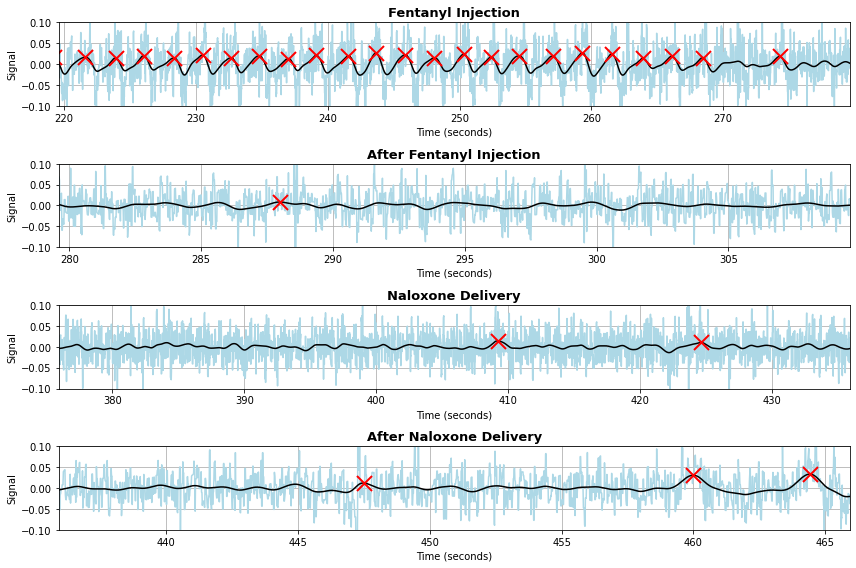

In [86]:
plotty = 1

#IMU RR 
Atime, ECG, RRled, IRled, Ximu, Yimu, Zimu = ReadData("08_04_Pig1_AI.txt", format = "08_04")
sampling_time, AC, filtered, peaks = PPG_Filter(Atime, Yimu, "RR", N = 50, RR_prom = (0.02, None))
rawX, rawY, filX, filY, pksX, pksY = PPG_Plot_Signal(AC, Atime, filtered, peaks, TFent_08_04_P1, TNalo_08_04_P1, 
                                                     plot = plotty, yL = -0.1, yH = 0.1)
x, y = PPG_Plot_Values(Atime, peaks, "RR", zeros = True, timestep = 10, TFent = TFent_08_04_P1,
                       RR_window = 5, plot = not plotty)

#print(list(x))
print(list(y))

### Pig 2 (Implant - Ali, Terminal)

[-39.99979741321238, -39.98450343557738, -39.96920945794227, -39.95391548030716, -39.93862150267205, -39.92332752503705, -39.908033547402056, -39.892739569766945, -39.877445592131835, -39.862151614496725, -39.84685763686173, -39.83156365922673, -39.81626968159162, -39.80097570395651, -39.7856817263214, -39.7703877486864, -39.755093771051406, -39.739799793416296, -39.724505815781185, -39.709211838146075, -39.69391786051108, -39.67862388287608, -39.66332990524097, -39.64803592760586, -39.63274194997075, -39.61744797233575, -39.60215399470076, -39.586860017065646, -39.571566039430536, -39.556272061795426, -39.54097808416043, -39.52568410652532, -39.51039012889032, -39.49509615125521, -39.4798021736201, -39.464508195985104, -39.449214218349994, -39.433920240715, -39.41862626307989, -39.403332285444776, -39.38803830780978, -39.37274433017467, -39.35745035253967, -39.34215637490456, -39.32686239726945, -39.311568419634455, -39.296274441999344, -39.28098046436435, -39.26568648672924, -39.2503

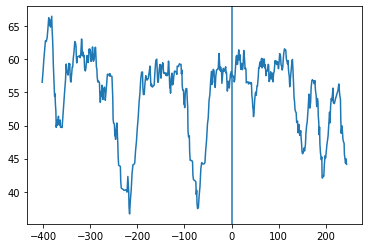

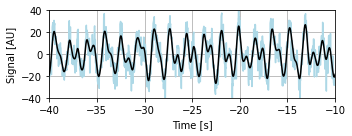

In [66]:
TFent_08_04_P2 = 631.751
TNalo_08_04_P2 = 763.197

plotty = 0

#PPG HR RED
Atime, ECG, RRled, IRled, Ximu, Yimu, Zimu = ReadData("08_04_Pig2_AI.txt", format = "08_04")
sampling_time, AC, filtered, peaks = PPG_Filter(Atime, RRled, "HR", N = 50, HR_freq = 1.4, HR_prom = (5, 100))
rawX, rawY, filX, filY, pksX, pksY = PPG_Plot_Signal(AC, Atime, filtered, peaks, TFent_08_04_P2, TNalo_08_04_P2, 
                                                     plot = plotty, yL = -100, yH = 100)
x, y = PPG_Plot_Values(Atime, peaks, "HR", TFent = TFent_08_04_P2, HR_window = 20, RR_window = 20, plot = not plotty)

Hx2, Hy2 = PPG_Plot_Custom_Signal(AC, Atime, filtered, peaks, yL = -40, yH = 40, peaksss = False,
                           LEFT = -40, RIGHT = -10, x_offset = TFent_08_04_P2, dims = (5, 2))
print(Hx2)

[-8.419964717165328, -6.600179626459135, -4.767886200131016, -2.933590087367662, -1.1085794202695562, 0.6949166202870848, 2.463511074371983, 4.183088677689054, 5.83974994093222, 7.420298436488092, 8.912019152200905, 10.302216557683481, 11.577829726434429, 12.725306720525573, 13.73076480778069, 14.580288120210897, 15.260204562202237, 15.757419834759913, 16.060301591140153, 16.16005816169906, 16.05173265993078, 15.734551147614603, 15.212084928079008, 14.492458707989671, 13.588610831399773, 12.518613988114822, 11.305769486581346, 9.977814542037871, 8.565356142805253, 7.10074855490069, 5.617467590577839, 4.148364502812324, 2.7228608514087864, 1.3651905409779372, 0.09440134898199679, -1.0746813260230477, -2.1302179339070832, -3.0624145000571485, -3.8630058377792365, -4.524839711721104, -5.0415375564136, -5.4075822549162424, -5.618803757503261, -5.67275388090245, -5.56885625648351, -5.308549715522378, -4.895404268755199, -4.335105789187375, -3.6352682656751125, -2.805183832968359, -1.8557618

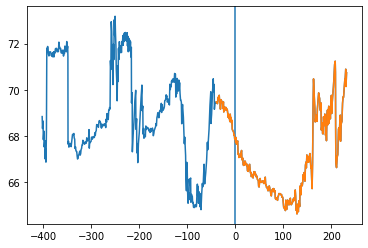

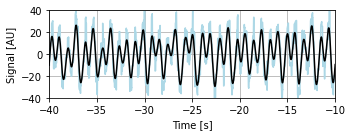

In [67]:
plotty = 0

#PPG HR IR
Atime, ECG, RRled, IRled, Ximu, Yimu, Zimu = ReadData("08_04_Pig2_AI.txt", format = "08_04")
sampling_time, AC, filtered, peaks = PPG_Filter(Atime, IRled, "HR", N = 50, HR_freq = 1.4, HR_prom = (0, 200))
rawX, rawY, filX, filY, pksX, pksY = PPG_Plot_Signal(AC, Atime, filtered, peaks, TFent_08_04_P2, TNalo_08_04_P2, 
                                                     plot = plotty, yL = -100, yH = 100,
                                                    offset = 40)
x, y = PPG_Plot_Values(Atime, peaks, "HR", TFent = TFent_08_04_P2, HR_window = 50, RR_window = 20, plot = not plotty)

plt.plot(x[390:], y[390:])

#print(list(x[390:]))
#print(list(y[390:]))

Hx2, Hy2 = PPG_Plot_Custom_Signal(AC, Atime, filtered, peaks, yL = -40, yH = 40, peaksss = False,
                           LEFT = -40, RIGHT = -10, x_offset = TFent_08_04_P2, dims = (5, 2))
print(Hy2)

[-4.244030782093909, -3.891280869342056, -3.5261921893363795, -3.15108510487023, -2.76832002886659, -2.3802866533814013, -1.9893953237201927, -1.598047021622976, -1.208586494655779, -0.8232712669004245, -0.4442651207701704, -0.07364043949330064, 0.2866211238855804, 0.6346356481359229, 0.9686323847655655, 1.2869725283597193, 1.5881658732837944, 1.8708878363877723, 2.134013263546111, 2.376665029265268, 2.5982478055438665, 2.7984581449799264, 2.9772862765649357, 3.135017389527245, 3.2722326542515296, 3.389810350502162, 3.488917609677415, 3.570970786810903, 3.6375685154144137, 3.6904385855877253, 3.7314007438719177, 3.7622914620230565, 3.7848530751013953, 3.8006583236458185, 3.8110945098483895, 3.8173807536530746, 3.820595404507016, 3.821694662938513, 3.821518264995142, 3.820793157835811, 3.820136069893883, 3.8200432818733554, 3.8208686428314493, 3.8228069603681933, 3.825886633278534, 3.8299642227303465, 3.834721666973819, 3.839669612315913, 3.8441582052935406, 3.8473915898549094, 3.848437

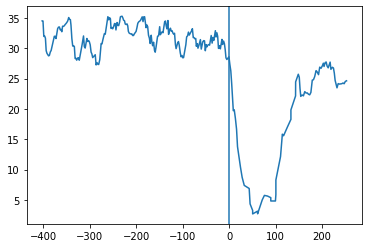

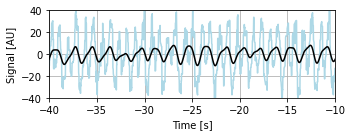

In [68]:
plotty = 0

#PPG RR IR
Atime, ECG, RRled, IRled, Ximu, Yimu, Zimu = ReadData("08_04_Pig2_AI.txt", format = "08_04")
sampling_time, AC, filtered, peaks = PPG_Filter(Atime, IRled, "RR", N = 50, RR_prom = (10, None))
rawX, rawY, filX, filY, pksX, pksY = PPG_Plot_Signal(AC, Atime, filtered, peaks, TFent_08_04_P2, TNalo_08_04_P2, 
                                                     plot = plotty, yL = -100, yH = 100,
                                                    offset = 40)
x, y = PPG_Plot_Values(Atime, peaks, "RR", 
                       zeros = True, timestep = 10, TFent = TFent_08_04_P2, RR_window = 10, plot = not plotty)

#print(list(x))
#print(list(y))

Hx2, Hy2 = PPG_Plot_Custom_Signal(AC, Atime, filtered, peaks, yL = -40, yH = 40, peaksss = False,
                           LEFT = -40, RIGHT = -10, x_offset = TFent_08_04_P2, dims = (5, 2))
print(Hy2)

[-39.99979741321238, -39.98450343557738, -39.96920945794227, -39.95391548030716, -39.93862150267205, -39.92332752503705, -39.908033547402056, -39.892739569766945, -39.877445592131835, -39.862151614496725, -39.84685763686173, -39.83156365922673, -39.81626968159162, -39.80097570395651, -39.7856817263214, -39.7703877486864, -39.755093771051406, -39.739799793416296, -39.724505815781185, -39.709211838146075, -39.69391786051108, -39.67862388287608, -39.66332990524097, -39.64803592760586, -39.63274194997075, -39.61744797233575, -39.60215399470076, -39.586860017065646, -39.571566039430536, -39.556272061795426, -39.54097808416043, -39.52568410652532, -39.51039012889032, -39.49509615125521, -39.4798021736201, -39.464508195985104, -39.449214218349994, -39.433920240715, -39.41862626307989, -39.403332285444776, -39.38803830780978, -39.37274433017467, -39.35745035253967, -39.34215637490456, -39.32686239726945, -39.311568419634455, -39.296274441999344, -39.28098046436435, -39.26568648672924, -39.2503

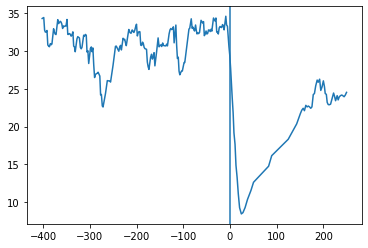

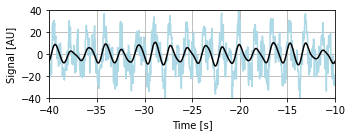

In [69]:
plotty = 0

#PPG RR RED
Atime, ECG, RRled, IRled, Ximu, Yimu, Zimu = ReadData("08_04_Pig2_AI.txt", format = "08_04")
sampling_time, AC, filtered, peaks = PPG_Filter(Atime, RRled, "RR", N = 50, HR_freq = 1.4, RR_prom = (10, None))
rawX, rawY, filX, filY, pksX, pksY = PPG_Plot_Signal(AC, Atime, filtered, peaks, TFent_08_04_P2, TNalo_08_04_P2, 
                                                     plot = plotty, yL = -100, yH = 100,
                                                    offset = 40)
x, y = PPG_Plot_Values(Atime, peaks, "RR", TFent = TFent_08_04_P2, HR_window = 50, RR_window = 10, plot = not plotty)

Hx2, Hy2 = PPG_Plot_Custom_Signal(AC, Atime, filtered, peaks, yL = -40, yH = 40, peaksss = False,
                           LEFT = -40, RIGHT = -10, x_offset = TFent_08_04_P2, dims = (5, 2))
print(Hx2)

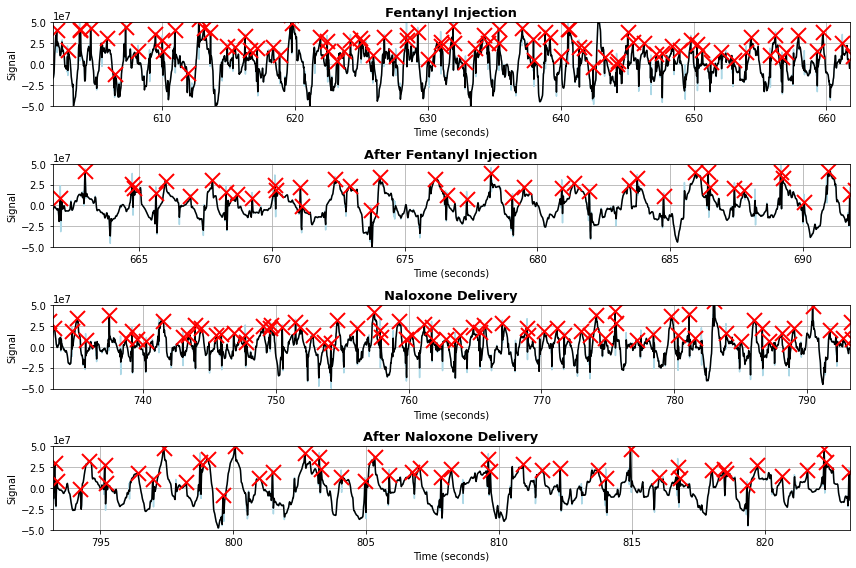

In [70]:
plotty = 1

#ECG HR
Atime, ECG, RRled, IRled, Ximu, Yimu, Zimu = ReadData("08_04_Pig2_AI.txt", format = "08_04")
sampling_time, AC, filtered, peaks = PPG_Filter(Atime, ECG, "HR", N = 50, HR_freq = 20.0, HR_prom = (20000000, None))
rawX, rawY, filX, filY, pksX, pksY = PPG_Plot_Signal(AC, Atime, filtered, peaks, TFent_08_04_P2, TNalo_08_04_P2, 
                                                     plot = plotty, yL = -50000000, yH = 50000000)
x, y = PPG_Plot_Values(Atime, peaks, "HR", TFent = TFent_08_04_P2, HR_window = 20, RR_window = 20, plot = not plotty)

#NOT GOOD

[-401.1227984236763, -399.50163679435934, -397.72753538869176, -396.3969593344411, -394.2099205326267, -392.5428769704046, -390.8146574976422, -389.0711440472448, -387.2970426415772, -385.3394135042888, -383.5194301657161, -381.71474080477833, -380.1088731530965, -378.33477174742893, -376.6983161404769, -374.9395087124444, -373.05834946333135, -371.31483601293394, -369.5101466519962, -367.598399447613, -366.00782577356625, -364.1419605020883, -362.3219771635155, -360.5937576907531, -358.9573020838011, -357.16790670049846, -355.3326293842906, -353.4820580904477, -351.6314867966048, -349.76562152512685, -347.94563818655405, -346.1868307585215, -344.3362594646786, -342.6845098800916, -340.6045289217227, -338.95277933713567, -337.13279599856287, -335.45045845870567, -333.59988716486276, -331.9634315579108, -330.20462412987825, -328.46111067948084, -326.5952454080028, -324.79055604706514, -323.0317486190326, -321.0741194817443, -319.131784322091, -317.5259166704091, -315.78240322001164, -31

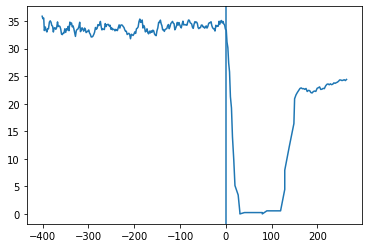

In [71]:
TFent_08_04_P2 = 631.751
TNalo_08_04_P2 = 763.197

plotty = 0

#IMU RR 
Atime, ECG, RRled, IRled, Ximu, Yimu, Zimu = ReadData("08_04_Pig2_AI.txt", format = "08_04")
sampling_time, AC, filtered, peaks = PPG_Filter(Atime, Yimu, "RR", N = 50, RR_prom = (0.02, None))
rawX, rawY, filX, filY, pksX, pksY = PPG_Plot_Signal(AC, Atime, filtered, peaks, TFent_08_04_P2, TNalo_08_04_P2, 
                                                     plot = plotty, yL = -0.1, yH = 0.1)
x, y = PPG_Plot_Values(Atime, peaks, "RR", zeros = True, timestep = 10, TFent = TFent_08_04_P2,
                       RR_window = 5, plot = not plotty)

print(list(x))
print(list(y))

### Pig 1 (ECG - HW, Terminal)

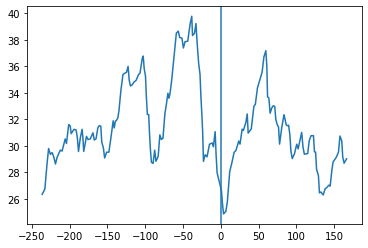

In [72]:
"""
Data record started at 13:32:00
Data begins at 0.0
Fentanyl at 13:35:57 
Naloxone at 13:38:33
"""

a = dt.datetime(1999,9,1,13,32,0)
b = dt.datetime(1999,9,1,13,35,57)
c = dt.datetime(1999,9,1,13,38,33)

FENT = (b-a).total_seconds()
NALO = (c-b).total_seconds()

#HR 
plotty = 0

Atime, out1, out2, out3, out4 = ReadData("08_04_Pig1_HW_SQ_Abdomen.csv", format = "08_04_HW")
sampling_time, AC, filtered, peaks = PPG_Filter(Atime, out1, "RR", N = 50, HR_freq = 12.0, HR_prom = (120, 500))
rawX, rawY, filX, filY, pksX, pksY = PPG_Plot_Signal(AC, Atime, filtered, peaks, FENT, NALO, 
                                                     plot = plotty, yL = -300, yH = 400)
x, y = PPG_Plot_Values(Atime, peaks, "RR", TFent = FENT, HR_window = 10, plot = not plotty)

#xx, yy = outliers(x, y)
#plt.plot(xx[205:], yy[205:])

#print(list(xx[205:]))
#print(list(yy[205:]))




### Pig 2 (ECG- HW, Terminal)

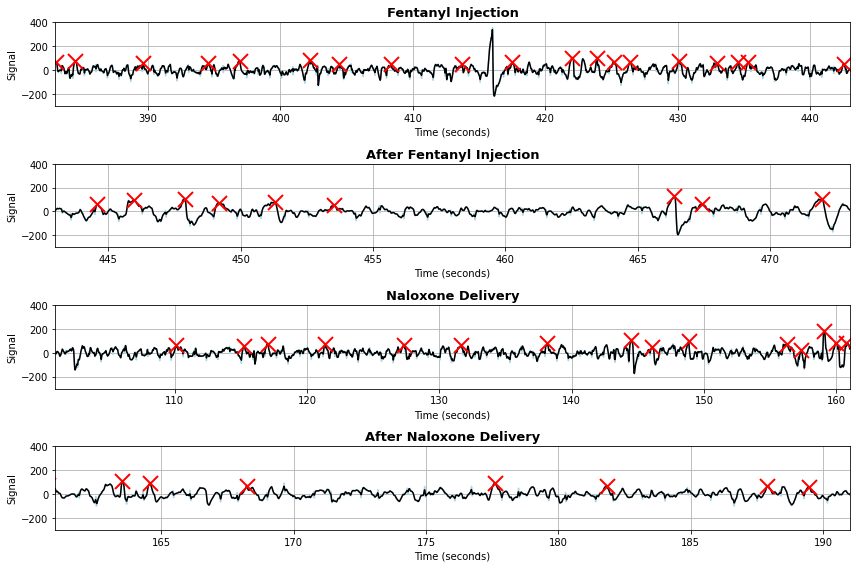

In [73]:
"""
Data record started at 14:09:31
Data begins at 0.0
Fentanyl at 14:16:24 
Naloxone at 14:18:35
"""

a = dt.datetime(1999,9,1,14,9,31)
b = dt.datetime(1999,9,1,14,16,24)
c = dt.datetime(1999,9,1,14,18,35)

FENT = (b-a).total_seconds()
NALO = (c-b).total_seconds()

#HR 
plotty = 1

Atime, out1, out2, out3, out4 = ReadData("08_04_Pig2_HW_SQ_Abdomen.csv", format = "08_04_HW")
sampling_time, AC, filtered, peaks = PPG_Filter(Atime, out1, "HR", N = 50, HR_freq = 12.0, HR_prom = (120, 500))
rawX, rawY, filX, filY, pksX, pksY = PPG_Plot_Signal(AC, Atime, filtered, peaks, FENT, NALO, 
                                                     plot = plotty, yL = -300, yH = 400)
x, y = PPG_Plot_Values(Atime, peaks, "HR", TFent = FENT, HR_window = 10, plot = not plotty)

#xx, yy = outliers(x, y)
#plt.plot(xx[205:], yy[205:])

#print(list(xx[205:]))
#print(list(yy[205:]))




# August 25, 2022 Terminal

### Pig 1 (Implant - Ali, Terminal)

[19.7015900938995, 19.86765673824018, 19.882176868208433, 19.730336307056728, 19.400603243635818, 18.885192042646523, 18.180057273013407, 17.284096741292615, 16.19809455709359, 14.924625253018474, 13.46898720297643, 11.840350079448143, 10.052368748905943, 8.122726981555353, 6.072046209174705, 3.9233049141226597, 1.7020510859397033, -0.5636603702174752, -2.8449681221357763, -5.11497032183145, -7.350306877449956, -9.530941302606957, -11.639352154660765, -13.660093526213469, -15.58002185392279, -17.38889019466469, -19.0797320863615, -20.64874933681651, -22.094629569917615, -23.417568483835506, -24.618614068717164, -25.699478450680424, -26.6625125650265, -27.510697204759467, -28.247626041048036, -28.87738269862831, -29.404163872496127, -29.83175635811051, -30.163169680078095, -30.400391881752935, -30.544131119214637, -30.593673502407082, -30.546824177610475, -30.399634662232838, -30.145951307987655, -29.777162531113568, -29.282247492325872, -28.64794562792415, -27.859057421318795, -26.8995

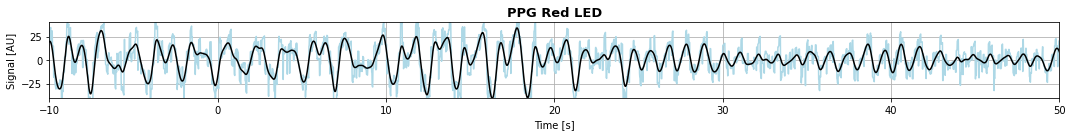

In [74]:
TFent_08_25_P1 = 504.350
TNalo_08_25_P1 = 609.000

plotty = 0

#PPG HR RED
Atime, ECG, RRled, IRled, Ximu, Yimu, Zimu = ReadData("08_25_Pig1_AI.txt", format = "08_04")
sampling_time, AC, filtered, peaks = PPG_Filter(Atime, RRled, "HR", N = 50, HR_freq = 1.4, HR_prom = (20, None))
rawX, rawY, filX, filY, pksX, pksY = PPG_Plot_Signal(AC, Atime, filtered, peaks, TFent_08_25_P1, TNalo_08_25_P1, 
                                                     plot = plotty, yL = -150, yH = 150)
#x, y = PPG_Plot_Values(Atime, peaks, "HR", TFent = TFent_08_25_P1, HR_window = 50, RR_window = 20, plot = not plotty)

#print(list(x))
#print(list(y))


xxx, yyy = PPG_Plot_Custom_Signal(AC, Atime, filtered, peaks, yL = -40, yH = 40, peaksss = False,
                           LEFT = -10, RIGHT = 50, x_offset = TFent_08_25_P1, title = "PPG Red LED", dims = (15, 2))

print(yyy)

[25.85935569707581, 26.259862195287024, 26.4283884726106, 26.336617341174065, 25.96391731108282, 25.298284005304602, 24.336382403429422, 23.082531567697824, 21.546930470808885, 19.744492608081746, 17.69457342704426, 15.420994147909163, 12.951885798819402, 10.318542550330235, 7.553480252334119, 4.689286645444436, 1.7587215958166256, -1.205215764612434, -4.170646860594392, -7.1092141573076795, -9.997586001726852, -12.817370529462995, -15.554412541131656, -18.19810161533576, -20.740455936313534, -23.174978642454267, -25.495834935547386, -27.69754884787042, -29.774988401685146, -31.72345594923149, -33.53874507224522, -35.21711505605487, -36.75522707261136, -38.15006722349714, -39.39887275270821, -40.49892398556261, -41.446895470243085, -42.23791559618465, -42.865033515909715, -43.31942552883358, -43.590964970819996, -43.66867186372007, -43.541002484986514, -43.19623123643163, -42.62294789017909, -41.81048134054376, -40.74921562264372, -39.430904856950534, -37.84923632035695, -36.0009466532

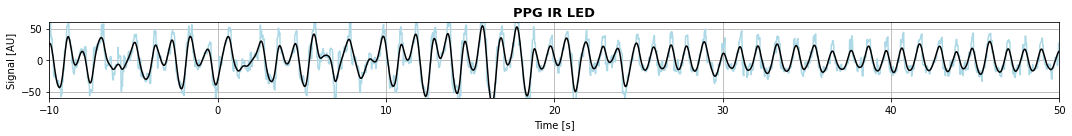

In [75]:
plotty = 0

#PPG HR IR
Atime, ECG, RRled, IRled, Ximu, Yimu, Zimu = ReadData("08_25_Pig1_AI.txt", format = "08_04")
sampling_time, AC, filtered, peaks = PPG_Filter(Atime, IRled, "HR", N = 50, HR_freq = 1.4, HR_prom = (20, 1000))
rawX, rawY, filX, filY, pksX, pksY = PPG_Plot_Signal(AC, Atime, filtered, peaks, TFent_08_25_P1, TNalo_08_25_P1, 
                                                     plot = plotty, yL = -300, yH = 300)
#x, y = PPG_Plot_Values(Atime, peaks, "HR", TFent = TFent_08_25_P1, HR_window = 50, RR_window = 20, plot = not plotty)

#print(list(x))
#print(list(y))

xxx, yyy = PPG_Plot_Custom_Signal(AC, Atime, filtered, peaks, yL = -60, yH = 60, peaksss = False,
                           LEFT = -10, RIGHT = 50, x_offset = TFent_08_25_P1, title = "PPG IR LED", dims = (15, 2))

print(yyy)

[5.572160773038077, 5.224594815271998, 4.849023733516238, 4.445608976125469, 4.014762628570363, 3.5571652943232444, 3.0737668033162997, 2.5657588809908596, 2.03453756129034, 1.4816963237033804, 0.909052240076919, 0.3186777652602755, -0.2870868976968184, -0.9056588101741273, -1.534259967552978, -2.1699490160588746, -2.809627366777787, -3.4500553890594134, -4.087924242346814, -4.7199638954516185, -5.3430115742390685, -5.954019709252056, -6.550043829327921, -7.128242460396507, -7.685898873842885, -8.22045453065461, -8.729534718732525, -9.210956719509046, -9.662717969303802, -10.082973431097177, -10.470022908150785, -10.822313207631062, -11.138444942925316, -11.417179086678093, -11.657442490109199, -11.858329119689683, -12.019092083540082, -12.139130115381857, -12.21797869172398, -12.25530473240278, -12.250900303014461, -12.204679720583007, -12.11667896194898, -11.987047394731313, -11.816032979956507, -11.603973588347463, -11.351297817523042, -11.058529161199646, -10.726293772652365, -10.3

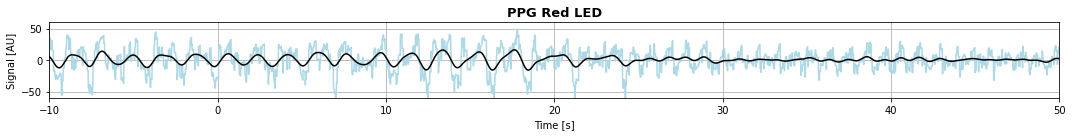

In [76]:
plotty = 0

#PPG RR Red
Atime, ECG, RRled, IRled, Ximu, Yimu, Zimu = ReadData("08_25_Pig1_AI.txt", format = "08_04")
sampling_time, AC, filtered, peaks = PPG_Filter(Atime, RRled, "RR", N = 50)
rawX, rawY, filX, filY, pksX, pksY = PPG_Plot_Signal(AC, Atime, filtered, peaks, TFent_08_25_P1, TNalo_08_25_P1, 
                                                     plot = plotty, yL = -300, yH = 300)
#x, y = PPG_Plot_Values(Atime, peaks, "RR", TFent = TFent_08_25_P1, RR_window = 10, plot = not plotty)

#print(list(x))
#print(list(y))

xxx, yyy = PPG_Plot_Custom_Signal(AC, Atime, filtered, peaks, yL = -60, yH = 60, peaksss = False,
                           LEFT = -10, RIGHT = 50, x_offset = TFent_08_25_P1, title = "PPG Red LED", dims = (15, 2))

print(yyy)

([-59.99522830136465,
  -59.98055116769211,
  -59.96587403401958,
  -59.95119690034704,
  -59.93651976667451,
  -59.92184263300197,
  -59.90716549932944,
  -59.8924883656569,
  -59.87781123198437,
  -59.86313409831183,
  -59.8484569646393,
  -59.83377983096676,
  -59.81910269729423,
  -59.80442556362169,
  -59.78974842994916,
  -59.77507129627662,
  -59.760394162604086,
  -59.74571702893155,
  -59.731039895259016,
  -59.71636276158648,
  -59.701685627913946,
  -59.68700849424141,
  -59.672331360568876,
  -59.65765422689634,
  -59.642977093223806,
  -59.62829995955127,
  -59.613622825878736,
  -59.5989456922062,
  -59.584268558533665,
  -59.56959142486113,
  -59.554914291188595,
  -59.54023715751606,
  -59.525560023843525,
  -59.51088289017099,
  -59.496205756498455,
  -59.48152862282592,
  -59.466851489153385,
  -59.45217435548085,
  -59.437497221808314,
  -59.42282008813578,
  -59.408142954463244,
  -59.39346582079071,
  -59.378788687118174,
  -59.36411155344564,
  -59.349434419773104

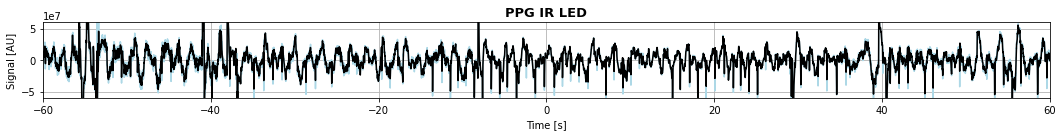

In [77]:
plotty = 0

#PPG ECG
Atime, ECG, RRled, IRled, Ximu, Yimu, Zimu = ReadData("08_25_Pig1_AI.txt", format = "08_04")
sampling_time, AC, filtered, peaks = PPG_Filter(Atime, ECG, "HR", N = 50, HR_freq = 20.0, HR_prom = (20, 1000))
rawX, rawY, filX, filY, pksX, pksY = PPG_Plot_Signal(AC, Atime, filtered, peaks, TFent_08_25_P1, TNalo_08_25_P1, 
                                                     plot = plotty, yL = -300, yH = 300)
#x, y = PPG_Plot_Values(Atime, peaks, "HR", TFent = TFent_08_25_P1, HR_window = 50, RR_window = 20, plot = not plotty)

#print(list(x))
#print(list(y))

PPG_Plot_Custom_Signal(AC, Atime, filtered, peaks, yL = -60000000, yH = 60000000, peaksss = False,
                           LEFT = -60, RIGHT = 60, x_offset = TFent_08_25_P1, title = "PPG IR LED", dims = (15, 2))

[7.883087017970286, 7.37855255203183, 6.837904129653068, 6.261122312719315, 5.648628539003833, 5.001321190322025, 4.320579200636732, 3.608227765372295, 2.8664761318430587, 2.097873417959178, 1.3052920677876305, 0.49191902859002434, -0.3387611875926851, -1.1830185983700072, -2.0369581961801093, -2.89657521477139, -3.757769560539539, -4.616362231800927, -5.468160267903182, -6.3090569904155505, -7.135102259246943, -7.942519172421158, -8.727699734442822, -9.487200452358556, -10.21772984763524, -10.916127705110595, -11.579354421644142, -12.204497099044948, -12.788784586857174, -13.329605297886872, -13.824523119258556, -14.271289754526746, -14.667854962247803, -15.012375521325913, -15.30322345838222, -15.538988909916627, -15.718467313442613, -15.840635925496697, -15.904643111480427, -15.909821523872, -15.855712486498074, -15.742085264939163, -15.568949796404763, -15.336571255333292, -15.04548712307988, -14.696520308448115, -14.290787059011494, -13.82970313883116, -13.314996542389288, -12.748

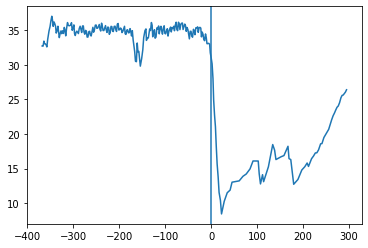

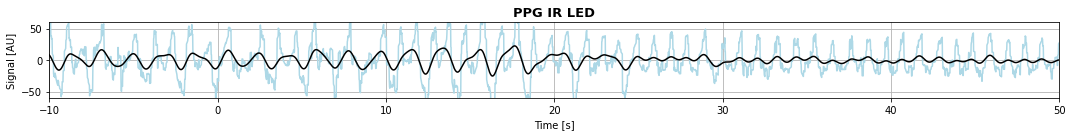

In [78]:
plotty = 0

#PPG RR IR
Atime, ECG, RRled, IRled, Ximu, Yimu, Zimu = ReadData("08_25_Pig1_AI.txt", format = "08_04")
sampling_time, AC, filtered, peaks = PPG_Filter(Atime, IRled, "RR", N = 50)
rawX, rawY, filX, filY, pksX, pksY = PPG_Plot_Signal(AC, Atime, filtered, peaks, TFent_08_25_P1, TNalo_08_25_P1, 
                                                     plot = plotty, yL = -300, yH = 300)
x, y = PPG_Plot_Values(Atime, peaks, "RR", TFent = TFent_08_25_P1, RR_window = 10, plot = not plotty)

#print(list(x))
#print(list(y))

xxx, yyy = PPG_Plot_Custom_Signal(AC, Atime, filtered, peaks, yL = -60, yH = 60, peaksss = False,
                           LEFT = -10, RIGHT = 50, x_offset = TFent_08_25_P1, title = "PPG IR LED", dims = (15, 2))

print(yyy)

([-59.99522830136465,
  -59.98055116769211,
  -59.96587403401958,
  -59.95119690034704,
  -59.93651976667451,
  -59.92184263300197,
  -59.90716549932944,
  -59.8924883656569,
  -59.87781123198437,
  -59.86313409831183,
  -59.8484569646393,
  -59.83377983096676,
  -59.81910269729423,
  -59.80442556362169,
  -59.78974842994916,
  -59.77507129627662,
  -59.760394162604086,
  -59.74571702893155,
  -59.731039895259016,
  -59.71636276158648,
  -59.701685627913946,
  -59.68700849424141,
  -59.672331360568876,
  -59.65765422689634,
  -59.642977093223806,
  -59.62829995955127,
  -59.613622825878736,
  -59.5989456922062,
  -59.584268558533665,
  -59.56959142486113,
  -59.554914291188595,
  -59.54023715751606,
  -59.525560023843525,
  -59.51088289017099,
  -59.496205756498455,
  -59.48152862282592,
  -59.466851489153385,
  -59.45217435548085,
  -59.437497221808314,
  -59.42282008813578,
  -59.408142954463244,
  -59.39346582079071,
  -59.378788687118174,
  -59.36411155344564,
  -59.349434419773104

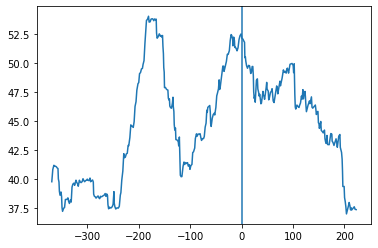

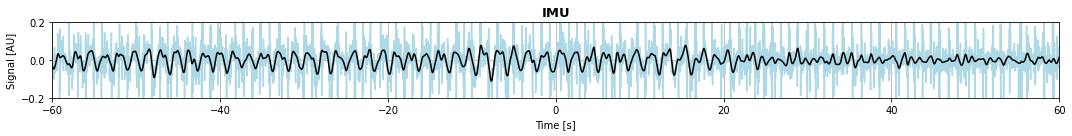

In [79]:
plotty = 0

#IMU HR 
Atime, ECG, RRled, IRled, Ximu, Yimu, Zimu = ReadData("08_25_Pig1_AI.txt", format = "08_04")
sampling_time, AC, filtered, peaks = PPG_Filter(Atime, Zimu, "HR", N = 50, HR_prom = (0.02, 100))
rawX, rawY, filX, filY, pksX, pksY = PPG_Plot_Signal(AC, Atime, filtered, peaks, TFent_08_25_P1, TNalo_08_25_P1, 
                                                     plot = plotty, yL = -0.1, yH = 0.1)
x, y = PPG_Plot_Values(Atime, peaks, "HR", zeros = True, timestep = 10, TFent = TFent_08_25_P1, 
                       RR_window = 10, plot = not plotty)

#moving_average(x, w)
#plt.plot(x[:-2], y[:-2])

#print(list(x))
#print(list(y))

PPG_Plot_Custom_Signal(AC, Atime, filtered, peaks, yL = -0.2, yH = 0.2, peaksss = False,
                           LEFT = -60, RIGHT = 60, x_offset = TFent_08_25_P1, title = "IMU", dims = (15, 2))

[-0.005058801151191677, -0.006725777398746804, -0.008390764795007515, -0.010050287790091329, -0.011701713756504566, -0.013342249656142367, -0.014968267064764494, -0.016575417451699943, -0.018159025095493917, -0.019714270589797675, -0.02123618374811373, -0.022719635016089628, -0.02415940730297371, -0.025550432725234593, -0.026888035506277434, -0.028167731173359873, -0.029384627837676452, -0.030533061651430556, -0.03160683558543854, -0.03259980249669567, -0.03350622828311794, -0.034320765352735295, -0.03503837048897854, -0.03565431189232642, -0.03616414323461616, -0.036563667523829044, -0.036849025933574225, -0.037016908821393364, -0.03706476183414882, -0.03699089400628226, -0.03679443955297829, -0.036475221226563485, -0.03603365633877563, -0.03547070850041745, -0.03478777447493871, -0.03398655610085164, -0.03306901708002061, -0.032037368905679826, -0.030894062923957657, -0.02964185829277719, -0.02828393227130019, -0.02682392280016651, -0.025265902286952524, -0.023614374279717323, -0.021

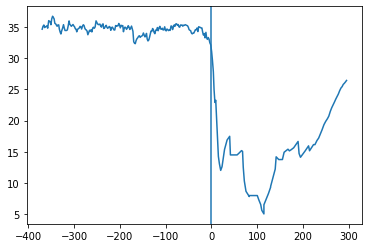

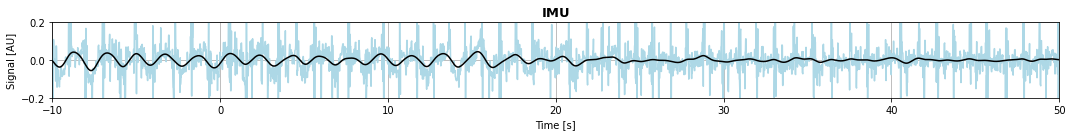

In [80]:
plotty = 0

#IMU RR 
Atime, ECG, RRled, IRled, Ximu, Yimu, Zimu = ReadData("08_25_Pig1_AI.txt", format = "08_04")
sampling_time, AC, filtered, peaks = PPG_Filter(Atime, Zimu, "RR", N = 50, RR_prom = (0.02, 100))
rawX, rawY, filX, filY, pksX, pksY = PPG_Plot_Signal(AC, Atime, filtered, peaks, TFent_08_25_P1, TNalo_08_25_P1, 
                                                     plot = plotty, yL = -0.1, yH = 0.1)
x, y = PPG_Plot_Values(Atime, peaks, "RR", zeros = True, timestep = 10, TFent = TFent_08_25_P1, 
                       RR_window = 10, plot = not plotty)

#moving_average(x, w)
#plt.plot(x[:-2], y[:-2])

#print(list(x))
#print(list(y))

xxx, yyy = PPG_Plot_Custom_Signal(AC, Atime, filtered, peaks, yL = -0.2, yH = 0.2, peaksss = False,
                           LEFT = -10, RIGHT = 50, x_offset = TFent_08_25_P1, title = "IMU", dims = (15, 2))
print(yyy)

### Pig 2 (Implant - Ali, Terminal)

[160.0104064310544, 160.04067149478558, 160.07093655851676, 160.10120162224788, 160.13146668597906, 160.16173174971024, 160.19199681344142, 160.2222618771726, 160.25252694090378, 160.28279200463496, 160.31305706836608, 160.34332213209726, 160.37358719582843, 160.4038522595596, 160.4341173232908, 160.46438238702197, 160.49464745075315, 160.52491251448427, 160.55517757821545, 160.58544264194663, 160.6157077056778, 160.64597276940898, 160.67623783314016, 160.70650289687134, 160.73676796060246, 160.76703302433364, 160.79729808806482, 160.827563151796, 160.85782821552718, 160.88809327925836, 160.91835834298954, 160.94862340672066, 160.97888847045184, 161.009153534183, 161.0394185979142, 161.06968366164537, 161.09994872537655, 161.13021378910773, 161.16047885283885, 161.19074391657003, 161.2210089803012, 161.25127404403239, 161.28153910776356, 161.31180417149474, 161.34206923522592, 161.37233429895704, 161.40259936268822, 161.4328644264194, 161.46312949015058, 161.49339455388176, 161.5236596

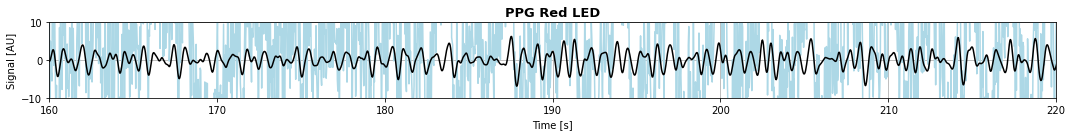

In [81]:
#OUTDATED

TFent_08_25_P2 = 154.297
TNalo_08_25_P2 = 254.780

plotty = 0

#PPG HR RED
Atime, ECG, RRled, IRled, Ximu, Yimu, Zimu = ReadData("08_25_Pig2_AI.txt", format = "08_04")
sampling_time, AC, filtered, peaks = PPG_Filter(Atime, RRled, "HR", N = 50, HR_freq = 1.47,
                                                highpass = 1.23, HR_prom = (0, None))
rawX, rawY, filX, filY, pksX, pksY = PPG_Plot_Signal(AC, Atime, filtered, peaks, TFent_08_25_P2, TNalo_08_25_P2, 
                                                     plot = plotty, yL = -40, yH = 40, offset = 10)
#x, y = PPG_Plot_Values(Atime, peaks, "HR", TFent = TFent_08_25_P2, HR_window = 20, RR_window = 20, plot = not plotty)

#print(list(x))
#print(list(y))

xxx, yyy = PPG_Plot_Custom_Signal(AC, Atime, filtered, peaks, yL = -10, yH = 10, peaksss = False,
                           LEFT = 160, RIGHT = 220, x_offset = TNalo_08_25_P2, title = "PPG Red LED", dims = (15, 2))


print(xxx)

[2.568977349279503, 2.6192548330377927, 2.7725120205607157, 3.0082266131981013, 3.269335545060246, 3.4598146825685236, 3.4476412114816304, 3.0990261289547427, 2.3288714810296822, 1.117191477292033, -0.5038317686078783, -2.4449653236045004, -4.544123158723531, -6.588286631672776, -8.361927089512715, -9.675462332942706, -10.384287091896386, -10.42295951727341, -9.82213386454253, -8.686110708214564, -7.159075053077162, -5.396487086959326, -3.545213322681588, -1.7306350863429822, -0.04549558680764321, 1.4433464029720224, 2.6735193093307736, 3.5827007770447707, 4.125675076967329, 4.290480609594477, 4.099399331130723, 3.6012664581550813, 2.872986252798663, 2.0187478661607874, 1.1410149322613956, 0.31370350427880617, -0.4101373168424006, -0.988383713823908, -1.4017520380863135, -1.6686065272758175, -1.8419925166231705, -1.9839099457633083, -2.140030497568558, -2.340260265596799, -2.605175335677082, -2.936634436835881, -3.3135147772905937, -3.695080378322725, -4.00759303566952, -4.137888501059

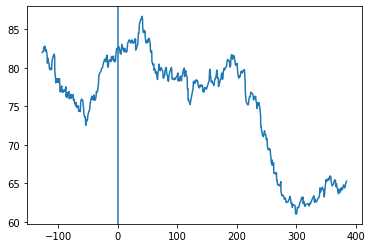

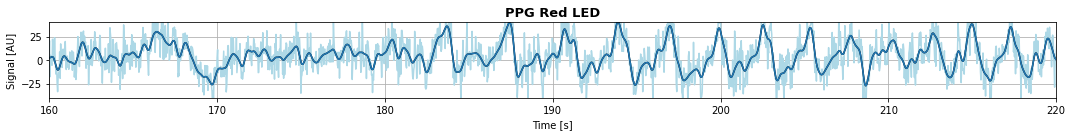

In [82]:
TFent_08_25_P2 = 154.297
TNalo_08_25_P2 = 254.780

plotty = 0

#PPG HR RED
Atime, ECG, RRled, IRled, Ximu, Yimu, Zimu = ReadData("08_25_Pig2_AI.txt", format = "08_04")
sampling_time, AC, filtered, peaks = PPG_Filter(Atime, RRled, "HR", N = 50, HR_freq = 1.5,
                                                HR_prom = (0.3, None))
rawX, rawY, filX, filY, pksX, pksY = PPG_Plot_Signal(AC, Atime, filtered, peaks, TFent_08_25_P2, TNalo_08_25_P2, 
                                                     plot = plotty, yL = -40, yH = 40, offset = 80)
x, y = PPG_Plot_Values(Atime, peaks, "HR", TFent = TFent_08_25_P2, HR_window = 100, RR_window = 20, plot = not plotty)

#print(list(x))
#print(list(y))

"""
PPG_Plot_Custom_Signal(AC, Atime, filtered, peaks, yL = -40, yH = 40, peaksss = False,
                           LEFT = -10, RIGHT = 100, x_offset = TFent_08_25_P2, title = "PPG Red LED", dims = (15, 2))
"""

xx, yy = PPG_Plot_Custom_Signal(AC, Atime, filtered, peaks, yL = -40, yH = 40, peaksss = False,
                           LEFT = 160, RIGHT = 220, x_offset = TNalo_08_25_P2, title = "PPG Red LED", dims = (15, 2))

plt.plot(xx, yy)

print(yy)

ValueError: v cannot be empty

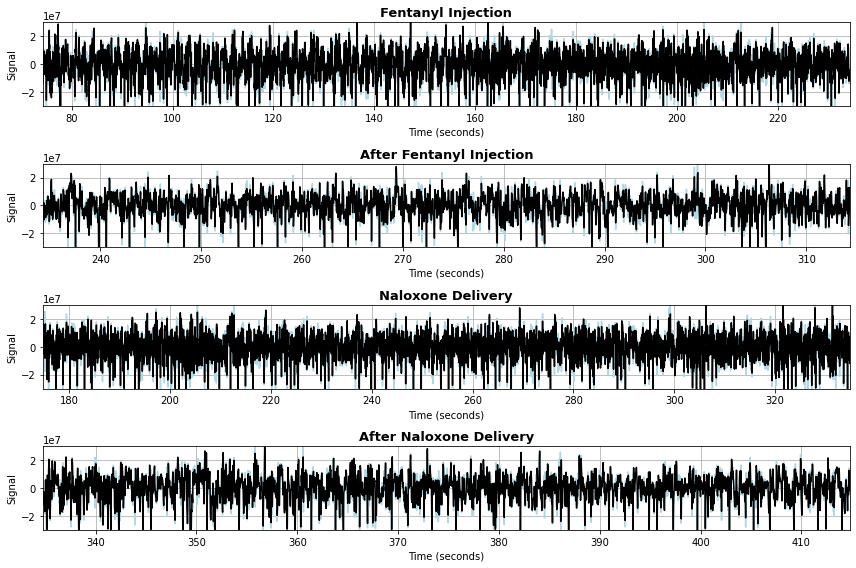

In [83]:
TFent_08_25_P2 = 154.297
TNalo_08_25_P2 = 254.780

plotty = 1

#PPG HR RED
Atime, ECG, RRled, IRled, Ximu, Yimu, Zimu = ReadData("08_25_Pig2_AI.txt", format = "08_04")
sampling_time, AC, filtered, peaks = PPG_Filter(Atime, ECG, "HR", N = 50, HR_freq = 14,
                                                HR_prom = (100, 100))
rawX, rawY, filX, filY, pksX, pksY = PPG_Plot_Signal(AC, Atime, filtered, peaks, TFent_08_25_P2, TNalo_08_25_P2, 
                                                     plot = plotty, yL = -30000000, yH = 30000000, offset = 80)
x, y = PPG_Plot_Values(Atime, peaks, "HR", TFent = TFent_08_25_P2, HR_window = 100, RR_window = 20, plot = not plotty)

#print(list(x))
#print(list(y))

"""
PPG_Plot_Custom_Signal(AC, Atime, filtered, peaks, yL = -40, yH = 40, peaksss = False,
                           LEFT = -10, RIGHT = 100, x_offset = TFent_08_25_P2, title = "PPG Red LED", dims = (15, 2))
"""

#xx, yy = PPG_Plot_Custom_Signal(AC, Atime, filtered, peaks, yL = -40, yH = 40, peaksss = False,
#                           LEFT = 160, RIGHT = 220, x_offset = TNalo_08_25_P2, title = "PPG Red LED", dims = (15, 2))

#plt.plot(xx, yy)

print(yy)

In [ ]:
plotty = 0

#PPG HR IR
Atime, ECG, RRled, IRled, Ximu, Yimu, Zimu = ReadData("08_25_Pig2_AI.txt", format = "08_04")
sampling_time, AC, filtered, peaks = PPG_Filter(Atime, IRled, "HR", N = 50, HR_freq = 1.5,
                                                HR_prom = (10, None))
rawX, rawY, filX, filY, pksX, pksY = PPG_Plot_Signal(AC, Atime, filtered, peaks, TFent_08_25_P2, TNalo_08_25_P2, 
                                                     plot = plotty, yL = -50, yH = 50, offset = 40)
x, y = PPG_Plot_Values(Atime, peaks, "HR", TFent = TFent_08_25_P2, HR_window = 50, RR_window = 20, plot = not plotty)

#print(list(x))
#print(list(y))
plt.ylim(74,90)

#PPG_Plot_Custom_Signal(AC, Atime, filtered, peaks, yL = -40, yH = 40, peaksss = False,
#                           LEFT = -10, RIGHT = 100, x_offset = TFent_08_25_P2, title = "PPG IR LED", dims = (15, 2))

xx, yy = PPG_Plot_Custom_Signal(AC, Atime, filtered, peaks, yL = -40, yH = 40, peaksss = False,
                           LEFT = 160, RIGHT = 220, x_offset = TNalo_08_25_P2, title = "PPG IR LED", dims = (15, 2))

plt.plot(xx,yy)

print(yy)

In [ ]:
#OUTDATED

plotty = 0

#PPG HR IR
Atime, ECG, RRled, IRled, Ximu, Yimu, Zimu = ReadData("08_25_Pig2_AI.txt", format = "08_04")
sampling_time, AC, filtered, peaks = PPG_Filter(Atime, IRled, "HR", N = 50, HR_freq = 1.4,
                                                highpass = 1.0, HR_prom = (20, None))
rawX, rawY, filX, filY, pksX, pksY = PPG_Plot_Signal(AC, Atime, filtered, peaks, TFent_08_25_P2, TNalo_08_25_P2, 
                                                     plot = plotty, yL = -25, yH = 25, offset = 15)
x, y = PPG_Plot_Values(Atime, peaks, "HR", TFent = TFent_08_25_P2, HR_window = 100, RR_window = 20, plot = not plotty)

#print(list(x))
#print(list(y))

In [ ]:
TFent_08_25_P2 = 154.297
TNalo_08_25_P2 = 254.780

plotty = 0

#PPG RR RED
Atime, ECG, RRled, IRled, Ximu, Yimu, Zimu = ReadData("08_25_Pig2_AI.txt", format = "08_04")
sampling_time, AC, filtered, peaks = PPG_Filter(Atime, RRled, "RR", N = 50, RR_prom = (7, 1500))
rawX, rawY, filX, filY, pksX, pksY = PPG_Plot_Signal(AC, Atime, filtered, peaks, TFent_08_25_P2, TNalo_08_25_P2, 
                                                     plot = plotty, yL = -60, yH = 60)
x, y = PPG_Plot_Values(Atime, peaks, "RR", zeros = True, timestep = 10, TFent = TFent_08_25_P2, RR_window = 10, plot = not plotty)

#xx, yy = outliers(x, y)

#print(list(x))
#print(list(y))

"""
PPG_Plot_Custom_Signal(AC, Atime, filtered, peaks, yL = -40, yH = 40, peaksss = False,
                           LEFT = -10, RIGHT = 100, x_offset = TFent_08_25_P2, title = "PPG Red LED", dims = (15, 2))
"""

xx, yy = PPG_Plot_Custom_Signal(AC, Atime, filtered, peaks, yL = -40, yH = 40, peaksss = False,
                           LEFT = 160, RIGHT = 220, x_offset = TNalo_08_25_P2, title = "PPG Red LED", dims = (15, 2))

print(xx)

In [ ]:
TFent_08_25_P2 = 154.297
TNalo_08_25_P2 = 254.780

plotty = 0

#PPG RR IR
Atime, ECG, RRled, IRled, Ximu, Yimu, Zimu = ReadData("08_25_Pig2_AI.txt", format = "08_04")
sampling_time, AC, filtered, peaks = PPG_Filter(Atime, IRled, "RR", N = 50, RR_prom = (10, 1000))
rawX, rawY, filX, filY, pksX, pksY = PPG_Plot_Signal(AC, Atime, filtered, peaks, TFent_08_25_P2, TNalo_08_25_P2, 
                                                     plot = plotty, yL = -60, yH = 60)
x, y = PPG_Plot_Values(Atime, peaks, "RR", zeros = True, timestep = 10, TFent = TFent_08_25_P2, HR_window = 20, RR_window = 10, plot = not plotty)

xx, yy = outliers(x, y)

#print(list(x))
#print(list(y))

"""
PPG_Plot_Custom_Signal(AC, Atime, filtered, peaks, yL = -40, yH = 40, peaksss = False,
                           LEFT = -10, RIGHT = 100, x_offset = TFent_08_25_P2, title = "PPG IR LED", dims = (15, 2))
"""
xx, yy = PPG_Plot_Custom_Signal(AC, Atime, filtered, peaks, yL = -40, yH = 40, peaksss = False,
                           LEFT = 160, RIGHT = 220, x_offset = TNalo_08_25_P2, title = "PPG IR LED", dims = (15, 2))

print(xx)

In [ ]:
TFent_08_25_P2 = 154.297
TNalo_08_25_P2 = 254.780

plotty = 0

#IMU RR 
Atime, ECG, RRled, IRled, Ximu, Yimu, Zimu = ReadData("08_25_Pig2_AI.txt", format = "08_04")
sampling_time, AC, filtered, peaks = PPG_Filter(Atime, Zimu, "RR", N = 50, RR_prom = (0.03, 100))
rawX, rawY, filX, filY, pksX, pksY = PPG_Plot_Signal(AC, Atime, filtered, peaks, TFent_08_25_P2, TNalo_08_25_P2, 
                                                     plot = plotty, yL = -0.1, yH = 0.1)
x, y = PPG_Plot_Values(Atime, peaks, "RR", zeros = True, timestep = 10, TFent = TFent_08_25_P2, 
                       RR_window = 2, plot = not plotty)

#moving_average(x, w)
plt.plot(x[:-2], y[:-2])

#print(list(x[:-2]))
#print(list(y[:-2]))

"""
PPG_Plot_Custom_Signal(AC, Atime, filtered, peaks, yL = -0.2, yH = 0.2, peaksss = False,
                           LEFT = -10, RIGHT = 100, x_offset = TFent_08_25_P2, title = "IMU", dims = (15, 2))
"""
xx, yy = PPG_Plot_Custom_Signal(AC, Atime, filtered, peaks, yL = -0.2, yH = 0.2, peaksss = False,
                           LEFT = -60, RIGHT = 120, x_offset = TFent_08_25_P2, title = "IMU", dims = (15, 2))

"""
with open('./Waveforms/IMUrrX.txt', 'w') as fp:
    fp.write(str(xx))
    
with open('./Waveforms/IMUrrY.txt', 'w') as fp:
    fp.write(str(yy))
"""

print(yy)

In [ ]:
TFent_08_25_P2 = 154.297
TNalo_08_25_P2 = 254.780

plotty = 0

#IMU HR 
Atime, ECG, RRled, IRled, Ximu, Yimu, Zimu = ReadData("08_25_Pig2_AI.txt", format = "08_04")
sampling_time, AC, filtered, peaks = PPG_Filter(Atime, Zimu, "HR", N = 50, HR_freq = 1.9, HR_prom = (0.01, 0.4),
                                               highpass = 1.2)
rawX, rawY, filX, filY, pksX, pksY = PPG_Plot_Signal(AC, Atime, filtered, peaks, TFent_08_25_P2, TNalo_08_25_P2, 
                                                     plot = plotty, yL = -0.1, yH = 0.1)
x, y = PPG_Plot_Values(Atime, peaks, "HR", TFent = TFent_08_25_P2, HR_window = 100, plot = not plotty)

#print(list(x))
#print(list(y))
"""
PPG_Plot_Custom_Signal(AC, Atime, filtered, peaks, yL = -0.1, yH = 0.1, peaksss = False,
                           LEFT = -60, RIGHT = 60, x_offset = TFent_08_25_P2, title = "IMU", dims = (15, 2))
"""

xx, yy = PPG_Plot_Custom_Signal(AC, Atime, filtered, peaks, yL = -0.1, yH = 0.1, peaksss = False,
                           LEFT = -20, RIGHT = 40, x_offset = TFent_08_25_P2, title = "IMU", dims = (15, 2))

with open('./Waveforms/IMUhrX.txt', 'w') as fp:
    fp.write(str(xx))
    
with open('./Waveforms/IMUhrY.txt', 'w') as fp:
    fp.write(str(yy))

### Pig 1 (ECG - DW, Terminal)

In [ ]:
#David Terminal File Name 
#2022-08-25 10-36-26 stop11-24-40 terminal pig1 chest ecg terminal testrun2

"""
Data record started at 10:36:26
Data begins at 0.0
Fentanyl at 11:05:18  
Naloxone at 11:07:03
"""

a = dt.datetime(1999,9,1,10,36,26)
b = dt.datetime(1999,9,1,11,5,18)
c = dt.datetime(1999,9,1,11,7,3)

FENT = (b-a).total_seconds()
NALO = (c-b).total_seconds()

#HR 
plotty = 1

Atime, out1, out2, out3, out4 = ReadData("08_25_ECG_DW_Pig1_Terminal_Chest.csv", format = "08_25_DW_ECG")
sampling_time, AC, filtered, peaks = PPG_Filter(Atime, out1, "HR", N = 50, HR_freq = 20.0, HR_prom = (200, 10000))
rawX, rawY, filX, filY, pksX, pksY = PPG_Plot_Signal(AC, Atime, filtered, peaks, FENT, NALO, 
                                                     plot = plotty, yL = -300, yH = 400)
x, y = PPG_Plot_Values(Atime, peaks, "HR", TFent = FENT, HR_window = 20, plot = not plotty)

xx, yy = outliers(x, y)

#plt.plot(xx, yy)
#plt.ylim(0, 80)

In [ ]:
#RR 
plotty = 1

Atime, out1, out2, out3, out4 = ReadData("08_25_ECG_DW_Pig1_Terminal_Chest.csv", format = "08_25_DW_ECG")
sampling_time, AC, filtered, peaks = PPG_Filter(Atime, out1, "RR", N = 50, RR_freq = 0.6, HR_prom = (200, 10000))
rawX, rawY, filX, filY, pksX, pksY = PPG_Plot_Signal(AC, Atime, filtered, peaks, FENT, NALO, 
                                                     plot = plotty, yL = -300, yH = 400)
x, y = PPG_Plot_Values(Atime, peaks, "RR", TFent = FENT, RR_window = 20, plot = not plotty)

xx, yy = outliers(x, y)


### Pig 2 (ECG - DW, Terminal)

In [ ]:
#David Terminal File Name
#2022-08-25 12-19-52 stop12-35-00 terminal pig2 chest ecg terminal testrun6

"""
Data record started at 12:19:52
Data begins at 0.0
Fentanyl at 12:26:51  
Naloxone at 12:28:32
"""

a = dt.datetime(1999,9,1,12,19,52)
b = dt.datetime(1999,9,1,12,26,51)
c = dt.datetime(1999,9,1,12,28,32)

FENT = (b-a).total_seconds()
NALO = (c-b).total_seconds()

#HR 
plotty = 0

Atime, out1, out2, out3, out4 = ReadData("08_25_ECG_DW_Pig2_Terminal_Chest.csv", format = "08_25_DW_ECG")
sampling_time, AC, filtered, peaks = PPG_Filter(Atime, out1, "HR", N = 50, HR_freq = 40.0, HR_prom = (160, 1500))

rawX, rawY, filX, filY, pksX, pksY = PPG_Plot_Signal(AC, Atime, filtered, peaks, FENT, NALO, 
                                                     plot = plotty, yL = -300, yH = 400)
x, y = PPG_Plot_Values(Atime, peaks, "HR", TFent = FENT, HR_window = 10, plot = False)

xx, yy = outliers(x, y)
plt.plot(xx[205:], yy[205:])

#print(list(xx))
#print(list(yy))

"""
PPG_Plot_Custom_Signal(AC, Atime, filtered, peaks, yL = -150, yH = 350, peaksss = False,
                           LEFT = -10, RIGHT = 100, x_offset = FENT, title = "ECG", dims = (15, 2))
"""

xx, yy = PPG_Plot_Custom_Signal(AC, Atime, filtered, peaks, yL = -150, yH = 350, peaksss = False,
                           LEFT = 160, RIGHT = 220, x_offset = FENT+NALO, title = "ECG", dims = (15, 2))

print(xx)


"""
with open('./Waveforms/ECGhrX.txt', 'w') as fp:
    fp.write(str(xx))
    
with open('./Waveforms/ECGhrY.txt', 'w') as fp:
    fp.write(str(yy))
"""

In [ ]:
#RR 
plotty = 0

Atime, out1, out2, out3, out4 = ReadData("08_25_ECG_DW_Pig2_Terminal_Chest.csv", format = "08_25_DW_ECG")
sampling_time, AC, filtered, peaks = PPG_Filter(Atime, out1, "RR", N = 50, RR_freq = 0.6)
rawX, rawY, filX, filY, pksX, pksY = PPG_Plot_Signal(AC, Atime, filtered, peaks, FENT, NALO, 
                                                     plot = plotty, yL = -20, yH = 20, offset = 15)
                                                     #custom = True, custX = FENT + 440, custY = FENT + 500)
#x, y = PPG_Plot_Values(Atime, peaks, "RR", TFent = FENT, RR_window = 20, plot = not plotty)
x, y = PPG_Plot_Values(Atime, peaks, "RR", zeros = True, timestep = 20, TFent = FENT, RR_window = 20, plot = not plotty)

#print(x[20]-x[0]) #36.984

#x = [i + 36.984 for i in x]

#plt.plot(x, y)

#print(list(x))
#print(list(y))
"""
PPG_Plot_Custom_Signal(AC, Atime, filtered, peaks, yL = -30, yH = 30, peaksss = False,
                           LEFT = -10, RIGHT = 100, x_offset = FENT, title = "ECG", dims = (15, 2))
"""

xx, yy = PPG_Plot_Custom_Signal(AC, Atime, filtered, peaks, yL = -30, yH = 30, peaksss = False,
                           LEFT = -20, RIGHT = 60, x_offset = FENT, title = "ECG", dims = (15, 2))

with open('./Waveforms/ECGrrX.txt', 'w') as fp:
    fp.write(str(xx))
    
with open('./Waveforms/ECGrrY.txt', 'w') as fp:
    fp.write(str(yy))

# Additional Tests

## August 04

###### Unused Files

"08-04_13-24-46-Pig1_PPG_All_LED_Chest.txt"

"08-04_13-25-18_Pig1_PPG_Abdomen_Skin.csv"

"08-04_13-25-24_Pig1_IMU_Abdomen_Skin.csv"

"08-04_13-49-44_Pig1_ECG_Chest_SQ_for_mic.csv"

### PPG Positioning

###### Pre-terminal HR: 66
###### Pre-terminal RR: 34   
    
###### Post-terminal HR: 69
###### Post-terminal HR: 24

In [ ]:
#CHEST WAS DONE POST TERMINAL 2

#CHEST HR RED

FENT = 120
NALO = 220

plotty = 1

Atime, RRled, IRled, GRled = ReadData("/08_04_Tests/08-04_14-44-18_Pig2_PPG_Chest_Skin.csv", format = "PPGx3_HW")
sampling_time, AC, filtered, peaks = PPG_Filter(Atime, RRled, "HR", N = 50, 
                                                HR_freq = 1.4, HR_prom = (5, 10000))
rawX, rawY, filX, filY, pksX, pksY = PPG_Plot_Signal(AC, Atime, filtered, peaks, FENT, NALO, 
                                                     plot = plotty, yL = -900, yH = 900)
x, y = PPG_Plot_Values(Atime, peaks, "HR", TFent = FENT, HR_window = 1, plot = not plotty)

#print(list(x[97:]))
print(list(y[97:]))

In [ ]:
#CHEST WAS DONE POST TERMINAL 2

#CHEST HR IR

FENT = 120
NALO = 220

plotty = 1

Atime, RRled, IRled, GRled = ReadData("/08_04_Tests/08-04_14-44-18_Pig2_PPG_Chest_Skin.csv", format = "PPGx3_HW")
sampling_time, AC, filtered, peaks = PPG_Filter(Atime, IRled, "HR", N = 50, 
                                                HR_freq = 1.4, HR_prom = (5, 10000))
rawX, rawY, filX, filY, pksX, pksY = PPG_Plot_Signal(AC, Atime, filtered, peaks, FENT, NALO, 
                                                     plot = plotty, yL = -900, yH = 900)
x, y = PPG_Plot_Values(Atime, peaks, "HR", TFent = FENT, HR_window = 1, plot = not plotty)

#print(list(x[99:]))
print(list(y[99:]))

In [ ]:
#CHEST WAS DONE POST TERMINAL 2

#CHEST HR GREEN

FENT = 120
NALO = 220

plotty = 1

Atime, RRled, IRled, GRled = ReadData("/08_04_Tests/08-04_14-44-18_Pig2_PPG_Chest_Skin.csv", format = "PPGx3_HW")
sampling_time, AC, filtered, peaks = PPG_Filter(Atime, GRled, "HR", N = 50, 
                                                HR_freq = 1.4, HR_prom = (5, 10000))
rawX, rawY, filX, filY, pksX, pksY = PPG_Plot_Signal(AC, Atime, filtered, peaks, FENT, NALO, 
                                                     plot = True, yL = -900, yH = 900)
x, y = PPG_Plot_Values(Atime, peaks, "HR", TFent = FENT, HR_window = 1, plot = not plotty)

#FLAG GREEN

#print(list(x[119:]))
print(list(y[119:]))

In [ ]:
#CHEST RR RED

FENT = 120
NALO = 220

plotty = 0

Atime, RRled, IRled, GRled = ReadData("/08_04_Tests/08-04_14-44-18_Pig2_PPG_Chest_Skin.csv", format = "PPGx3_HW")
sampling_time, AC, filtered, peaks = PPG_Filter(Atime, RRled, "RR", N = 50, 
                                                RR_freq = 0.6, HR_prom = (1, None))
rawX, rawY, filX, filY, pksX, pksY = PPG_Plot_Signal(AC, Atime, filtered, peaks, FENT, NALO, 
                                                     plot = plotty, yL = -100, yH = 100)
x, y = PPG_Plot_Values(Atime, peaks, "RR", TFent = FENT, RR_window = 1, plot = not plotty)

#print(list(x[57:-2]))
print(list(y[57:-2]))

In [ ]:
#CHEST RR IR

FENT = 120
NALO = 180

plotty = 0

Atime, RRled, IRled, GRled = ReadData("/08_04_Tests/08-04_14-44-18_Pig2_PPG_Chest_Skin.csv", format = "PPGx3_HW")
sampling_time, AC, filtered, peaks = PPG_Filter(Atime, IRled, "RR", N = 50, 
                                                RR_freq = 0.6, RR_prom = (20, 1000))
rawX, rawY, filX, filY, pksX, pksY = PPG_Plot_Signal(AC, Atime, filtered, peaks, FENT, NALO, 
                                                     plot = plotty, yL = -100, yH = 100)
x, y = PPG_Plot_Values(Atime, peaks, "RR", TFent = FENT, RR_window = 1, plot = not plotty)

#print(list(x[40:]))
print(list(y[40:]))

In [ ]:
#CHEST RR GREEN

FENT = 120
NALO = 220

plotty = 1

Atime, RRled, IRled, GRled = ReadData("/08_04_Tests/08-04_14-44-18_Pig2_PPG_Chest_Skin.csv", format = "PPGx3_HW")
sampling_time, AC, filtered, peaks = PPG_Filter(Atime, GRled, "RR", N = 50, 
                                                RR_freq = 0.6, RR_prom = (1, 10))
rawX, rawY, filX, filY, pksX, pksY = PPG_Plot_Signal(AC, Atime, filtered, peaks, FENT, NALO, 
                                                     plot = plotty, yL = -50, yH = 50)
x, y = PPG_Plot_Values(Atime, peaks, "RR", TFent = FENT, RR_window = 1, plot = not plotty)

#print(list(x[10:]))
print(list(y[10:]))

In [ ]:
#ABDOMEN WAS DONE PRE TERMINAL 2

#ABDOMEN HR RED

FENT = 30
NALO = 90

plotty = 0

Atime, RRled, IRled, GRled = ReadData("/08_04_Tests/08-04_14-02-13_Pig2_PPG_Abdomen_test.csv", format = "PPGx3_HW")
sampling_time, AC, filtered, peaks = PPG_Filter(Atime, RRled, "HR", N = 50, 
                                                HR_freq = 2.0, HR_prom = (5, 100))
rawX, rawY, filX, filY, pksX, pksY = PPG_Plot_Signal(AC, Atime, filtered, peaks, FENT, NALO, 
                                                     plot = plotty, yL = -100, yH = 100)
x, y = PPG_Plot_Values(Atime, peaks, "HR", TFent = FENT, HR_window = 1, plot = not plotty)

#print(list(x[27:]))
print(list(y[27:]))

In [ ]:
#ABDOMEN WAS DONE PRE TERMINAL 2

#ABDOMEN HR IR

FENT = 30
NALO = 90

plotty = 0

Atime, RRled, IRled, GRled = ReadData("/08_04_Tests/08-04_14-02-13_Pig2_PPG_Abdomen_test.csv", format = "PPGx3_HW")
sampling_time, AC, filtered, peaks = PPG_Filter(Atime, IRled, "HR", N = 50, 
                                                HR_freq = 2.0, HR_prom = (0, 1000))
rawX, rawY, filX, filY, pksX, pksY = PPG_Plot_Signal(AC, Atime, filtered, peaks, FENT, NALO, 
                                                     plot = plotty, yL = -250, yH = 250)
x, y = PPG_Plot_Values(Atime, peaks, "HR", TFent = FENT, HR_window = 1, plot = not plotty)

#print(list(x[27:]))
print(list(y))

In [ ]:
#ABDOMEN WAS DONE PRE TERMINAL 2

#ABDOMEN HR GREEN

FENT = 30
NALO = 90

plotty = 1

Atime, RRled, IRled, GRled = ReadData("/08_04_Tests/08-04_14-02-13_Pig2_PPG_Abdomen_test.csv", format = "PPGx3_HW")
sampling_time, AC, filtered, peaks = PPG_Filter(Atime, GRled, "HR", N = 50, 
                                                HR_freq = 2.0, HR_prom = (0, 500))
rawX, rawY, filX, filY, pksX, pksY = PPG_Plot_Signal(AC, Atime, filtered, peaks, FENT, NALO, 
                                                     plot = not plotty, yL = -100, yH = 100)
x, y = PPG_Plot_Values(Atime, peaks, "HR", TFent = FENT, HR_window = 1, plot = not plotty)

#print(list(x[27:]))
#print(list(y))

xx, yy = PPG_Plot_Custom_Signal(AC, Atime, filtered, peaks, yL = -30, yH = 30, peaksss = False,
                           LEFT = -30, RIGHT = 120, x_offset = FENT, dims = (15, 2))

print(yy)

In [ ]:
#ABDOMEN RR RED

FENT = 30
NALO = 90

plotty = 0

Atime, RRled, IRled, GRled = ReadData("/08_04_Tests/08-04_14-02-13_Pig2_PPG_Abdomen_test.csv", format = "PPGx3_HW")
sampling_time, AC, filtered, peaks = PPG_Filter(Atime, RRled, "RR", N = 50, 
                                                RR_freq = 0.6, RR_prom = (1, None))
rawX, rawY, filX, filY, pksX, pksY = PPG_Plot_Signal(AC, Atime, filtered, peaks, FENT, NALO, 
                                                     plot = plotty, yL = -100, yH = 100)
x, y = PPG_Plot_Values(Atime, peaks, "RR", TFent = FENT, RR_window = 1, plot = not plotty)

#print(list(x[27:]))
print(list(y[:-2]))

In [ ]:
#ABDOMEN IR RED

FENT = 30
NALO = 90

plotty = 1

Atime, RRled, IRled, GRled = ReadData("/08_04_Tests/08-04_14-02-13_Pig2_PPG_Abdomen_test.csv", format = "PPGx3_HW")
sampling_time, AC, filtered, peaks = PPG_Filter(Atime, IRled, "RR", N = 50, 
                                                RR_freq = 0.6, RR_prom = (5, 100))
rawX, rawY, filX, filY, pksX, pksY = PPG_Plot_Signal(AC, Atime, filtered, peaks, FENT, NALO, 
                                                     plot = plotty, yL = -100, yH = 100)
x, y = PPG_Plot_Values(Atime, peaks, "RR", TFent = FENT, RR_window = 1, plot = not plotty)

#print(list(x[27:]))
print(list(y))

In [ ]:
#ABDOMEN GR RED

FENT = 30
NALO = 90

plotty = 1

Atime, RRled, IRled, GRled = ReadData("/08_04_Tests/08-04_14-02-13_Pig2_PPG_Abdomen_test.csv", format = "PPGx3_HW")
sampling_time, AC, filtered, peaks = PPG_Filter(Atime, GRled, "RR", N = 50, 
                                                RR_freq = 0.6, RR_prom = (5, 100))
rawX, rawY, filX, filY, pksX, pksY = PPG_Plot_Signal(AC, Atime, filtered, peaks, FENT, NALO, 
                                                     plot = plotty, yL = -100, yH = 100)
x, y = PPG_Plot_Values(Atime, peaks, "RR", TFent = FENT, RR_window = 1, plot = not plotty)

#print(list(x[27:]))
print(list(y[27:]))

### IMU Positioning

###### Post-terminal RR: 24  
###### IMU was post-terminal

In [ ]:
#IMU Chest

FENT = 160
NALO = 220

plotty = 1

Atime, Ximu, Yimu, Zimu = ReadData("/08_04_Tests/08-04_14-44-37_Pig2_IMU_Chest_Skin.csv", format = "IMU_HW")
sampling_time, AC, filtered, peaks = PPG_Filter(Atime, Ximu, "RR", N = 50, 
                                                RR_freq = 0.6, RR_prom = (20, 1000))
rawX, rawY, filX, filY, pksX, pksY = PPG_Plot_Signal(AC, Atime, filtered, peaks, FENT, NALO, 
                                                     plot = plotty, yL = -200, yH = 200)
x, y = PPG_Plot_Values(Atime, peaks, "RR", TFent = FENT, RR_window = 1, plot = not plotty)

print(next(i[0] for i in enumerate(x) if i[1] > 0))

#print(list(x[62:]))
print(list(y[62:]))

In [ ]:
#IMU Abdomen

FENT = 30
NALO = 90

plotty = 1

Atime, Ximu, Yimu, Zimu = ReadData("/08_04_Tests/08-04_14-02-30_Pig2_IMU_Abdomen_Skin.csv", format = "IMU_HW")
sampling_time, AC, filtered, peaks = PPG_Filter(Atime, Ximu, "RR", N = 50, 
                                                RR_freq = 0.6, RR_prom = (20, 1000))
rawX, rawY, filX, filY, pksX, pksY = PPG_Plot_Signal(AC, Atime, filtered, peaks, FENT, NALO, 
                                                     plot = plotty, yL = -200, yH = 200)
x, y = PPG_Plot_Values(Atime, peaks, "RR", TFent = FENT, RR_window = 1, plot = not plotty)

#print(list(x[80:]))
print(list(y[:80]))

### ECG Positioning

###### ECG ALL POST TERMINAL
###### Post-terminal HR: 69
###### Post-terminal HR: 24

In [ ]:
#0 DEGREES HR

FENT = 30
NALO = 90

plotty = 0

Atime, ECG = ReadData("/08_04_Tests/08-04_14-29-43_Pig2_ECG_Chest_SQ_(0degrees).csv", format = "ECG_HW")
sampling_time, AC, filtered, peaks = PPG_Filter(Atime, ECG, "HR", N = 8, 
                                                HR_freq = 2.0, HR_prom = (100, None))
rawX, rawY, filX, filY, pksX, pksY = PPG_Plot_Signal(AC, Atime, filtered, peaks, FENT, NALO, 
                                                     plot = plotty, yL = -350, yH = 350)
x, y = PPG_Plot_Values(Atime, peaks, "HR", TFent = FENT, HR_window = 1, plot = not plotty)

print(list(y))

In [ ]:
#45 DEGREES HR

FENT = 30
NALO = 90

plotty = 1

Atime, ECG = ReadData("/08_04_Tests/08-04_14-38-30_Pig2_ECG_Chest_SQ_(45_degrees).csv", format = "ECG_HW")
sampling_time, AC, filtered, peaks = PPG_Filter(Atime, ECG, "HR", N = 8, 
                                                HR_freq = 2.0, HR_prom = (20, None))
rawX, rawY, filX, filY, pksX, pksY = PPG_Plot_Signal(AC, Atime, filtered, peaks, FENT, NALO, 
                                                     plot = plotty, yL = -350, yH = 350)
x, y = PPG_Plot_Values(Atime, peaks, "HR", TFent = FENT, HR_window = 1, plot = not plotty)

print(list(y))

In [ ]:
#90 DEGREES HR

FENT = 30
NALO = 90

plotty = 0

Atime, ECG = ReadData("/08_04_Tests/08-04_14-42-19_Pig2_ECG_Chest_SQ_(90_degrees).csv", format = "ECG_HW")
sampling_time, AC, filtered, peaks = PPG_Filter(Atime, ECG, "HR", N = 8, 
                                                HR_freq = 2.0, HR_prom = (50, None))
rawX, rawY, filX, filY, pksX, pksY = PPG_Plot_Signal(AC, Atime, filtered, peaks, FENT, NALO, 
                                                     plot = plotty, yL = -350, yH = 350)
x, y = PPG_Plot_Values(Atime, peaks, "HR", TFent = FENT, HR_window = 1, plot = not plotty)

print(list(y))

In [ ]:
#ABDOMEN HR

FENT = 30
NALO = 90

plotty = 1

Atime, ECG = ReadData("/08_04_Tests/08-04_13-59-08_Pig2_ECG_Abdomen_for_RR_detection.csv", format = "ECG_HW")
sampling_time, AC, filtered, peaks = PPG_Filter(Atime, ECG, "HR", N = 8, 
                                                HR_freq = 2.0, HR_prom = (50, None))
rawX, rawY, filX, filY, pksX, pksY = PPG_Plot_Signal(AC, Atime, filtered, peaks, FENT, NALO, 
                                                     plot = plotty, yL = -350, yH = 350)
x, y = PPG_Plot_Values(Atime, peaks, "HR", TFent = FENT, HR_window = 1, plot = not plotty)

print(list(y))

In [ ]:
#0 DEGREES RR

FENT = 30
NALO = 90

plotty = 0

Atime, ECG = ReadData("/08_04_Tests/08-04_14-29-43_Pig2_ECG_Chest_SQ_(0degrees).csv", format = "ECG_HW")
sampling_time, AC, filtered, peaks = PPG_Filter(Atime, ECG, "RR", N = 8, 
                                                RR_freq = 0.6, RR_prom = (45, 1000))
rawX, rawY, filX, filY, pksX, pksY = PPG_Plot_Signal(AC, Atime, filtered, peaks, FENT, NALO, 
                                                     plot = plotty, yL = -400, yH = 400)
x, y = PPG_Plot_Values(Atime, peaks, "RR", TFent = FENT, RR_window = 1, plot = not plotty)

#print(next(i[0] for i in enumerate(x) if i[1] > 0))

print(list(y))

In [ ]:
#45 DEGREES RR

FENT = 30
NALO = 90

plotty = 0

Atime, ECG = ReadData("/08_04_Tests/08-04_14-38-30_Pig2_ECG_Chest_SQ_(45_degrees).csv", format = "ECG_HW")
sampling_time, AC, filtered, peaks = PPG_Filter(Atime, ECG, "RR", N = 8, 
                                                RR_freq = 0.6, RR_prom = (0, None))
rawX, rawY, filX, filY, pksX, pksY = PPG_Plot_Signal(AC, Atime, filtered, peaks, FENT, NALO, 
                                                     plot = plotty, yL = -350, yH = 350)
x, y = PPG_Plot_Values(Atime, peaks, "RR", TFent = FENT, RR_window = 1, plot = not plotty)

print(list(y))

In [ ]:
#90 DEGREES RR

FENT = 30
NALO = 90

plotty = 0

Atime, ECG = ReadData("/08_04_Tests/08-04_14-42-19_Pig2_ECG_Chest_SQ_(90_degrees).csv", format = "ECG_HW")
sampling_time, AC, filtered, peaks = PPG_Filter(Atime, ECG, "RR", N = 8, 
                                                RR_freq = 0.6, RR_prom = (10, None))
rawX, rawY, filX, filY, pksX, pksY = PPG_Plot_Signal(AC, Atime, filtered, peaks, FENT, NALO, 
                                                     plot = plotty, yL = -350, yH = 350)
x, y = PPG_Plot_Values(Atime, peaks, "RR", TFent = FENT, RR_window = 1, plot = not plotty)

print(list(y))

In [ ]:
#ABDOMEN RR

FENT = 30
NALO = 90

plotty = 0

Atime, ECG = ReadData("/08_04_Tests/08-04_13-59-08_Pig2_ECG_Abdomen_for_RR_detection.csv", format = "ECG_HW")
sampling_time, AC, filtered, peaks = PPG_Filter(Atime, ECG, "RR", N = 8, 
                                                RR_freq = 0.6, RR_prom = (10, None))
rawX, rawY, filX, filY, pksX, pksY = PPG_Plot_Signal(AC, Atime, filtered, peaks, FENT, NALO, 
                                                     plot = plotty, yL = -350, yH = 350)
x, y = PPG_Plot_Values(Atime, peaks, "RR", TFent = FENT, RR_window = 1, plot = not plotty)

print(list(y))

## August 25

##### Unused Files

"/08_25_Tests/08-25_10-23-31_Pig1_ECG_Chest_1.csv"

"/08_25_Tests/08-25_11-29-25_Pig2_ECG_Chest_2.csv"

"/08_25_Tests/08-25_12-15-07_Pig2_ECG_Chest_3.csv"

"/08_25_Tests/08-25_11-28-45_Pig1_All_Sensors_AI.txt"

# MICROPHONE

## August 04 Mic

In [ ]:
"/08_04_Mics/Pig1_Run1_All_Sensors_Abdomen.txt"
"/08_04_Mics/Pig1_Run1_Analog_Mic_Chest.txt"
"/08_04_Mics/Pig2_Run2_All_Sensors_Abdomen.txt"
"/08_04_Mics/Pig2_Run2_SPH_Mic_Chest.txt"
"/08_04_Mics/Pig3_Run3_All_Sensors_Chest.txt"
"/08_04_Mics/Pig3_Run3_Analog_Mic_Abdomen.txt"
"/08_04_Mics/Pig4_Run4_All_Sensors_Chest.txt"
"/08_04_Mics/Pig4_Run4_SPH_Mic_Abdomen.txt"

## August 25 Mic Terminals

In [ ]:
#TERMINAL 1 MIC HR

FENT = 138.197 
NALO = 180#138.197 + 104.65 

plotty = 1

Atime, Mic = ReadData("08_25_Pig1_DW_Mic_Chest_Diaphragm.csv", format = "08_25_Mic")
sampling_time, AC, filtered, peaks = PPG_Filter(Atime, Mic, "HR", N = 8, 
                                                HR_freq = 80.0, HR_prom = (100000000, None))
rawX, rawY, filX, filY, pksX, pksY = PPG_Plot_Signal(AC, Atime, filtered, peaks, FENT, NALO, 
                                                     plot = not plotty, yL = -100000000, yH = 100000000)

x, y = PPG_Plot_Values(Atime, peaks, "HR", TFent = FENT, HR_window = 10, plot = plotty)
#plt.plot(x,y)
#plt.ylim(50, 70)

xx, yy = PPG_Plot_Custom_Signal(AC, Atime, filtered, peaks, yL = -100000000, yH = 100000000, peaksss = False,
                           LEFT = 150, RIGHT = 180, x_offset = FENT, dims = (15, 2))

print(yy)

#print(xx)
#with open('./Waveforms/MicX.txt', 'w') as fp:
#    fp.write(str(xx))
    
#with open('./Waveforms/MicY.txt', 'w') as fp:
#    fp.write(str(yy))

In [ ]:
#TERMINAL 2 MIC HR

FENT = 30
NALO = 90 #NOT ACTUALLY, JUST PLACEHOLDER

plotty = 1

Atime, Mic = ReadData("08_25_Pig2_DW_Mic_Chest_Diaphragm.csv", format = "08_25_Mic")
sampling_time, AC, filtered, peaks = PPG_Filter(Atime, Mic, "HR", N = 8, 
                                                HR_freq = 2.0, HR_prom = (0.1, None))
rawX, rawY, filX, filY, pksX, pksY = PPG_Plot_Signal(AC, Atime, filtered, peaks, FENT, NALO, 
                                                     plot = plotty, yL = -0.1, yH = 0.1)
#x, y = PPG_Plot_Values(Atime, peaks, "HR", TFent = FENT, HR_window = 10, plot = not plotty)


## August 25 Mic Tests

In [ ]:
"/08_25_Mics/Run1_08-25_Pig1_No_Diaphragm_Chest_i2s.csv"
"/08_25_Mics/Run2_08-25_Pig1_No_Diaphragm_Chest_i2s.csv"
"/08_25_Mics/Run3_08-25_Pig1_No_Diaphragm_Chest_Analog.csv"
"/08_25_Mics/Run4_08-25_Pig1_No_Diaphragm_Chest_PWM24.csv"
"/08_25_Mics/Run5_08-25_Pig1_No_Diaphragm_Chest_PWM26.csv"
"/08_25_Mics/Run6_08-25_Pig1_No_Diaphragm_Chest_PWM28.csv"
"/08_25_Mics/Run7_08-25_Pig1_Diaphragm_Chest_Analog.csv"
"/08_25_Mics/Run8_08-25_Pig1_Diaphragm_Chest_PWM24.csv"
"/08_25_Mics/Run9_08-25_Pig1_Diaphragm_Chest_PWM26.csv"
"/08_25_Mics/Run10_08-25_Pig1_Diaphragm_Chest_i2s.csv"
"/08_25_Mics/Run11_08-25_Pig1_Diaphragm_Chest_i2s_Noise.csv"
"/08_25_Mics/Run13_08-25_Pig1_Diaphragm_Chest_Analog_After_Overdose.csv"
"/08_25_Mics/Run14_08-25_Pig1_Diaphragm_Chest_Analog_After_Overdose.csv"
"/08_25_Mics/Run15_08-25_Pig1_Diaphragm_Chest_Analog_After_Overdose_32bpm.csv"